In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import chart_studio.plotly as py
import plotly.graph_objs as go 
import datetime as dt
import dataframe_image as dfi
import Levenshtein as lev

In [2]:
df1 = pd.read_csv("GCLT1.csv", low_memory = False,index_col = "DECISION_DATE")
df2 = pd.read_csv("GCLT2.csv", low_memory = False,index_col = "DECISION_DATE")

In [3]:
df = pd.concat([df1,df2],axis = 0)

In [4]:
df = df.reset_index()

In [5]:
df["MONTH"] = pd.to_datetime(df["DECISION_DATE"]).apply(lambda x:x.month)

In [6]:
df["YEAR"] = pd.to_datetime(df["DECISION_DATE"]).apply(lambda x:x.year)

In [7]:
df = df.set_index("DECISION_DATE")

In [8]:
# changing certified and certified expired to 1: 1 is good. and withdrawn and denied to 0: 0 is bad
df["CASE_STATUS"] = df["CASE_STATUS"].replace(["CERTIFIED-EXPIRED","CERTIFIED"],[1,1]).replace(["WITHDRAWN","DENIED"],[0,0])

In [9]:
# Cleaning up salary offered, and salary PW: if not number then null
df["WAGE_OFFER_FROM_9089"] = pd.to_numeric(df["WAGE_OFFER_FROM_9089"], errors='coerce')
df["WAGE_OFFER_TO_9089"] = pd.to_numeric(df["WAGE_OFFER_TO_9089"], errors='coerce')
df["PW_AMOUNT_9089"] = pd.to_numeric(df["PW_AMOUNT_9089"], errors='coerce')

In [10]:
# FIXING THE PW and SALARY UNIT OF PAY
df["PW_UNIT_OF_PAY_9089"] = df["PW_UNIT_OF_PAY_9089"].replace(["HOUR","YEAR","WEEK","MONTH","BI-WEEKLY"],["HR","YR","WK","MTH","BI"])
df["WAGE_OFFER_UNIT_OF_PAY_9089"] = df["WAGE_OFFER_UNIT_OF_PAY_9089"].replace(["HOUR","YEAR","WEEK","MONTH","BI-WEEKLY"],["HR","YR","WK","MTH","BI"])

In [11]:
# Annualized Salaries: Actual Salary
def annual(row):
    if row["WAGE_OFFER_UNIT_OF_PAY_9089"] == "YR":
        return 1
    elif row["WAGE_OFFER_UNIT_OF_PAY_9089"] == "MTH": 
        return 12
    elif row["WAGE_OFFER_UNIT_OF_PAY_9089"] == "WK": 
        return 52
    elif row["WAGE_OFFER_UNIT_OF_PAY_9089"] == "BI": 
        return 26
    elif row["WAGE_OFFER_UNIT_OF_PAY_9089"] == "HR": 
        return 2080
mult = pd.DataFrame(df.apply(lambda row:annual(row), axis = 1))

In [12]:
mult.columns=["WAGE_OFFER_FROM_9089"]
mult

,WAGE_OFFER_FROM_9089
DECISION_DATE,
9/29/08,2080.0
11/29/07,1.0
7/10/08,2080.0
10/15/07,2080.0
9/30/08,2080.0
...,...
9/30/21,1.0
9/30/21,1.0
9/30/21,1.0


In [13]:
df["WO_A"] = pd.DataFrame(df["WAGE_OFFER_FROM_9089"])*mult

In [14]:
# Annualized Salaries: PW Salary
def annuali(row):
    if row["PW_UNIT_OF_PAY_9089"] == "YR":
        return 1
    elif row["PW_UNIT_OF_PAY_9089"] == "MTH": 
        return 12
    elif row["PW_UNIT_OF_PAY_9089"] == "WK": 
        return 52
    elif row["PW_UNIT_OF_PAY_9089"] == "BI": 
        return 26
    elif row["PW_UNIT_OF_PAY_9089"] == "HR": 
        return 2080
multi = pd.DataFrame(df.apply(lambda row:annuali(row), axis = 1))

In [15]:
multi.columns=["PW_AMOUNT_9089"]
multi

,PW_AMOUNT_9089
DECISION_DATE,
9/29/08,NaN
11/29/07,NaN
7/10/08,NaN
10/15/07,NaN
9/30/08,NaN
...,...
9/30/21,1.0
9/30/21,1.0
9/30/21,1.0


In [16]:
df["PW_A"] = pd.DataFrame(df["PW_AMOUNT_9089"])*multi

In [17]:
# each year needs a cut off
m07 = df[df["YEAR"] == 2007]["WO_A"].quantile(.985)
m08 = df[df["YEAR"] == 2008]["WO_A"].quantile(.985)
m09 = df[df["YEAR"] == 2009]["WO_A"].quantile(.985)
m10 = df[df["YEAR"] == 2010]["WO_A"].quantile(.985)
m11 = df[df["YEAR"] == 2011]["WO_A"].quantile(.985)
m12 = df[df["YEAR"] == 2012]["WO_A"].quantile(.985)
m13 = df[df["YEAR"] == 2013]["WO_A"].quantile(.985)
m14 = df[df["YEAR"] == 2014]["WO_A"].quantile(.985)
m15 = df[df["YEAR"] == 2015]["WO_A"].quantile(.985)
m16 = df[df["YEAR"] == 2016]["WO_A"].quantile(.985)
m17 = df[df["YEAR"] == 2017]["WO_A"].quantile(.985)
m18 = df[df["YEAR"] == 2018]["WO_A"].quantile(.985)
m19 = df[df["YEAR"] == 2019]["WO_A"].quantile(.985)
m20 = df[df["YEAR"] == 2020]["WO_A"].quantile(.985)
m21 = df[df["YEAR"] == 2021]["WO_A"].quantile(.985)

In [18]:
m107 = df[df["YEAR"] == 2007]["PW_A"].quantile(.985)
m108 = df[df["YEAR"] == 2008]["PW_A"].quantile(.985)
m109 = df[df["YEAR"] == 2009]["PW_A"].quantile(.985)
m110 = df[df["YEAR"] == 2010]["PW_A"].quantile(.985)
m111 = df[df["YEAR"] == 2011]["PW_A"].quantile(.985)
m112 = df[df["YEAR"] == 2012]["PW_A"].quantile(.985)
m113 = df[df["YEAR"] == 2013]["PW_A"].quantile(.985)
m114 = df[df["YEAR"] == 2014]["PW_A"].quantile(.985)
m115 = df[df["YEAR"] == 2015]["PW_A"].quantile(.985)
m116 = df[df["YEAR"] == 2016]["PW_A"].quantile(.985)
m117 = df[df["YEAR"] == 2017]["PW_A"].quantile(.985)
m118 = df[df["YEAR"] == 2018]["PW_A"].quantile(.985)
m119 = df[df["YEAR"] == 2019]["PW_A"].quantile(.985)
m120 = df[df["YEAR"] == 2020]["PW_A"].quantile(.985)
m121 = df[df["YEAR"] == 2021]["PW_A"].quantile(.985)

In [19]:
df["WO_A"] = np.where((df["YEAR"] == 2007) & (df["WO_A"] > m07),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2008) & (df["WO_A"] > m08),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2009) & (df["WO_A"] > m09),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2010) & (df["WO_A"] > m10),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2011) & (df["WO_A"] > m11),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2012) & (df["WO_A"] > m12),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2013) & (df["WO_A"] > m13),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2014) & (df["WO_A"] > m14),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2015) & (df["WO_A"] > m15),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2016) & (df["WO_A"] > m16),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2017) & (df["WO_A"] > m17),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2018) & (df["WO_A"] > m18),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2019) & (df["WO_A"] > m19),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2020) & (df["WO_A"] > m20),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2021) & (df["WO_A"] > m21),96260265,df["WO_A"])
df["PW_A"] = np.where((df["YEAR"] == 2007) & (df["PW_A"] > m107),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2008) & (df["PW_A"] > m108),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2009) & (df["PW_A"] > m109),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2010) & (df["PW_A"] > m110),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2011) & (df["PW_A"] > m111),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2012) & (df["PW_A"] > m112),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2013) & (df["PW_A"] > m113),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2014) & (df["PW_A"] > m114),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2015) & (df["PW_A"] > m115),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2016) & (df["PW_A"] > m116),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2017) & (df["PW_A"] > m117),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2018) & (df["PW_A"] > m118),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2019) & (df["PW_A"] > m119),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2020) & (df["PW_A"] > m120),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2021) & (df["PW_A"] > m121),96260265,df["PW_A"])

In [20]:
df = df[df["PW_A"]!= 96260265]
df = df[df["WO_A"]!= 96260265]

In [21]:
# CUTOFF FOR BOTTOM 1%
m07 = df[df["YEAR"] == 2007]["WO_A"].quantile(.01)
m08 = df[df["YEAR"] == 2008]["WO_A"].quantile(.01)
m09 = df[df["YEAR"] == 2009]["WO_A"].quantile(.01)
m10 = df[df["YEAR"] == 2010]["WO_A"].quantile(.01)
m11 = df[df["YEAR"] == 2011]["WO_A"].quantile(.01)
m12 = df[df["YEAR"] == 2012]["WO_A"].quantile(.01)
m13 = df[df["YEAR"] == 2013]["WO_A"].quantile(.01)
m14 = df[df["YEAR"] == 2014]["WO_A"].quantile(.01)
m15 = df[df["YEAR"] == 2015]["WO_A"].quantile(.01)
m16 = df[df["YEAR"] == 2016]["WO_A"].quantile(.01)
m17 = df[df["YEAR"] == 2017]["WO_A"].quantile(.01)
m18 = df[df["YEAR"] == 2018]["WO_A"].quantile(.01)
m19 = df[df["YEAR"] == 2019]["WO_A"].quantile(.01)
m20 = df[df["YEAR"] == 2020]["WO_A"].quantile(.01)
m21 = df[df["YEAR"] == 2021]["WO_A"].quantile(.01)
m107 = df[df["YEAR"] == 2007]["PW_A"].quantile(.01)
m108 = df[df["YEAR"] == 2008]["PW_A"].quantile(.01)
m109 = df[df["YEAR"] == 2009]["PW_A"].quantile(.01)
m110 = df[df["YEAR"] == 2010]["PW_A"].quantile(.01)
m111 = df[df["YEAR"] == 2011]["PW_A"].quantile(.01)
m112 = df[df["YEAR"] == 2012]["PW_A"].quantile(.01)
m113 = df[df["YEAR"] == 2013]["PW_A"].quantile(.01)
m114 = df[df["YEAR"] == 2014]["PW_A"].quantile(.01)
m115 = df[df["YEAR"] == 2015]["PW_A"].quantile(.01)
m116 = df[df["YEAR"] == 2016]["PW_A"].quantile(.01)
m117 = df[df["YEAR"] == 2017]["PW_A"].quantile(.01)
m118 = df[df["YEAR"] == 2018]["PW_A"].quantile(.01)
m119 = df[df["YEAR"] == 2019]["PW_A"].quantile(.01)
m120 = df[df["YEAR"] == 2020]["PW_A"].quantile(.01)
m121 = df[df["YEAR"] == 2021]["PW_A"].quantile(.01)

In [22]:
df["WO_A"] = np.where((df["YEAR"] == 2007) & (df["WO_A"] < m07),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2008) & (df["WO_A"] < m08),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2009) & (df["WO_A"] < m09),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2010) & (df["WO_A"] < m10),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2011) & (df["WO_A"] < m11),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2012) & (df["WO_A"] < m12),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2013) & (df["WO_A"] < m13),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2014) & (df["WO_A"] < m14),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2015) & (df["WO_A"] < m15),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2016) & (df["WO_A"] < m16),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2017) & (df["WO_A"] < m17),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2018) & (df["WO_A"] < m18),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2019) & (df["WO_A"] < m19),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2020) & (df["WO_A"] < m20),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2021) & (df["WO_A"] < m21),96260265,df["WO_A"])
df["PW_A"] = np.where((df["YEAR"] == 2007) & (df["PW_A"] < m107),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2008) & (df["PW_A"] < m108),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2009) & (df["PW_A"] < m109),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2010) & (df["PW_A"] < m110),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2011) & (df["PW_A"] < m111),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2012) & (df["PW_A"] < m112),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2013) & (df["PW_A"] < m113),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2014) & (df["PW_A"] < m114),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2015) & (df["PW_A"] < m115),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2016) & (df["PW_A"] < m116),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2017) & (df["PW_A"] < m117),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2018) & (df["PW_A"] < m118),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2019) & (df["PW_A"] < m119),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2020) & (df["PW_A"] < m120),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2021) & (df["PW_A"] < m121),96260265,df["PW_A"])

In [23]:
df = df[df["PW_A"]!= 96260265]
df = df[df["WO_A"]!= 96260265]

In [24]:
# WAGE OFFER - PW
df["OW-PW"] = df["WO_A"] - df["PW_A"]

In [25]:
#### STANDARDIZING STATES ####

In [26]:
df.loc[df["EMPLOYER_STATE"].str.contains("alabama", case=False, na = False), "EMPLOYER_STATE"] = "AL"
df.loc[df["EMPLOYER_STATE"].str.contains("alaska", case=False, na = False), "EMPLOYER_STATE"] = "AK"
df.loc[df["EMPLOYER_STATE"].str.contains("arizona", case=False, na = False), "EMPLOYER_STATE"] = "AZ"
df.loc[df["EMPLOYER_STATE"].str.contains("arkansas", case=False, na = False), "EMPLOYER_STATE"] = "AR"
df.loc[df["EMPLOYER_STATE"].str.contains("california", case=False, na = False), "EMPLOYER_STATE"] = "CA"
df.loc[df["EMPLOYER_STATE"].str.contains("colorado", case=False, na = False), "EMPLOYER_STATE"] = "CO"
df.loc[df["EMPLOYER_STATE"].str.contains("connecticut", case=False, na = False), "EMPLOYER_STATE"] = "CT"
df.loc[df["EMPLOYER_STATE"].str.contains("delaware", case=False, na = False), "EMPLOYER_STATE"] = "DE"
df.loc[df["EMPLOYER_STATE"].str.contains("Florida", case=False, na = False), "EMPLOYER_STATE"] = "FL"
df.loc[df["EMPLOYER_STATE"].str.contains("georgia", case=False, na = False), "EMPLOYER_STATE"] = "GA"
df.loc[df["EMPLOYER_STATE"].str.contains("hawaii", case=False, na = False), "EMPLOYER_STATE"] = "HI"
df.loc[df["EMPLOYER_STATE"].str.contains("idaho", case=False, na = False), "EMPLOYER_STATE"] = "ID"
df.loc[df["EMPLOYER_STATE"].str.contains("illinois", case=False, na = False), "EMPLOYER_STATE"] = "IL"
df.loc[df["EMPLOYER_STATE"].str.contains("indiana", case=False, na = False), "EMPLOYER_STATE"] = "IN"
df.loc[df["EMPLOYER_STATE"].str.contains("iowa", case=False, na = False), "EMPLOYER_STATE"] = "IA"
df.loc[df["EMPLOYER_STATE"].str.contains("kansas", case=False, na = False), "EMPLOYER_STATE"] = "KS"
df.loc[df["EMPLOYER_STATE"].str.contains("kentucky", case=False, na = False), "EMPLOYER_STATE"] = "KY"
df.loc[df["EMPLOYER_STATE"].str.contains("louisiana", case=False, na = False), "EMPLOYER_STATE"] = "LA"
df.loc[df["EMPLOYER_STATE"].str.contains("maine", case=False, na = False), "EMPLOYER_STATE"] = "ME"
df.loc[df["EMPLOYER_STATE"].str.contains("maryland", case=False, na = False), "EMPLOYER_STATE"] = "MD"
df.loc[df["EMPLOYER_STATE"].str.contains("massachusetts", case=False, na = False), "EMPLOYER_STATE"] = "MA"
df.loc[df["EMPLOYER_STATE"].str.contains("michigan", case=False, na = False), "EMPLOYER_STATE"] = "MI"
df.loc[df["EMPLOYER_STATE"].str.contains("minnesota", case=False, na = False), "EMPLOYER_STATE"] = "MN"
df.loc[df["EMPLOYER_STATE"].str.contains("mississippi", case=False, na = False), "EMPLOYER_STATE"] = "MS"
df.loc[df["EMPLOYER_STATE"].str.contains("missouri", case=False, na = False), "EMPLOYER_STATE"] = "MO"
df.loc[df["EMPLOYER_STATE"].str.contains("montana", case=False, na = False), "EMPLOYER_STATE"] = "MT"
df.loc[df["EMPLOYER_STATE"].str.contains("nebraska", case=False, na = False), "EMPLOYER_STATE"] = "NE"
df.loc[df["EMPLOYER_STATE"].str.contains("nevada", case=False, na = False), "EMPLOYER_STATE"] = "NV"
df.loc[df["EMPLOYER_STATE"].str.contains("new hampshire", case=False, na = False), "EMPLOYER_STATE"] = "NH"
df.loc[df["EMPLOYER_STATE"].str.contains("new jersey", case=False, na = False), "EMPLOYER_STATE"] = "NJ"
df.loc[df["EMPLOYER_STATE"].str.contains("new york", case=False, na = False), "EMPLOYER_STATE"] = "NY"
df.loc[df["EMPLOYER_STATE"].str.contains("new mexico", case=False, na = False), "EMPLOYER_STATE"] = "NM"
df.loc[df["EMPLOYER_STATE"].str.contains("north carolina", case=False, na = False), "EMPLOYER_STATE"] = "NC"
df.loc[df["EMPLOYER_STATE"].str.contains("north dakota", case=False, na = False), "EMPLOYER_STATE"] = "ND"
df.loc[df["EMPLOYER_STATE"].str.contains("ohio", case=False, na = False), "EMPLOYER_STATE"] = "OH"
df.loc[df["EMPLOYER_STATE"].str.contains("oklahoma", case=False, na = False), "EMPLOYER_STATE"] = "OK"
df.loc[df["EMPLOYER_STATE"].str.contains("oregon", case=False, na = False), "EMPLOYER_STATE"] = "OR"
df.loc[df["EMPLOYER_STATE"].str.contains("pennsylvania", case=False, na = False), "EMPLOYER_STATE"] = "PA"
df.loc[df["EMPLOYER_STATE"].str.contains("rhode island", case=False, na = False), "EMPLOYER_STATE"] = "RI"
df.loc[df["EMPLOYER_STATE"].str.contains("south carolina", case=False, na = False), "EMPLOYER_STATE"] = "SC"
df.loc[df["EMPLOYER_STATE"].str.contains("south dakota", case=False, na = False), "EMPLOYER_STATE"] = "SD"
df.loc[df["EMPLOYER_STATE"].str.contains("tennessee", case=False, na = False), "EMPLOYER_STATE"] = "TN"
df.loc[df["EMPLOYER_STATE"].str.contains("texas", case=False, na = False), "EMPLOYER_STATE"] = "TX"
df.loc[df["EMPLOYER_STATE"].str.contains("utah", case=False, na = False), "EMPLOYER_STATE"] = "UT"
df.loc[df["EMPLOYER_STATE"].str.contains("vermont", case=False, na = False), "EMPLOYER_STATE"] = "VT"
df.loc[df["EMPLOYER_STATE"].str.contains("virginia", case=False, na = False), "EMPLOYER_STATE"] = "VA"
df.loc[df["EMPLOYER_STATE"].str.contains("washington", case=False, na = False), "EMPLOYER_STATE"] = "WA"
df.loc[df["EMPLOYER_STATE"].str.contains("west virginia", case=False, na = False), "EMPLOYER_STATE"] = "WV"
df.loc[df["EMPLOYER_STATE"].str.contains("wisconsin", case=False, na = False), "EMPLOYER_STATE"] = "WI"
df.loc[df["EMPLOYER_STATE"].str.contains("wyoming", case=False, na = False), "EMPLOYER_STATE"] = "WY"
df.loc[df["EMPLOYER_STATE"].str.contains("district of columbia", case=False, na = False), "EMPLOYER_STATE"] = "DC"
df.loc[df["EMPLOYER_STATE"].str.contains("puerto rico", case=False, na = False), "EMPLOYER_STATE"] = "PR"

In [27]:
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("alabama", case=False, na = False), "JOB_INFO_WORK_STATE"] = "AL"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("alaska", case=False, na = False), "JOB_INFO_WORK_STATE"] = "AK"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("arizona", case=False, na = False), "JOB_INFO_WORK_STATE"] = "AZ"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("arkansas", case=False, na = False), "JOB_INFO_WORK_STATE"] = "AR"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("california", case=False, na = False), "JOB_INFO_WORK_STATE"] = "CA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("colorado", case=False, na = False), "JOB_INFO_WORK_STATE"] = "CO"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("connecticut", case=False, na = False), "JOB_INFO_WORK_STATE"] = "CT"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("delaware", case=False, na = False), "JOB_INFO_WORK_STATE"] = "DE"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("Florida", case=False, na = False), "JOB_INFO_WORK_STATE"] = "FL"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("georgia", case=False, na = False), "JOB_INFO_WORK_STATE"] = "GA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("hawaii", case=False, na = False), "JOB_INFO_WORK_STATE"] = "HI"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("idaho", case=False, na = False), "JOB_INFO_WORK_STATE"] = "ID"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("illinois", case=False, na = False), "JOB_INFO_WORK_STATE"] = "IL"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("indiana", case=False, na = False), "JOB_INFO_WORK_STATE"] = "IN"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("iowa", case=False, na = False), "JOB_INFO_WORK_STATE"] = "IA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("kansas", case=False, na = False), "JOB_INFO_WORK_STATE"] = "KS"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("kentucky", case=False, na = False), "JOB_INFO_WORK_STATE"] = "KY"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("louisiana", case=False, na = False), "JOB_INFO_WORK_STATE"] = "LA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("maine", case=False, na = False), "JOB_INFO_WORK_STATE"] = "ME"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("maryland", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MD"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("massachusetts", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("michigan", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MI"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("minnesota", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MN"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("mississippi", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MS"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("missouri", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MO"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("montana", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MT"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("nebraska", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NE"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("nevada", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NV"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("new hampshire", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NH"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("new jersey", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NJ"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("new york", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NY"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("new mexico", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NM"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("north carolina", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NC"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("north dakota", case=False, na = False), "JOB_INFO_WORK_STATE"] = "ND"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("ohio", case=False, na = False), "JOB_INFO_WORK_STATE"] = "OH"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("oklahoma", case=False, na = False), "JOB_INFO_WORK_STATE"] = "OK"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("oregon", case=False, na = False), "JOB_INFO_WORK_STATE"] = "OR"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("pennsylvania", case=False, na = False), "JOB_INFO_WORK_STATE"] = "PA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("rhode island", case=False, na = False), "JOB_INFO_WORK_STATE"] = "RI"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("south carolina", case=False, na = False), "JOB_INFO_WORK_STATE"] = "SC"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("south dakota", case=False, na = False), "JOB_INFO_WORK_STATE"] = "SD"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("tennessee", case=False, na = False), "JOB_INFO_WORK_STATE"] = "TN"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("texas", case=False, na = False), "JOB_INFO_WORK_STATE"] = "TX"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("utah", case=False, na = False), "JOB_INFO_WORK_STATE"] = "UT"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("vermont", case=False, na = False), "JOB_INFO_WORK_STATE"] = "VT"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("virginia", case=False, na = False), "JOB_INFO_WORK_STATE"] = "VA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("washington", case=False, na = False), "JOB_INFO_WORK_STATE"] = "WA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("west virginia", case=False, na = False), "JOB_INFO_WORK_STATE"] = "WV"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("wisconsin", case=False, na = False), "JOB_INFO_WORK_STATE"] = "WI"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("wyoming", case=False, na = False), "JOB_INFO_WORK_STATE"] = "WY"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("district of columbia", case=False, na = False), "JOB_INFO_WORK_STATE"] = "DC"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("puerto rico", case=False, na = False), "JOB_INFO_WORK_STATE"] = "PR"

In [28]:
df.loc[df["EMPLOYER_STATE"].str.contains("mariana", case=False, na = False), "EMPLOYER_STATE"] = "MP"
df.loc[df["EMPLOYER_STATE"].str.contains("guam", case=False, na = False), "EMPLOYER_STATE"] = "GU"
df.loc[df["EMPLOYER_STATE"].str.contains("virgin", case=False, na = False), "EMPLOYER_STATE"] = "VI"
df.loc[df["EMPLOYER_STATE"].str.contains("marshall", case=False, na = False), "EMPLOYER_STATE"] = "MH"
df.loc[df["EMPLOYER_STATE"].str.contains("lower", case=False, na = False), "EMPLOYER_STATE"] = "GER"
df.loc[df["EMPLOYER_STATE"].str.contains("micronesia", case=False, na = False), "EMPLOYER_STATE"] = "FM"
df.loc[df["EMPLOYER_STATE"].str.contains("british", case=False, na = False), "EMPLOYER_STATE"] = "BC"
df.loc[df["EMPLOYER_STATE"].str.contains("or or", case=False, na = False), "EMPLOYER_STATE"] = "OR"
df.loc[df["EMPLOYER_STATE"].str.contains("FL", case=False, na = False), "EMPLOYER_STATE"] = "FL"
df.loc[df["EMPLOYER_STATE"].str.contains(" PR", case=False, na = False), "EMPLOYER_STATE"] = "PR"

In [29]:
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("mariana", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MP"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("guam", case=False, na = False), "JOB_INFO_WORK_STATE"] = "GU"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("virgin", case=False, na = False), "JOB_INFO_WORK_STATE"] = "VI"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("marshall", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MH"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("micronesia", case=False, na = False), "JOB_INFO_WORK_STATE"] = "FM"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains(" PR", case=False, na = False), "JOB_INFO_WORK_STATE"] = "PR"

In [30]:
# ADDING CATEGORICAL VARIABLE OF DISCREPANCY BETWEEN EMPLOYER HQ STATE AND CITY WITH JOB WORK SITE. UNIT OF WAGE AS WELL
df["DISC_ST"] = np.where(df["EMPLOYER_STATE"]==df["JOB_INFO_WORK_STATE"], 0, 1)
df["DISC_CTY"] = np.where(df["EMPLOYER_CITY"]==df["JOB_INFO_WORK_CITY"], 0, 1)
df["DISC_UNIT"] = np.where(df["WAGE_OFFER_UNIT_OF_PAY_9089"]==df["PW_UNIT_OF_PAY_9089"], 0, 1)

In [31]:
# DROPPING MAX OF WAGE OFFER. NOT MANY USE THIS
df.drop("WAGE_OFFER_TO_9089", axis =1 , inplace = True)

In [32]:
# CLEANING UP THE CLASS OF ADMISSIONS
df.loc[df["CLASS_OF_ADMISSION"].str.contains("PAROL", case=False, na = False), "CLASS_OF_ADMISSION"] = "PAROLEE"
df["CLASS_OF_ADMISSION"] = np.where((df["CLASS_OF_ADMISSION"] == "H1B1"),"H-1B1",df["CLASS_OF_ADMISSION"])
df["CLASS_OF_ADMISSION"] = np.where((df["CLASS_OF_ADMISSION"] == "H-1B/I-485 APP"),"H-1B",df["CLASS_OF_ADMISSION"])
df["CLASS_OF_ADMISSION"] = np.where((df["CLASS_OF_ADMISSION"] == "AOS/H-1B"),"H-1B",df["CLASS_OF_ADMISSION"])
df["CLASS_OF_ADMISSION"] = np.where((df["CLASS_OF_ADMISSION"] == "H1B"),"H-1B",df["CLASS_OF_ADMISSION"])

In [33]:
#manual Filter so that top 15 employers are unique + Banks
df.loc[df["EMPLOYER_NAME"].str.contains("GOOGLE", case = False, na = False),"EMPLOYER_NAME"]="GOOGLE"
df.loc[(df["EMPLOYER_NAME"].str.contains("amazon |amazon.com", case = False, na = False))&(~df["EMPLOYER_NAME"].str.contains("amazon conservation team|amazon stones", case = False, na = False)), "EMPLOYER_NAME"] = "AMAZON"
df.loc[df["EMPLOYER_NAME"].str.contains("MICROSOFT", case = False, na = False), "EMPLOYER_NAME"] = "MICROSOFT"
df.loc[df["EMPLOYER_NAME"].str.contains("Cognizant", case = False, na = False), "EMPLOYER_NAME"] = "COGNIZANT"
df.loc[df["EMPLOYER_NAME"].str.contains("intel corporation|intel mobile|intel massachusetts|intel america|intel federal", case = False, na = False), "EMPLOYER_NAME"] = "INTEL"
df.loc[df["EMPLOYER_NAME"].str.contains("apple inc.|apple computer|apple educational", case = False, na = False), "EMPLOYER_NAME"] = "APPLE"
df.loc[df["EMPLOYER_NAME"].str.contains("infosys ltd.|infosys technologies|infosys public|infosys solutions|infosys consulting|infosys international|infosys BPO", case = False, na = False), "EMPLOYER_NAME"] = "INFOSYS"
df.loc[df["EMPLOYER_NAME"].str.contains("facebook", case = False, na = False), "EMPLOYER_NAME"] = "FACEBOOK"
df.loc[df["EMPLOYER_NAME"].str.contains("tata consultancy|tata technologies|tata communications|tata industries|tata consltancy|tata enterprises|tata america international|tata autocomp|tata international metals|tata chemicals|tata elxsi", case = False, na = False), "EMPLOYER_NAME"] = "TATA"
df.loc[df["EMPLOYER_NAME"].str.contains("oracle america|oracle usa|oracle financial", case = False, na = False), "EMPLOYER_NAME"] = "FACEBOOK"
df.loc[df["EMPLOYER_NAME"].str.contains("hcl america", case = False, na = False), "EMPLOYER_NAME"] = "HCL AMERICA"
df.loc[df["EMPLOYER_NAME"].str.contains("deloitte", case = False, na = False), "EMPLOYER_NAME"] = "DELOITTE"
df.loc[df["EMPLOYER_NAME"].str.contains("qualcomm", case = False, na = False), "EMPLOYER_NAME"] = "QUALCOMM"
df.loc[df["EMPLOYER_NAME"].str.contains("IBM ", case = False, na = False), "EMPLOYER_NAME"] = "IBM"
df.loc[df["EMPLOYER_NAME"].str.contains("Cisco systems|cisco consumer", case = False, na = False), "EMPLOYER_NAME"] = "CISCO"
df.loc[df["EMPLOYER_NAME"].str.contains("salesforce", case = False, na = False), "EMPLOYER_NAME"] = "SALESFORCE"
df.loc[df["EMPLOYER_NAME"].str.contains("morgan stanley", case = False, na = False), "EMPLOYER_NAME"] = "MORGAN STANLEY"
df.loc[df["EMPLOYER_NAME"].str.contains("JP Morgan", case = False, na = False), "EMPLOYER_NAME"] = "JP MORGAN"
df.loc[df["EMPLOYER_NAME"].str.contains("goldman sachs|goldman, sachs|goldman,sachs", case = False, na = False), "EMPLOYER_NAME"] = "GOLDMAN SACHS"
df.loc[df["EMPLOYER_NAME"].str.contains("MERRILL LYNCH", case = False, na = False), "EMPLOYER_NAME"] = "MERRILL LYNCH"
df.loc[df["EMPLOYER_NAME"].str.contains("Citibank|citigroup", case = False, na = False), "EMPLOYER_NAME"] = "CITI GROUP"
df.loc[df["EMPLOYER_NAME"].str.contains("CREDIT SUISSE", case = False, na = False), "EMPLOYER_NAME"] = "CREDIT SUISSE"
df.loc[df["EMPLOYER_NAME"].str.contains("pricewater|pwc", case = False, na = False), "EMPLOYER_NAME"] = "PRICEWATERHOUSECOOPERS"
df.loc[df["EMPLOYER_NAME"].str.contains("ernst  |ernst & Young", case = False, na = False), "EMPLOYER_NAME"] = "ERNST YOUNG"
df.loc[df["EMPLOYER_NAME"].str.contains("capgemini", case = False, na = False), "EMPLOYER_NAME"] = "CAPGEMINI"
df.loc[df["EMPLOYER_NAME"].str.contains("technip usa", case = False, na = False), "EMPLOYER_NAME"] = "TECHNIP USA"
df.loc[df["EMPLOYER_NAME"].str.contains("bechtel ", case = False, na = False), "EMPLOYER_NAME"] = "BECHTEL"
df.loc[(df["EMPLOYER_NAME"].str.contains("hp enterprise services|hp inc.|Hewlett-|Hewlett P|HewlettP", case = False, na = False))&(~df["EMPLOYER_NAME"].str.contains("queen nails hp inc|backer ehp inc", case = False, na = False)), "EMPLOYER_NAME"] = "AMAZON"
df.loc[df["EMPLOYER_NAME"].str.contains("CGGVERITAS", case = False, na = False), "EMPLOYER_NAME"] = "CGGVERITAS"
df.loc[df["EMPLOYER_NAME"].str.contains("national oilwell", case = False, na = False), "EMPLOYER_NAME"] = "NATIONAL OILWELL VARCO"
df.loc[df["EMPLOYER_NAME"].str.contains("IH SERVICES", case = False, na = False), "EMPLOYER_NAME"] = "IH SERVICES"
df.loc[df["EMPLOYER_NAME"].str.contains("paypal", case = False, na = False), "EMPLOYER_NAME"] = "PAYPAL"
df.loc[df["EMPLOYER_NAME"].str.contains("EBAY INC.|EBAY INC|EBAY ENTERPRISE|EBAY MOBILE LABS| EBAY PAYMENTS", case = False, na = False), "EMPLOYER_NAME"] = "EBAY"
df.loc[df["EMPLOYER_NAME"].str.contains("brocade", case = False, na = False), "EMPLOYER_NAME"] = "BROCADE"
df.loc[df["EMPLOYER_NAME"].str.contains("ADOBE INC.|ADOBE SYSTEMS", case = False, na = False), "EMPLOYER_NAME"] = "ADOBE"
df.loc[df["EMPLOYER_NAME"].str.contains("University of Chicago", case = False, na = False), "EMPLOYER_NAME"] = "THE UNIVERSITY OF CHICAGO"
df.loc[df["EMPLOYER_NAME"].str.contains("mckinsey", case = False, na = False), "EMPLOYER_NAME"] = "MCKINSEY COMPANY"
df.loc[df["EMPLOYER_NAME"].str.contains("motorola", case = False, na = False), "EMPLOYER_NAME"] = "MOTOROLA"
df.loc[df["EMPLOYER_NAME"].str.contains("citadel LLC|citadel americas|citadel Securities|citadel investment|citadel enterprise", case = False, na = False), "EMPLOYER_NAME"] = "CITADEL LLC"
df.loc[df["EMPLOYER_NAME"].str.contains("yahoo", case = False, na = False), "EMPLOYER_NAME"] = "YAHOO"
df.loc[df["EMPLOYER_NAME"].str.contains("Juniper networks", case = False, na = False), "EMPLOYER_NAME"] = "JUNIPER NETWORKS"
df.loc[df["EMPLOYER_NAME"].str.contains("a2z development", case = False, na = False), "EMPLOYER_NAME"] = "A2Z DEVELOPMENT"
df.loc[df["EMPLOYER_NAME"].str.contains("walmart|wal-mart", case = False, na = False), "EMPLOYER_NAME"] = "WALMART"
df.loc[df["EMPLOYER_NAME"].str.contains("fortinet", case = False, na = False), "EMPLOYER_NAME"] = "FORTINET"
df.loc[df["EMPLOYER_NAME"].str.contains("larsen &|larsen  ", case = False, na = False), "EMPLOYER_NAME"] = "LARSEN TOUBRO"
df.loc[df["EMPLOYER_NAME"].str.contains("mindtree", case = False, na = False), "EMPLOYER_NAME"] = "MINDTREE LIMITED"
df.loc[df["EMPLOYER_NAME"].str.contains("igate tech|igate mastech|igate global", case = False, na = False), "EMPLOYER_NAME"] = "IGATE TECHNOLOGIES"
df.loc[df["EMPLOYER_NAME"].str.contains("3i info", case = False, na = False), "EMPLOYER_NAME"] = "3I INFOTECH"
df.loc[df["EMPLOYER_NAME"].str.contains("NTT Data", case = False, na = False), "EMPLOYER_NAME"] = "NTT DATA"
df.loc[df["EMPLOYER_NAME"].str.contains("Texas instrument", case = False, na = False), "EMPLOYER_NAME"] = "TEXAS INSTRUMENTS"
df.loc[df["EMPLOYER_NAME"].str.contains("tech mahindra", case = False, na = False), "EMPLOYER_NAME"] = "TECH MAHINDRA"
df.loc[df["EMPLOYER_NAME"].str.contains("DELL USA LP|DELL PRODUCTS LP|DELL MARKETING LP|DELL SOFTWARE INC|DELL FINANCIAL", case = False, na = False), "EMPLOYER_NAME"] = "DELL"
df.loc[df["EMPLOYER_NAME"].str.contains("uber technologies", case = False, na = False), "EMPLOYER_NAME"] = "UBER TECHNOLOGIES"
df.loc[df["EMPLOYER_NAME"].str.contains("case farms", case = False, na = False), "EMPLOYER_NAME"] = "CASE FARMS"
df.loc[df["EMPLOYER_NAME"].str.contains("house of raeford", case = False, na = False), "EMPLOYER_NAME"] = "HOUSE OF RAEFORD FARMS"
df.loc[df["EMPLOYER_NAME"].str.contains("george's processing", case = False, na = False), "EMPLOYER_NAME"] = "GEORGE'S PROCESSING"
df.loc[df["EMPLOYER_NAME"].str.contains("abbyland", case = False, na = False), "EMPLOYER_NAME"] = "ABBYLAND FOODS"
df.loc[df["EMPLOYER_NAME"].str.contains("koch foods of cinc", case = False, na = False), "EMPLOYER_NAME"] = "KOCH FOODS OF CINCINNATI"
df.loc[df["EMPLOYER_NAME"].str.contains("koch foods of al", case = False, na = False), "EMPLOYER_NAME"] = "KOCH FOODS OF ALABAMA"

In [34]:
#EMPLOYER LOOK UP TOOL
#df[df["EMPLOYER_NAME"].str.contains("wayne farms", case = False, na = False)]["EMPLOYER_NAME"].value_counts()

In [35]:
############################################################

In [36]:
########## EDA ##########

In [37]:
#### EMPLOYER NAME ANALYSIS ####

In [38]:
# Top 15 Employers of all time 2007-2021
fifteenemp = df["EMPLOYER_NAME"].value_counts().nlargest(15)
fifteenemp

MICROSOFT      28841
COGNIZANT      25447
AMAZON         24784
GOOGLE         18086
INTEL          16082
FACEBOOK       13213
INFOSYS         8699
APPLE           7908
CISCO           7124
QUALCOMM        6997
DELOITTE        6816
TATA            6607
HCL AMERICA     4578
CAPGEMINI       4555
ERNST YOUNG     4117
Name: EMPLOYER_NAME, dtype: int64

In [39]:
# Grabbing the top 15 for each year employers: regardless of success
def grab (year):
    return df[df["YEAR"]==year]["EMPLOYER_NAME"].value_counts()[:15]
top15aemp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
len(top15aemp)

51

In [40]:
# Grabbing the top 15 for each year employers: success only
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]
top15semp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
len(top15semp)

50

In [41]:
# Grabbing the top 15 for each year employers: fail only
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==0)]["EMPLOYER_NAME"].value_counts()[:15]
top15femp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
len(top15femp)

110

In [42]:
# Grabbing the top 10 for each year employers: regardless of success
def grab (year):
    return df[df["YEAR"]==year]["EMPLOYER_NAME"].value_counts()[:10]
top10aemp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
len(top10aemp)

27

In [43]:
# Grabbing the top 10 for each year employers: success only
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:10]
top10semp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
len(top10semp)

26

In [44]:
# Grabbing the top 10 for each year employers: fail only
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==0)]["EMPLOYER_NAME"].value_counts()[:10]
top10femp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
len(top10femp)

75

In [45]:
# Grabbing the top 5 for each year employers: regardless of success
def grab (year):
    return df[df["YEAR"]==year]["EMPLOYER_NAME"].value_counts()[:5]
top5aemp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
len(top5aemp)

14

In [46]:
# Grabbing the top 5 for each year employers: success only
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:5]
top5semp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
len(top5semp)

12

In [47]:
# Grabbing the top 5 for each year employers: fail only
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==0)]["EMPLOYER_NAME"].value_counts()[:5]
top5femp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
len(top5femp)

38

In [48]:
# Clean Up the top 15 employer table for Applications: Only Numbers
def clen (year):
    return pd.DataFrame(top15aemp[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
top15empnum = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
top15empnum

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,156.0,859.0,451.0,1472.0,4570.0,2386.0,1453.0,2270.0,7992.0,3622.0,4072.0,4908.0,3278.0,3093.0,5122.0
1,145.0,642.0,373.0,614.0,1879.0,1185.0,874.0,1229.0,2116.0,3504.0,2195.0,2328.0,3122.0,2974.0,3710.0
2,116.0,318.0,249.0,591.0,508.0,673.0,624.0,1099.0,1702.0,2361.0,2059.0,2250.0,2512.0,2908.0,2501.0
3,100.0,305.0,190.0,573.0,485.0,667.0,376.0,1086.0,1179.0,2142.0,2025.0,2227.0,1870.0,1923.0,1495.0
4,86.0,237.0,169.0,514.0,382.0,531.0,354.0,956.0,1055.0,1778.0,1501.0,1827.0,1758.0,1881.0,1034.0
5,85.0,203.0,154.0,365.0,317.0,476.0,293.0,921.0,863.0,1536.0,1173.0,1519.0,1571.0,1622.0,1016.0
6,84.0,199.0,144.0,328.0,313.0,401.0,277.0,901.0,800.0,1498.0,856.0,1105.0,1426.0,1125.0,467.0
7,74.0,159.0,131.0,299.0,280.0,383.0,265.0,621.0,602.0,1067.0,851.0,1063.0,1300.0,874.0,453.0
8,61.0,149.0,107.0,298.0,221.0,313.0,227.0,572.0,588.0,1031.0,685.0,1029.0,1111.0,862.0,450.0
9,58.0,146.0,106.0,238.0,210.0,283.0,226.0,477.0,579.0,896.0,664.0,729.0,961.0,478.0,448.0


In [49]:
# Freq of top 15 employer table for Applications
top15empnum.transpose().iplot()

In [50]:
# Clean Up the top 15 employer table for Applications: Only Name
def clen (year):
    return pd.DataFrame(pd.DataFrame(top15aemp[year].sort_values(ascending = False).dropna()).reset_index().drop(year,axis = 1))
top15empname = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
top15empname.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15empname

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,MICROSOFT,MICROSOFT,CISCO,COGNIZANT,MICROSOFT,MICROSOFT,MICROSOFT,MICROSOFT,COGNIZANT,COGNIZANT,COGNIZANT,AMAZON,AMAZON,AMAZON,AMAZON
1,"PROTOCALL NJ, INC.",COGNIZANT,QUALCOMM,MICROSOFT,COGNIZANT,COGNIZANT,INTEL,INTEL,INTEL,MICROSOFT,AMAZON,FACEBOOK,COGNIZANT,GOOGLE,MICROSOFT
2,COGNIZANT,QUALCOMM,COGNIZANT,INTEL,AMAZON,QUALCOMM,FACEBOOK,GOOGLE,GOOGLE,INTEL,INTEL,GOOGLE,GOOGLE,MICROSOFT,GOOGLE
3,ALL-PHASE CONCRETE CONSTRUCTION,INFOSYS,PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,CISCO,CISCO,INTEL,AMAZON,INFOSYS,FACEBOOK,AMAZON,MICROSOFT,MICROSOFT,FACEBOOK,TATA,TATA
4,CISCO,DELOITTE,DELOITTE,QUALCOMM,INTEL,AMAZON,GOOGLE,AMAZON,AMAZON,GOOGLE,GOOGLE,INTEL,INTEL,FACEBOOK,INTEL
5,AMAZON,ALL-PHASE CONCRETE CONSTRUCTION,GOOGLE,GOOGLE,GOOGLE,FACEBOOK,QUALCOMM,QUALCOMM,QUALCOMM,INFOSYS,FACEBOOK,TATA,TATA,INFOSYS,APPLE
6,QUALCOMM,FACEBOOK,ERNST YOUNG,FACEBOOK,DELOITTE,GOOGLE,DELOITTE,FACEBOOK,CISCO,FACEBOOK,HCL AMERICA,DELOITTE,MICROSOFT,INTEL,ERNST YOUNG
7,NEW YORK CITY DEPARTMENT OF EDUCATION,YAHOO,MICROSOFT,IBM,QUALCOMM,CISCO,COGNIZANT,APPLE,MICROSOFT,DELOITTE,APPLE,INFOSYS,CISCO,APPLE,FACEBOOK
8,FACEBOOK,ERNST YOUNG,CSC COVANSYS CORPORATION,AMAZON,PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,YAHOO,CISCO,CISCO,HOUSE OF RAEFORD FARMS,APPLE,QUALCOMM,APPLE,DELOITTE,CAPGEMINI,SALESFORCE
9,GOOGLE,AMAZON,KPMG LLP,PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,TEXAS INSTRUMENTS,APPLE,HCL AMERICA,DELOITTE,APPLE,CISCO,INFOSYS,HCL AMERICA,APPLE,WIPRO LIMITED,INFOSYS


In [51]:
# Clean Up the top 15 employer table for Success: Only Numbers
def clen (year):
    return pd.DataFrame(top15semp[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
top15empsn = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)

top15empsn

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,151.0,783.0,435.0,1065.0,3634.0,2189.0,1329.0,2216.0,7889.0,3593.0,4038.0,4793.0,3247.0,3057.0,5086.0
1,94.0,595.0,364.0,586.0,1736.0,1039.0,632.0,1049.0,1727.0,3454.0,2125.0,2298.0,3120.0,2930.0,3568.0
2,84.0,302.0,163.0,560.0,469.0,640.0,551.0,1048.0,1661.0,2183.0,1976.0,2228.0,2483.0,2836.0,2476.0
3,84.0,269.0,150.0,490.0,432.0,632.0,327.0,912.0,1133.0,2077.0,1963.0,2189.0,1847.0,1872.0,1478.0
4,82.0,224.0,145.0,350.0,362.0,504.0,322.0,885.0,1004.0,1766.0,1473.0,1617.0,1688.0,1844.0,1003.0
5,65.0,193.0,117.0,281.0,311.0,429.0,265.0,882.0,845.0,1484.0,1130.0,1499.0,1551.0,1562.0,963.0
6,57.0,147.0,112.0,278.0,305.0,381.0,247.0,853.0,772.0,1442.0,838.0,1095.0,1385.0,1060.0,464.0
7,55.0,142.0,99.0,233.0,266.0,274.0,204.0,608.0,557.0,1056.0,834.0,1050.0,1276.0,871.0,443.0
8,53.0,128.0,91.0,227.0,198.0,270.0,200.0,541.0,522.0,1019.0,667.0,1018.0,1101.0,805.0,437.0
9,45.0,121.0,87.0,211.0,184.0,258.0,198.0,473.0,503.0,882.0,627.0,716.0,958.0,440.0,428.0


In [52]:
top15empsn.transpose().iplot()

In [53]:
# Clean Up the top 15 employer table for Success: Only Name
def clen (year):
    return pd.DataFrame(pd.DataFrame(top15semp[year].sort_values(ascending = False).dropna()).reset_index().drop(year,axis = 1))
top15emps = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
top15emps.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15emps

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,MICROSOFT,MICROSOFT,CISCO,COGNIZANT,MICROSOFT,MICROSOFT,MICROSOFT,MICROSOFT,COGNIZANT,COGNIZANT,COGNIZANT,AMAZON,AMAZON,AMAZON,AMAZON
1,COGNIZANT,COGNIZANT,QUALCOMM,INTEL,COGNIZANT,COGNIZANT,INTEL,INTEL,INTEL,MICROSOFT,AMAZON,FACEBOOK,COGNIZANT,GOOGLE,MICROSOFT
2,CISCO,QUALCOMM,DELOITTE,CISCO,AMAZON,QUALCOMM,FACEBOOK,GOOGLE,GOOGLE,INTEL,INTEL,GOOGLE,GOOGLE,MICROSOFT,GOOGLE
3,QUALCOMM,INFOSYS,GOOGLE,QUALCOMM,CISCO,INTEL,AMAZON,AMAZON,FACEBOOK,AMAZON,MICROSOFT,MICROSOFT,FACEBOOK,TATA,TATA
4,AMAZON,DELOITTE,COGNIZANT,GOOGLE,INTEL,AMAZON,GOOGLE,QUALCOMM,AMAZON,GOOGLE,GOOGLE,INTEL,INTEL,FACEBOOK,APPLE
5,NEW YORK CITY DEPARTMENT OF EDUCATION,FACEBOOK,PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,AMAZON,GOOGLE,FACEBOOK,DELOITTE,INFOSYS,QUALCOMM,INFOSYS,FACEBOOK,TATA,TATA,INFOSYS,INTEL
6,GOOGLE,YAHOO,MICROSOFT,IBM,DELOITTE,GOOGLE,QUALCOMM,FACEBOOK,CISCO,FACEBOOK,HCL AMERICA,DELOITTE,MICROSOFT,INTEL,ERNST YOUNG
7,"WILLOW BROOK FOODS, INC.",AMAZON,CSC COVANSYS CORPORATION,FACEBOOK,QUALCOMM,APPLE,CISCO,APPLE,APPLE,DELOITTE,APPLE,INFOSYS,CISCO,APPLE,WALMART
8,FACEBOOK,ERNST YOUNG,ERNST YOUNG,PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,BLOOMBERG L.P.,DELOITTE,HCL AMERICA,CISCO,MICROSOFT,APPLE,QUALCOMM,APPLE,DELOITTE,CAPGEMINI,INFOSYS
9,ERNST YOUNG,"CVS RX SERVICES, INC",IBM,BANK OF AMERICA,FACEBOOK,CISCO,APPLE,DELOITTE,DELOITTE,CISCO,DELOITTE,HCL AMERICA,APPLE,ERNST YOUNG,JP MORGAN


In [54]:
# Merging the Name with the Count: Success Top 15
def merge(year):
    return top15emps[year].str.cat(top15empsn[year].astype(str), sep = ", ")
top15smerge = pd.concat([merge(2007),merge(2008),merge(2009),merge(2010),
             merge(2011),merge(2012),merge(2013),merge(2014),merge(2015),
             merge(2016),merge(2017),merge(2018),merge(2019),merge(2020),
             merge(2021)],axis = 1)
top15smerge.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15smerge

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"MICROSOFT, 151.0","MICROSOFT, 783.0","CISCO, 435.0","COGNIZANT, 1065.0","MICROSOFT, 3634.0","MICROSOFT, 2189.0","MICROSOFT, 1329.0","MICROSOFT, 2216.0","COGNIZANT, 7889.0","COGNIZANT, 3593.0","COGNIZANT, 4038.0","AMAZON, 4793.0","AMAZON, 3247.0","AMAZON, 3057.0","AMAZON, 5086.0"
1,"COGNIZANT, 94.0","COGNIZANT, 595.0","QUALCOMM, 364.0","INTEL, 586.0","COGNIZANT, 1736.0","COGNIZANT, 1039.0","INTEL, 632.0","INTEL, 1049.0","INTEL, 1727.0","MICROSOFT, 3454.0","AMAZON, 2125.0","FACEBOOK, 2298.0","COGNIZANT, 3120.0","GOOGLE, 2930.0","MICROSOFT, 3568.0"
2,"CISCO, 84.0","QUALCOMM, 302.0","DELOITTE, 163.0","CISCO, 560.0","AMAZON, 469.0","QUALCOMM, 640.0","FACEBOOK, 551.0","GOOGLE, 1048.0","GOOGLE, 1661.0","INTEL, 2183.0","INTEL, 1976.0","GOOGLE, 2228.0","GOOGLE, 2483.0","MICROSOFT, 2836.0","GOOGLE, 2476.0"
3,"QUALCOMM, 84.0","INFOSYS, 269.0","GOOGLE, 150.0","QUALCOMM, 490.0","CISCO, 432.0","INTEL, 632.0","AMAZON, 327.0","AMAZON, 912.0","FACEBOOK, 1133.0","AMAZON, 2077.0","MICROSOFT, 1963.0","MICROSOFT, 2189.0","FACEBOOK, 1847.0","TATA, 1872.0","TATA, 1478.0"
4,"AMAZON, 82.0","DELOITTE, 224.0","COGNIZANT, 145.0","GOOGLE, 350.0","INTEL, 362.0","AMAZON, 504.0","GOOGLE, 322.0","QUALCOMM, 885.0","AMAZON, 1004.0","GOOGLE, 1766.0","GOOGLE, 1473.0","INTEL, 1617.0","INTEL, 1688.0","FACEBOOK, 1844.0","APPLE, 1003.0"
5,"NEW YORK CITY DEPARTMENT OF EDUCATION, 65.0","FACEBOOK, 193.0","PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS, 117.0","AMAZON, 281.0","GOOGLE, 311.0","FACEBOOK, 429.0","DELOITTE, 265.0","INFOSYS, 882.0","QUALCOMM, 845.0","INFOSYS, 1484.0","FACEBOOK, 1130.0","TATA, 1499.0","TATA, 1551.0","INFOSYS, 1562.0","INTEL, 963.0"
6,"GOOGLE, 57.0","YAHOO, 147.0","MICROSOFT, 112.0","IBM, 278.0","DELOITTE, 305.0","GOOGLE, 381.0","QUALCOMM, 247.0","FACEBOOK, 853.0","CISCO, 772.0","FACEBOOK, 1442.0","HCL AMERICA, 838.0","DELOITTE, 1095.0","MICROSOFT, 1385.0","INTEL, 1060.0","ERNST YOUNG, 464.0"
7,"WILLOW BROOK FOODS, INC., 55.0","AMAZON, 142.0","CSC COVANSYS CORPORATION, 99.0","FACEBOOK, 233.0","QUALCOMM, 266.0","APPLE, 274.0","CISCO, 204.0","APPLE, 608.0","APPLE, 557.0","DELOITTE, 1056.0","APPLE, 834.0","INFOSYS, 1050.0","CISCO, 1276.0","APPLE, 871.0","WALMART, 443.0"
8,"FACEBOOK, 53.0","ERNST YOUNG, 128.0","ERNST YOUNG, 91.0","PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS, 227.0","BLOOMBERG L.P., 198.0","DELOITTE, 270.0","HCL AMERICA, 200.0","CISCO, 541.0","MICROSOFT, 522.0","APPLE, 1019.0","QUALCOMM, 667.0","APPLE, 1018.0","DELOITTE, 1101.0","CAPGEMINI, 805.0","INFOSYS, 437.0"
9,"ERNST YOUNG, 45.0","CVS RX SERVICES, INC, 121.0","IBM, 87.0","BANK OF AMERICA, 211.0","FACEBOOK, 184.0","CISCO, 258.0","APPLE, 198.0","DELOITTE, 473.0","DELOITTE, 503.0","CISCO, 882.0","DELOITTE, 627.0","HCL AMERICA, 716.0","APPLE, 958.0","ERNST YOUNG, 440.0","JP MORGAN, 428.0"


In [55]:
# Merging the Name with the Count: Applications Top 15
def merge(year):
    return top15empname[year].str.cat(top15empnum[year].astype(str), sep = ", ")
top15amerge = pd.concat([merge(2007),merge(2008),merge(2009),merge(2010),
             merge(2011),merge(2012),merge(2013),merge(2014),merge(2015),
             merge(2016),merge(2017),merge(2018),merge(2019),merge(2020),
             merge(2021)],axis = 1)
top15amerge.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15amerge

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"MICROSOFT, 156.0","MICROSOFT, 859.0","CISCO, 451.0","COGNIZANT, 1472.0","MICROSOFT, 4570.0","MICROSOFT, 2386.0","MICROSOFT, 1453.0","MICROSOFT, 2270.0","COGNIZANT, 7992.0","COGNIZANT, 3622.0","COGNIZANT, 4072.0","AMAZON, 4908.0","AMAZON, 3278.0","AMAZON, 3093.0","AMAZON, 5122.0"
1,"PROTOCALL NJ, INC., 145.0","COGNIZANT, 642.0","QUALCOMM, 373.0","MICROSOFT, 614.0","COGNIZANT, 1879.0","COGNIZANT, 1185.0","INTEL, 874.0","INTEL, 1229.0","INTEL, 2116.0","MICROSOFT, 3504.0","AMAZON, 2195.0","FACEBOOK, 2328.0","COGNIZANT, 3122.0","GOOGLE, 2974.0","MICROSOFT, 3710.0"
2,"COGNIZANT, 116.0","QUALCOMM, 318.0","COGNIZANT, 249.0","INTEL, 591.0","AMAZON, 508.0","QUALCOMM, 673.0","FACEBOOK, 624.0","GOOGLE, 1099.0","GOOGLE, 1702.0","INTEL, 2361.0","INTEL, 2059.0","GOOGLE, 2250.0","GOOGLE, 2512.0","MICROSOFT, 2908.0","GOOGLE, 2501.0"
3,"ALL-PHASE CONCRETE CONSTRUCTION, 100.0","INFOSYS, 305.0","PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS, 190.0","CISCO, 573.0","CISCO, 485.0","INTEL, 667.0","AMAZON, 376.0","INFOSYS, 1086.0","FACEBOOK, 1179.0","AMAZON, 2142.0","MICROSOFT, 2025.0","MICROSOFT, 2227.0","FACEBOOK, 1870.0","TATA, 1923.0","TATA, 1495.0"
4,"CISCO, 86.0","DELOITTE, 237.0","DELOITTE, 169.0","QUALCOMM, 514.0","INTEL, 382.0","AMAZON, 531.0","GOOGLE, 354.0","AMAZON, 956.0","AMAZON, 1055.0","GOOGLE, 1778.0","GOOGLE, 1501.0","INTEL, 1827.0","INTEL, 1758.0","FACEBOOK, 1881.0","INTEL, 1034.0"
5,"AMAZON, 85.0","ALL-PHASE CONCRETE CONSTRUCTION, 203.0","GOOGLE, 154.0","GOOGLE, 365.0","GOOGLE, 317.0","FACEBOOK, 476.0","QUALCOMM, 293.0","QUALCOMM, 921.0","QUALCOMM, 863.0","INFOSYS, 1536.0","FACEBOOK, 1173.0","TATA, 1519.0","TATA, 1571.0","INFOSYS, 1622.0","APPLE, 1016.0"
6,"QUALCOMM, 84.0","FACEBOOK, 199.0","ERNST YOUNG, 144.0","FACEBOOK, 328.0","DELOITTE, 313.0","GOOGLE, 401.0","DELOITTE, 277.0","FACEBOOK, 901.0","CISCO, 800.0","FACEBOOK, 1498.0","HCL AMERICA, 856.0","DELOITTE, 1105.0","MICROSOFT, 1426.0","INTEL, 1125.0","ERNST YOUNG, 467.0"
7,"NEW YORK CITY DEPARTMENT OF EDUCATION, 74.0","YAHOO, 159.0","MICROSOFT, 131.0","IBM, 299.0","QUALCOMM, 280.0","CISCO, 383.0","COGNIZANT, 265.0","APPLE, 621.0","MICROSOFT, 602.0","DELOITTE, 1067.0","APPLE, 851.0","INFOSYS, 1063.0","CISCO, 1300.0","APPLE, 874.0","FACEBOOK, 453.0"
8,"FACEBOOK, 61.0","ERNST YOUNG, 149.0","CSC COVANSYS CORPORATION, 107.0","AMAZON, 298.0","PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS, 221.0","YAHOO, 313.0","CISCO, 227.0","CISCO, 572.0","HOUSE OF RAEFORD FARMS, 588.0","APPLE, 1031.0","QUALCOMM, 685.0","APPLE, 1029.0","DELOITTE, 1111.0","CAPGEMINI, 862.0","SALESFORCE, 450.0"
9,"GOOGLE, 58.0","AMAZON, 146.0","KPMG LLP, 106.0","PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS, 238.0","TEXAS INSTRUMENTS, 210.0","APPLE, 283.0","HCL AMERICA, 226.0","DELOITTE, 477.0","APPLE, 579.0","CISCO, 896.0","INFOSYS, 664.0","HCL AMERICA, 729.0","APPLE, 961.0","WIPRO LIMITED, 478.0","INFOSYS, 448.0"


In [56]:
# Merging the Success v Application
def mergy (year):
    return pd.concat([top15amerge[year],top15smerge[year]],axis = 1)
mergeas = pd.concat([mergy(2007),mergy(2008),mergy(2009),mergy(2010),mergy(2011),mergy(2012),
           mergy(2013),mergy(2014),mergy(2015),mergy(2016),mergy(2017),mergy(2018),
           mergy(2019),mergy(2020),mergy(2021)],axis = 1)
mergeas.columns = ["2007A","2007S","2008A","2008S","2009A","2009S","2010A","2010S",
                  "2011A","2011S","2012A","2012S","2013A","2013S","2014A","2014S",
                  "2015A","2015S","2016A","2016S","2017A","2017S","2018A","2018S",
                  "2019A","2019S","2020A","2020S","2021A","2021S"]
mergeas

,2007A,2007S,2008A,2008S,2009A,2009S,2010A,2010S,2011A,2011S,...,2017A,2017S,2018A,2018S,2019A,2019S,2020A,2020S,2021A,2021S
0,"MICROSOFT, 156.0","MICROSOFT, 151.0","MICROSOFT, 859.0","MICROSOFT, 783.0","CISCO, 451.0","CISCO, 435.0","COGNIZANT, 1472.0","COGNIZANT, 1065.0","MICROSOFT, 4570.0","MICROSOFT, 3634.0",...,"COGNIZANT, 4072.0","COGNIZANT, 4038.0","AMAZON, 4908.0","AMAZON, 4793.0","AMAZON, 3278.0","AMAZON, 3247.0","AMAZON, 3093.0","AMAZON, 3057.0","AMAZON, 5122.0","AMAZON, 5086.0"
1,"PROTOCALL NJ, INC., 145.0","COGNIZANT, 94.0","COGNIZANT, 642.0","COGNIZANT, 595.0","QUALCOMM, 373.0","QUALCOMM, 364.0","MICROSOFT, 614.0","INTEL, 586.0","COGNIZANT, 1879.0","COGNIZANT, 1736.0",...,"AMAZON, 2195.0","AMAZON, 2125.0","FACEBOOK, 2328.0","FACEBOOK, 2298.0","COGNIZANT, 3122.0","COGNIZANT, 3120.0","GOOGLE, 2974.0","GOOGLE, 2930.0","MICROSOFT, 3710.0","MICROSOFT, 3568.0"
2,"COGNIZANT, 116.0","CISCO, 84.0","QUALCOMM, 318.0","QUALCOMM, 302.0","COGNIZANT, 249.0","DELOITTE, 163.0","INTEL, 591.0","CISCO, 560.0","AMAZON, 508.0","AMAZON, 469.0",...,"INTEL, 2059.0","INTEL, 1976.0","GOOGLE, 2250.0","GOOGLE, 2228.0","GOOGLE, 2512.0","GOOGLE, 2483.0","MICROSOFT, 2908.0","MICROSOFT, 2836.0","GOOGLE, 2501.0","GOOGLE, 2476.0"
3,"ALL-PHASE CONCRETE CONSTRUCTION, 100.0","QUALCOMM, 84.0","INFOSYS, 305.0","INFOSYS, 269.0","PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS, 190.0","GOOGLE, 150.0","CISCO, 573.0","QUALCOMM, 490.0","CISCO, 485.0","CISCO, 432.0",...,"MICROSOFT, 2025.0","MICROSOFT, 1963.0","MICROSOFT, 2227.0","MICROSOFT, 2189.0","FACEBOOK, 1870.0","FACEBOOK, 1847.0","TATA, 1923.0","TATA, 1872.0","TATA, 1495.0","TATA, 1478.0"
4,"CISCO, 86.0","AMAZON, 82.0","DELOITTE, 237.0","DELOITTE, 224.0","DELOITTE, 169.0","COGNIZANT, 145.0","QUALCOMM, 514.0","GOOGLE, 350.0","INTEL, 382.0","INTEL, 362.0",...,"GOOGLE, 1501.0","GOOGLE, 1473.0","INTEL, 1827.0","INTEL, 1617.0","INTEL, 1758.0","INTEL, 1688.0","FACEBOOK, 1881.0","FACEBOOK, 1844.0","INTEL, 1034.0","APPLE, 1003.0"
5,"AMAZON, 85.0","NEW YORK CITY DEPARTMENT OF EDUCATION, 65.0","ALL-PHASE CONCRETE CONSTRUCTION, 203.0","FACEBOOK, 193.0","GOOGLE, 154.0","PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS, 117.0","GOOGLE, 365.0","AMAZON, 281.0","GOOGLE, 317.0","GOOGLE, 311.0",...,"FACEBOOK, 1173.0","FACEBOOK, 1130.0","TATA, 1519.0","TATA, 1499.0","TATA, 1571.0","TATA, 1551.0","INFOSYS, 1622.0","INFOSYS, 1562.0","APPLE, 1016.0","INTEL, 963.0"
6,"QUALCOMM, 84.0","GOOGLE, 57.0","FACEBOOK, 199.0","YAHOO, 147.0","ERNST YOUNG, 144.0","MICROSOFT, 112.0","FACEBOOK, 328.0","IBM, 278.0","DELOITTE, 313.0","DELOITTE, 305.0",...,"HCL AMERICA, 856.0","HCL AMERICA, 838.0","DELOITTE, 1105.0","DELOITTE, 1095.0","MICROSOFT, 1426.0","MICROSOFT, 1385.0","INTEL, 1125.0","INTEL, 1060.0","ERNST YOUNG, 467.0","ERNST YOUNG, 464.0"
7,"NEW YORK CITY DEPARTMENT OF EDUCATION, 74.0","WILLOW BROOK FOODS, INC., 55.0","YAHOO, 159.0","AMAZON, 142.0","MICROSOFT, 131.0","CSC COVANSYS CORPORATION, 99.0","IBM, 299.0","FACEBOOK, 233.0","QUALCOMM, 280.0","QUALCOMM, 266.0",...,"APPLE, 851.0","APPLE, 834.0","INFOSYS, 1063.0","INFOSYS, 1050.0","CISCO, 1300.0","CISCO, 1276.0","APPLE, 874.0","APPLE, 871.0","FACEBOOK, 453.0","WALMART, 443.0"
8,"FACEBOOK, 61.0","FACEBOOK, 53.0","ERNST YOUNG, 149.0","ERNST YOUNG, 128.0","CSC COVANSYS CORPORATION, 107.0","ERNST YOUNG, 91.0","AMAZON, 298.0","PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS, 227.0","PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS, 221.0","BLOOMBERG L.P., 198.0",...,"QUALCOMM, 685.0","QUALCOMM, 667.0","APPLE, 1029.0","APPLE, 1018.0","DELOITTE, 1111.0","DELOITTE, 1101.0","CAPGEMINI, 862.0","CAPGEMINI, 805.0","SALESFORCE, 450.0","INFOSYS, 437.0"
9,"GOOGLE, 58.0","ERNST YOUNG, 45.0","AMAZON, 146.0","CVS RX SERVICES, INC, 121.0","KPMG LLP, 106.0","IBM, 87.0","PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS, 238.0","BANK OF AMERICA, 211.0","TEXAS INSTRUMENTS, 210.0","FACEBOOK, 184.0",...,"INFOSYS, 664.0","DELOITTE, 627.0","HCL AMERICA, 729.0","HCL AMERICA, 716.0","APPLE, 961.0","APPLE, 958.0","WIPRO LIMITED, 478.0","ERNST YOUNG, 440.0","INFOSY

In [57]:
# King of Consistency: Count the N in top 15 (application)
kingcon = top15aemp.isnull().replace(False,0).replace(True,1)
kingcon["Yrs not in top15"] = kingcon[2007]+kingcon[2008]+kingcon[2009]+kingcon[2010]+kingcon[2011]+kingcon[2012]+kingcon[2013]+kingcon[2014]+kingcon[2015]+kingcon[2016]+kingcon[2017]+kingcon[2018]+kingcon[2019]+kingcon[2020]+kingcon[2021]
kingcon["Yrs not in top15"].sort_values()

MICROSOFT                                 0
GOOGLE                                    0
AMAZON                                    0
FACEBOOK                                  1
DELOITTE                                  3
INTEL                                     3
CISCO                                     4
COGNIZANT                                 4
QUALCOMM                                  4
APPLE                                     5
INFOSYS                                   5
ERNST YOUNG                               8
CAPGEMINI                                 8
HCL AMERICA                              10
TATA                                     11
NVIDIA CORPORATION                       11
WIPRO LIMITED                            11
PRICEWATERHOUSECOOPERS                   11
IBM                                      11
JP MORGAN                                12
PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS    12
BLOOMBERG L.P.                           12
YAHOO                           

In [58]:
# King of Consistency: Count the N in top 15 (success)
kingcons = top15semp.isnull().replace(False,0).replace(True,1)
kingcons["Yrs not in top15"] = kingcons[2007]+kingcons[2008]+kingcons[2009]+kingcons[2010]+kingcons[2011]+kingcons[2012]+kingcons[2013]+kingcons[2014]+kingcons[2015]+kingcons[2016]+kingcons[2017]+kingcons[2018]+kingcons[2019]+kingcons[2020]+kingcons[2021]
kingcons["Yrs not in top15"].sort_values()

AMAZON                                    0
GOOGLE                                    0
MICROSOFT                                 1
FACEBOOK                                  2
INTEL                                     3
DELOITTE                                  3
QUALCOMM                                  3
APPLE                                     4
CISCO                                     4
COGNIZANT                                 4
ERNST YOUNG                               6
INFOSYS                                   7
HCL AMERICA                               8
CAPGEMINI                                 8
JP MORGAN                                10
TATA                                     11
NVIDIA CORPORATION                       11
IBM                                      11
PRICEWATERHOUSECOOPERS                   11
BLOOMBERG L.P.                           12
BANK OF AMERICA                          12
YAHOO                                    12
KPMG LLP                        

In [59]:
# King of Consistency: Count the N in top 10 (application)
kingcon10 = top10aemp.isnull().replace(False,0).replace(True,1)
kingcon10["Yrs not in top10"] = kingcon10[2007]+kingcon10[2008]+kingcon10[2009]+kingcon10[2010]+kingcon10[2011]+kingcon10[2012]+kingcon10[2013]+kingcon10[2014]+kingcon10[2015]+kingcon10[2016]+kingcon10[2017]+kingcon10[2018]+kingcon10[2019]+kingcon10[2020]+kingcon10[2021]
kingcon10["Yrs not in top10"].sort_values()

MICROSOFT                                 0
AMAZON                                    1
GOOGLE                                    1
FACEBOOK                                  2
INTEL                                     3
COGNIZANT                                 4
CISCO                                     5
QUALCOMM                                  5
APPLE                                     6
DELOITTE                                  7
INFOSYS                                   8
TATA                                     11
HCL AMERICA                              12
PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS    12
ERNST YOUNG                              12
YAHOO                                    13
ALL-PHASE CONCRETE CONSTRUCTION          13
CSC COVANSYS CORPORATION                 14
KPMG LLP                                 14
IBM                                      14
TEXAS INSTRUMENTS                        14
NEW YORK CITY DEPARTMENT OF EDUCATION    14
HOUSE OF RAEFORD FARMS          

In [60]:
# King of Consistency: Count the N in top 10 (success)
kingcons10 = top10semp.isnull().replace(False,0).replace(True,1)
kingcons10["Yrs not in top10"] = kingcons10[2007]+kingcons10[2008]+kingcons10[2009]+kingcons10[2010]+kingcons10[2011]+kingcons10[2012]+kingcons10[2013]+kingcons10[2014]+kingcons10[2015]+kingcons10[2016]+kingcons10[2017]+kingcons10[2018]+kingcons10[2019]+kingcons10[2020]+kingcons10[2021]
kingcons10["Yrs not in top10"].sort_values()

MICROSOFT                                 1
GOOGLE                                    1
AMAZON                                    1
FACEBOOK                                  2
INTEL                                     3
DELOITTE                                  4
CISCO                                     5
COGNIZANT                                 5
APPLE                                     5
QUALCOMM                                  5
INFOSYS                                   9
ERNST YOUNG                              10
TATA                                     11
HCL AMERICA                              12
IBM                                      13
PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS    13
CAPGEMINI                                14
BLOOMBERG L.P.                           14
YAHOO                                    14
CSC COVANSYS CORPORATION                 14
CVS RX SERVICES, INC                     14
WALMART                                  14
WILLOW BROOK FOODS, INC.        

In [61]:
# King of Consistency: Count the N in top 5 (application)
kingcon5 = top5aemp.isnull().replace(False,0).replace(True,1)
kingcon5["Yrs not in top5"] = kingcon5[2007]+kingcon5[2008]+kingcon5[2009]+kingcon5[2010]+kingcon5[2011]+kingcon5[2012]+kingcon5[2013]+kingcon5[2014]+kingcon5[2015]+kingcon5[2016]+kingcon5[2017]+kingcon5[2018]+kingcon5[2019]+kingcon5[2020]+kingcon5[2021]
kingcon5["Yrs not in top5"].sort_values()

MICROSOFT                                 3
INTEL                                     4
AMAZON                                    4
COGNIZANT                                 5
GOOGLE                                    6
FACEBOOK                                 10
CISCO                                    11
QUALCOMM                                 11
INFOSYS                                  13
DELOITTE                                 13
TATA                                     13
PROTOCALL NJ, INC.                       14
ALL-PHASE CONCRETE CONSTRUCTION          14
PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS    14
Name: Yrs not in top5, dtype: int64

In [62]:
# King of Consistency: Count the N in top 5 (success)
kingcons5 = top5semp.isnull().replace(False,0).replace(True,1)
kingcons5["Yrs not in top5"] = kingcons5[2007]+kingcons5[2008]+kingcons5[2009]+kingcons5[2010]+kingcons5[2011]+kingcons5[2012]+kingcons5[2013]+kingcons5[2014]+kingcons5[2015]+kingcons5[2016]+kingcons5[2017]+kingcons5[2018]+kingcons5[2019]+kingcons5[2020]+kingcons5[2021]
kingcons5["Yrs not in top5"].sort_values()

AMAZON        3
MICROSOFT     4
GOOGLE        4
COGNIZANT     5
INTEL         5
QUALCOMM      9
FACEBOOK     10
CISCO        11
DELOITTE     13
TATA         13
INFOSYS      14
APPLE        14
Name: Yrs not in top5, dtype: int64

In [63]:
# WHERE ARE THE TOP STATES / CITIES FOR GOOGLE, MICROSOFT, INTEL
# STATES
#df[(df["EMPLOYER_NAME"]=="GOOGLE")|(df["EMPLOYER_NAME"]=="MICROSOFT")|(df["EMPLOYER_NAME"]=="INTEL")]["EMPLOYER_STATE"].value_counts()
#df[(df["EMPLOYER_NAME"]=="GOOGLE")|(df["EMPLOYER_NAME"]=="MICROSOFT")|(df["EMPLOYER_NAME"]=="INTEL")]["JOB_INFO_WORK_STATE"].value_counts()
# CITY
df[(df["EMPLOYER_NAME"]=="GOOGLE")|(df["EMPLOYER_NAME"]=="MICROSOFT")|(df["EMPLOYER_NAME"]=="INTEL")]["EMPLOYER_CITY"].value_counts()
#df[(df["EMPLOYER_NAME"]=="GOOGLE")|(df["EMPLOYER_NAME"]=="MICROSOFT")|(df["EMPLOYER_NAME"]=="INTEL")]["JOB_INFO_WORK_CITY"].value_counts()

REDMOND          28827
MOUNTAIN VIEW    18086
SANTA CLARA      15722
HUDSON             360
RENO                10
GUAYNABO             2
HUMACAO              2
Name: EMPLOYER_CITY, dtype: int64

In [64]:
df[(df["EMPLOYER_NAME"]=="GOOGLE")|(df["EMPLOYER_NAME"]=="MICROSOFT")|(df["EMPLOYER_NAME"]=="INTEL")][df[(df["EMPLOYER_NAME"]=="GOOGLE")|(df["EMPLOYER_NAME"]=="MICROSOFT")|(df["EMPLOYER_NAME"]=="INTEL")]["EMPLOYER_STATE"]=="PR"]

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,PW_LEVEL_9089,PW_AMOUNT_9089,PW_UNIT_OF_PAY_9089,WAGE_OFFER_FROM_9089,WAGE_OFFER_UNIT_OF_PAY_9089,JOB_INFO_WORK_CITY,...,CLASS_OF_ADMISSION,PW_SOC_CODE,MONTH,YEAR,WO_A,PW_A,OW-PW,DISC_ST,DISC_CTY,DISC_UNIT
DECISION_DATE,,,,,,,,,,,,,,,,,,,,,
11/8/11,1,MICROSOFT,GUAYNABO,PR,LEVEL III,70450.0,YR,88571.0,YR,GUAYNABO,...,H-1B,41-9031,11,2011,88571.0,70450.0,18121.0,0,0,0
11/29/13,1,MICROSOFT,GUAYNABO,PR,LEVEL IV,60174.0,YR,117577.0,YR,GUAYNABO,...,L-1,15-1121,11,2013,117577.0,60174.0,57403.0,0,0,0
11/19/15,1,MICROSOFT,HUMACAO,PR,LEVEL III,49379.0,YR,97000.0,YR,HUMACAO,...,TN,15-1132,11,2015,97000.0,49379.0,47621.0,0,0,0
8/22/16,1,MICROSOFT,HUMACAO,PR,LEVEL IV,60258.0,YR,121700.0,YR,HUMACAO,...,H-1B,15-1132,8,2016,121700.0,60258.0,61442.0,0,0,0


In [65]:
########

In [66]:
#### GENERAL ACCEPT AND DENIAL OVER TIME ANALYSIS ####

<AxesSubplot:title={'center':'0: rejection, 1: acceptance frequency over the years'}, xlabel='YEAR', ylabel='count'>

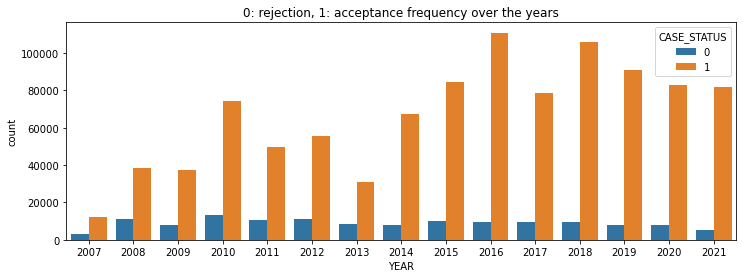

In [67]:
plt.figure(figsize = (12,4))
plt.title("0: rejection, 1: acceptance frequency over the years")
sns.countplot(x = "YEAR",hue = "CASE_STATUS",data = df)

In [68]:
# Denial Correlations

<AxesSubplot:xlabel='YEAR'>

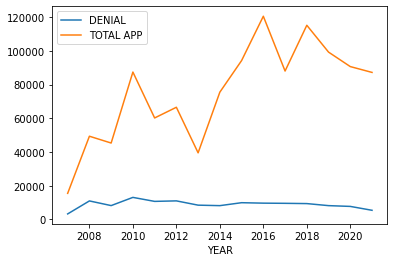

In [69]:
# Denial with Total Applications
ddf = pd.DataFrame(df.groupby("YEAR")["CASE_STATUS"].value_counts()[1::2])
ddf.columns = ["DENIAL"]
ddf = ddf.reset_index()
ddf = ddf.drop("CASE_STATUS", axis = 1)
ddf = ddf.set_index("YEAR")
tap = pd.DataFrame(df.groupby("YEAR")["CASE_STATUS"].count())
tap.columns = ["TOTAL APP"]
pd.concat([ddf,tap], axis = 1).plot()

In [70]:
st.linregress(x = tap["TOTAL APP"], y = ddf["DENIAL"])

LinregressResult(slope=0.027417041282492723, intercept=6812.859750191873, rvalue=0.33864327618233453, pvalue=0.21695546831857007, stderr=0.021127921270171806, intercept_stderr=1705.400108197762)

<AxesSubplot:xlabel='YEAR'>

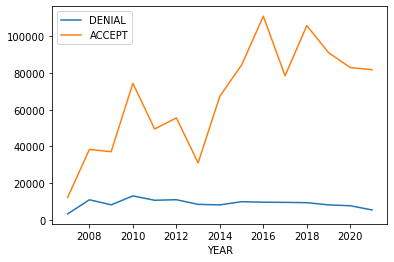

In [71]:
# Denial with Total Acceptance
adf = pd.DataFrame(df.groupby("YEAR")["CASE_STATUS"].value_counts()[0::2])
adf.columns = ["ACCEPT"]
adf = adf.reset_index()
adf = adf.drop("CASE_STATUS", axis = 1)
adf = adf.set_index("YEAR")
pd.concat([ddf,adf], axis = 1).plot()

In [72]:
st.linregress(x = adf["ACCEPT"], y = ddf["DENIAL"])

LinregressResult(slope=0.021920601347120035, intercept=7423.18552247059, rvalue=0.2641369055946373, pvalue=0.34145582135374064, stderr=0.02219970832935377, intercept_stderr=1602.7140238047862)

In [73]:
# DENIAL OVER TIME
st.linregress(x = ddf.reset_index()["YEAR"],y = ddf.reset_index()["DENIAL"])

LinregressResult(slope=-85.74642857142855, intercept=181578.97380952377, rvalue=-0.16182345938924142, pvalue=0.5644888647874491, stderr=145.02427546865837, intercept_stderr=292079.56286852894)

<AxesSubplot:xlabel='YEAR'>

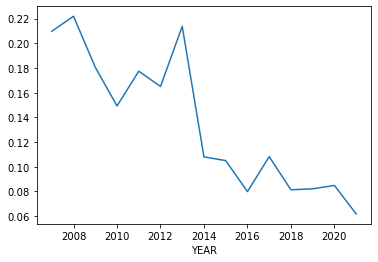

In [74]:
# % Denial over time
ddf["%D"] = ddf["DENIAL"]/tap["TOTAL APP"]
ddf["%D"].plot()

In [75]:
st.linregress(x = ddf.reset_index()["YEAR"],y = ddf.reset_index()["%D"])

LinregressResult(slope=-0.011099804826449716, intercept=22.490261950663776, rvalue=-0.893178988580577, pvalue=7.355491589116474e-06, stderr=0.001549991615804511, intercept_stderr=3.121690297235136)

In [76]:
# Acceptance Correlations
st.linregress(x = adf.reset_index()["YEAR"],y = adf.reset_index()["ACCEPT"])

LinregressResult(slope=5003.7642857142855, intercept=-10010864.07142857, rvalue=0.7836924486433685, pvalue=0.000546079908795739, stderr=1099.956048427987, intercept_stderr=2215316.5789742046)

In [77]:
st.linregress(x = adf.reset_index()["YEAR"][9:],y = adf.reset_index()["ACCEPT"][9:])

LinregressResult(slope=-4192.914285714285, intercept=8555228.15238095, rvalue=-0.5794541924427375, pvalue=0.22809955593932307, stderr=2948.675970922644, intercept_stderr=5951904.577677279)

<AxesSubplot:xlabel='YEAR'>

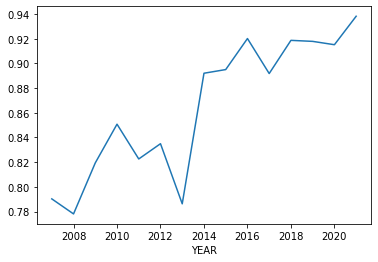

In [78]:
# Acceptance as %
adf["%A"] = adf["ACCEPT"]/tap["TOTAL APP"]
adf["%A"].plot()

In [79]:
st.linregress(x = adf.reset_index()["YEAR"],y = adf.reset_index()["%A"])

LinregressResult(slope=0.011099804826449717, intercept=-21.49026195066378, rvalue=0.893178988580577, pvalue=7.355491589116474e-06, stderr=0.0015499916158045115, intercept_stderr=3.121690297235137)

In [80]:
# TOTAL APPS CORRELATION
st.linregress(x = tap.reset_index()["YEAR"],y = tap.reset_index()["TOTAL APP"])

LinregressResult(slope=4918.017857142857, intercept=-9829285.097619047, rvalue=0.7514388956408858, pvalue=0.0012384282148646382, stderr=1197.6745858698323, intercept_stderr=2412122.166231452)

In [81]:
st.linregress(x = tap.reset_index()["YEAR"][9:],y = tap.reset_index()["TOTAL APP"][9:])

LinregressResult(slope=-4989.571428571428, intercept=10171572.095238095, rvalue=-0.6452080608626011, pvalue=0.16648585087356668, stderr=2954.1378041632374, intercept_stderr=5962929.292019501)

In [82]:
#######

In [83]:
#### WAGE ANALYSIS ####

In [84]:
df.groupby("YEAR")[["WO_A","PW_A"]].mean().iplot(kind = "bar")

In [85]:
st.linregress(x = df.dropna()["PW_A"],y = df.dropna()["WO_A"])

LinregressResult(slope=0.9868881699426905, intercept=10034.141011013402, rvalue=0.8624652183632864, pvalue=0.0, stderr=0.0005870827400032626, intercept_stderr=52.3724938450609)

In [86]:
st.linregress(y = df.reset_index().dropna()["PW_A"], x = df.reset_index().dropna()["YEAR"])

LinregressResult(slope=2290.3464452286526, intercept=-4532024.001537785, rvalue=0.2893622607325306, pvalue=0.0, stderr=7.680570941006364, intercept_stderr=15478.3438460645)

In [87]:
st.linregress(y = df.reset_index().dropna()["WO_A"], x = df.reset_index().dropna()["YEAR"])

LinregressResult(slope=2694.2815981238136, intercept=-5337118.759196211, rvalue=0.297479703814321, pvalue=0.0, stderr=8.765727618472628, intercept_stderr=17665.21619054088)

In [88]:
df.groupby("YEAR")[["WO_A","PW_A"]].quantile(.25).iplot(kind = "bar")

In [89]:
df.groupby("YEAR")[["WO_A","PW_A"]].quantile(.75).iplot(kind = "bar")

In [90]:
df.groupby("YEAR")[["WO_A","PW_A"]].quantile(.5).iplot(kind = "bar")

In [91]:
df.groupby("YEAR")[["WO_A","PW_A"]].max().iplot(kind = "bar")

In [92]:
yr = df["YEAR"].unique().tolist()
yr.sort()

In [93]:
st.linregress(y = df.groupby("YEAR")["WO_A"].quantile(.25), x = yr)

LinregressResult(slope=2788.077678571429, intercept=-5549548.094642858, rvalue=0.8498228165865107, pvalue=6.0393629698074604e-05, stderr=479.5919110841347, intercept_stderr=965900.3314587106)

In [94]:
st.linregress(y = df.groupby("YEAR")["WO_A"].quantile(.5), x = yr)

LinregressResult(slope=3176.7353571428566, intercept=-6311462.269285713, rvalue=0.94216745473646, pvalue=1.5377326295264936e-07, stderr=313.4084861199015, intercept_stderr=631206.1434499032)

In [95]:
st.linregress(y = df.groupby("YEAR")["WO_A"].quantile(.75), x = yr)

LinregressResult(slope=3606.8008928571426, intercept=-7156944.3482142845, rvalue=0.9760125094607313, pvalue=5.473601077386205e-10, stderr=223.14253440184635, intercept_stderr=449410.0983773038)

In [96]:
st.linregress(y = df.groupby("YEAR")["PW_A"].quantile(.25), x = yr)

LinregressResult(slope=2205.978928571428, intercept=-4383531.748809522, rvalue=0.787375286668562, pvalue=0.0004931082745758902, stderr=479.0299299041338, intercept_stderr=964768.4987578433)

In [97]:
st.linregress(y = df.groupby("YEAR")["PW_A"].quantile(.5), x = yr)

LinregressResult(slope=2895.8607142857136, intercept=-5752437.2519047605, rvalue=0.9241957367968797, pvalue=8.543996984073635e-07, stderr=331.904753018319, intercept_stderr=668457.7106991183)

In [98]:
st.linregress(y = df.groupby("YEAR")["PW_A"].quantile(.75), x = yr)

LinregressResult(slope=3182.47, intercept=-6311471.866666666, rvalue=0.9513620291159001, pvalue=5.1029778927848853e-08, stderr=285.8271491256376, intercept_stderr=575657.2029254241)

In [99]:
acy = df.groupby("YEAR")["CASE_STATUS"].value_counts()
acyper = pd.DataFrame(acy.groupby(level=0).transform(lambda x: (x / x.sum()).round(2)))
acyper.columns = ["Percent"]
f = acyper.reset_index()["YEAR"].tolist()
t = acyper.reset_index()["CASE_STATUS"].replace(1,"Accept").replace(0,"Reject").tolist()
idx = []
idx.extend([tuple(a) for a in zip (f,t)])
acyper.index = pd.MultiIndex.from_tuples(idx)
acyper

Percent
2007 Accept     0.79
     Reject     0.21
2008 Accept     0.78
     Reject     0.22
2009 Accept     0.82
     Reject     0.18
2010 Accept     0.85
     Reject     0.15
2011 Accept     0.82
     Reject     0.18
2012 Accept     0.83
     Reject     0.17
2013 Accept     0.79
     Reject     0.21
2014 Accept     0.89
     Reject     0.11
2015 Accept     0.90
     Reject     0.10
2016 Accept     0.92
     Reject     0.08
2017 Accept     0.89
     Reject     0.11
2018 Accept     0.92
     Reject     0.08
2019 Accept     0.92
     Reject     0.08
2020 Accept     0.92
     Reject     0.08
2021 Accept     0.94
     Reject     0.06

<AxesSubplot:title={'center':'Success Percent Over Each Year'}>

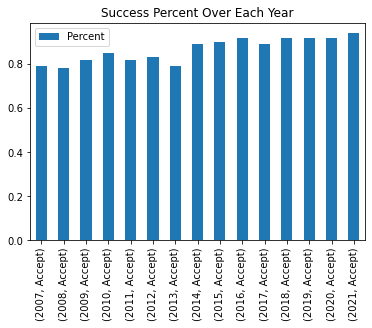

In [100]:
# Success Only
acyper[0:30:2].plot(kind = "bar", title = "Success Percent Over Each Year")

In [101]:
acceptyear = pd.DataFrame([acyper[0:30:2].reset_index()["Percent"].values,yr]).transpose()
st.linregress(y = acceptyear[0],x = acceptyear[1])

LinregressResult(slope=0.011321428571428574, intercept=-21.936023809523817, rvalue=0.9013638997785911, pvalue=4.471029044271361e-06, stderr=0.0015086203545457207, intercept_stderr=3.038368385336334)

In [102]:
st.linregress(y = df.dropna()["CASE_STATUS"], x = df.dropna()["WO_A"])

LinregressResult(slope=1.3728269092875443e-06, intercept=0.7766852996456316, rvalue=0.16565839769376048, pvalue=0.0, stderr=8.284809514965026e-09, intercept_stderr=0.0008214849209165955)

In [103]:
st.linregress(x = df.groupby("YEAR")["WO_A"].quantile(.5), y = acceptyear[0])

LinregressResult(slope=3.0261743523048028e-06, intercept=0.6036214836282887, rvalue=0.8123549179840506, pvalue=0.00023345821697135874, stderr=6.0251335064897e-07, intercept_stderr=0.05284106541521096)

In [104]:
st.linregress(x = df.groupby("YEAR")["WO_A"].quantile(.25), y = acceptyear[0])

LinregressResult(slope=2.7486553431013966e-06, intercept=0.6849106345827876, rvalue=0.7179524772693084, pvalue=0.0025761593283772214, stderr=7.391279577125307e-07, intercept_stderr=0.04963492693556556)

In [105]:
st.linregress(x = df.groupby("YEAR")["WO_A"].quantile(.75), y = acceptyear[0])

LinregressResult(slope=2.895799070105473e-06, intercept=0.5550407891039961, rvalue=0.8519892954404072, pvalue=5.5252681874755944e-05, stderr=4.935468778830168e-07, intercept_stderr=0.05346871099305811)

In [106]:
# ACCEPT % OVER YEAR IN EACH STATE!!! 
# EMPLOYER STATE PERCENT TABLE
empy = df.groupby("EMPLOYER_STATE")["CASE_STATUS"].value_counts()
empyer = pd.DataFrame(empy.groupby(level=0).transform(lambda x: (x / x.sum()).round(2)))
empyer.columns = ["Percent"]
f1 = empyer.reset_index()["EMPLOYER_STATE"].tolist()
t1 = empyer.reset_index()["CASE_STATUS"].replace(1,"Accept").replace(0,"Reject").tolist()
idx1 = []
idx1.extend([tuple(a) for a in zip (f1,t1)])
empyer.index = pd.MultiIndex.from_tuples(idx1)
empyer = empyer.reset_index()
empyer = empyer[empyer["level_1"]=="Accept"]
empyer = empyer.drop("level_1",axis = 1)

empycount = pd.DataFrame(df.groupby("EMPLOYER_STATE")["CASE_STATUS"].value_counts())
empycount.columns = ["Count"]
empycount = empycount.reset_index()
empycount = empycount[empycount["CASE_STATUS"]==1]
empycount = empycount["Count"]

empyer = pd.concat([empyer, empycount], axis = 1)
empyer.columns = ["State","Percent","Count"]
empyer["Count"] = empyer["State"].astype(str)+": "+empyer["Count"].astype(str)+" Successful Applications"
empyer

,State,Percent,Count
0,AK,0.76,AK: 290 Successful Applications
2,AL,0.85,AL: 4928 Successful Applications
4,AR,0.80,AR: 4340 Successful Applications
6,AZ,0.81,AZ: 8138 Successful Applications
8,BC,1.00,BC: 8 Successful Applications
9,CA,0.91,CA: 253648 Successful Applications
11,CO,0.75,CO: 7039 Successful Applications
13,CT,0.87,CT: 10055 Successful Applications
15,DC,0.84,DC: 4449 Successful Applications
17,DE,0.87,DE: 3661 Successful Applications


In [107]:
# Choropleth Map of Employer State Accept %
data = dict(type = "choropleth",
           locations = empyer["State"],
           locationmode = "USA-states",
           z = empyer["Percent"].astype(float),
           text = empyer["Count"],
           colorbar={"title":"Percent Accepted"},
           colorscale = "delta",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Percent Accepted in Employer Headquartered States",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [108]:
# ACCEPT % OVER YEAR IN EACH STATE!!! 
# JOB STATE PERCENT TABLE
joby = df.groupby("JOB_INFO_WORK_STATE")["CASE_STATUS"].value_counts()
jobyer = pd.DataFrame(joby.groupby(level=0).transform(lambda x: (x / x.sum()).round(2)))
jobyer.columns = ["Percent"]
f1 = jobyer.reset_index()["JOB_INFO_WORK_STATE"].tolist()
t1 = jobyer.reset_index()["CASE_STATUS"].replace(1,"Accept").replace(0,"Reject").tolist()
idx1 = []
idx1.extend([tuple(a) for a in zip (f1,t1)])
jobyer.index = pd.MultiIndex.from_tuples(idx1)
jobyer = jobyer.reset_index()
jobyer = jobyer[jobyer["level_1"]=="Accept"]
jobyer = jobyer.drop("level_1",axis = 1)

jobycount = pd.DataFrame(df.groupby("JOB_INFO_WORK_STATE")["CASE_STATUS"].value_counts())
jobycount.columns = ["Count"]
jobycount = jobycount.reset_index()
jobycount = jobycount[jobycount["CASE_STATUS"]==1]
jobycount = jobycount["Count"]

jobyer = pd.concat([jobyer, jobycount], axis = 1)
jobyer.columns = ["State","Percent","Count"]
jobyer["Count"] = jobyer["State"].astype(str)+": "+jobyer["Count"].astype(str)+" Successful Applications"
jobyer

,State,Percent,Count
0,AK,0.78,AK: 326 Successful Applications
2,AL,0.86,AL: 4675 Successful Applications
4,AR,0.73,AR: 3503 Successful Applications
6,AZ,0.85,AZ: 11734 Successful Applications
8,CA,0.91,CA: 236715 Successful Applications
10,CO,0.79,CO: 8577 Successful Applications
12,CT,0.87,CT: 9660 Successful Applications
14,DC,0.84,DC: 4966 Successful Applications
16,DE,0.89,DE: 4867 Successful Applications
18,FL,0.84,FL: 37937 Successful Applications


In [109]:
# Choropleth Map of JOB State Accept %
data = dict(type = "choropleth",
           locations = jobyer["State"],
           locationmode = "USA-states",
           z = jobyer["Percent"].astype(float),
           text = jobyer["Count"],
           colorbar={"title":"Percent Accepted"},
           colorscale = "delta",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Percent Accepted in States Worked In",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [110]:
######################################

In [111]:
##### AVG PAY BY EMPLOYER HQ STATES AND WORKSITE STATE #####

In [112]:
# AVERAGE PAY IN EACH STATE (EMPLOYER) w/ count
avgpayempstate = pd.DataFrame(df.groupby("EMPLOYER_STATE")["WO_A"].mean().dropna().sort_values(ascending = False))
avgpayempstate = avgpayempstate.merge(pd.DataFrame(df.groupby("EMPLOYER_STATE")["WO_A"].count()),how = "inner",on = "EMPLOYER_STATE")
avgpayempstate.columns = ["Average Pay","Count"]
avgpayempstate = avgpayempstate.reset_index().sort_values(by = "Average Pay", ascending = False)
avgpayempstate["text"] = avgpayempstate["EMPLOYER_STATE"].astype(str)+": "+avgpayempstate["Count"].astype(str)
avgpayempstate

,EMPLOYER_STATE,Average Pay,Count,text
0,BC,146358.500000,8,BC: 8
1,FM,120000.000000,1,FM: 1
2,WA,108248.296253,65699,WA: 65699
3,CA,103458.729733,274786,CA: 274786
4,RI,99320.085504,2580,RI: 2580
5,MA,97923.935837,38879,MA: 38879
6,NY,91822.714219,94964,NY: 94964
7,PA,89782.476567,35612,PA: 35612
8,NJ,89191.431630,93145,NJ: 93145
9,CT,88739.285512,11358,CT: 11358


In [113]:
# Choropleth map of average wage for each Employer HQ state
data = dict(type = "choropleth",
           locations = avgpayempstate["EMPLOYER_STATE"],
           locationmode = "USA-states",
           z = avgpayempstate["Average Pay"].astype(float),
           text = avgpayempstate["text"],
           colorbar={"title":"Annual Wage in USD"},
           colorscale = "greens",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Average Wage Offered by Employer Headquartered States",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))

choro = go.Figure(data, layout)
iplot(choro)

In [114]:
# Median PAY IN EACH STATE (EMPLOYER HQ) w/ count
medpayempstate = pd.DataFrame(df.groupby("EMPLOYER_STATE")["WO_A"].median().dropna().sort_values(ascending = False))
medpayempstate = medpayempstate.merge(pd.DataFrame(df.groupby("EMPLOYER_STATE")["WO_A"].count()),how = "inner",on = "EMPLOYER_STATE")
medpayempstate.columns = ["Median Pay","Count"]
medpayempstate = medpayempstate.reset_index().sort_values(by = "Median Pay", ascending = False)
medpayempstate["text"] = medpayempstate["EMPLOYER_STATE"].astype(str)+": "+medpayempstate["Count"].astype(str)
medpayempstate

,EMPLOYER_STATE,Median Pay,Count,text
0,BC,144655.000,8,BC: 8
1,FM,120000.000,1,FM: 1
2,WA,105456.000,65699,WA: 65699
3,CA,105000.000,274786,CA: 274786
4,RI,102370.000,2580,RI: 2580
5,MA,97053.000,38879,MA: 38879
6,NY,91562.000,94964,NY: 94964
7,NJ,90459.000,93145,NJ: 93145
8,VT,89669.000,1126,VT: 1126
9,PA,88442.000,35612,PA: 35612


In [115]:
# Choropleth map of median wage for each Employer HQ state
data = dict(type = "choropleth",
           locations = medpayempstate["EMPLOYER_STATE"],
           locationmode = "USA-states",
           z = medpayempstate["Median Pay"].astype(float),
           text = medpayempstate["text"],
           colorbar={"title":"Annual Wage in USD"},
           colorscale = "greens",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Median Wage Offered by Employer Headquartered States",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))

choro = go.Figure(data, layout)
iplot(choro)

In [116]:
# AVERAGE PAY IN EACH STATE (JOB SITE) w/count
avgpayjobstate = pd.DataFrame(df.groupby("JOB_INFO_WORK_STATE")["WO_A"].mean().dropna().sort_values(ascending = False))
avgpayjobstate = avgpayjobstate.merge(pd.DataFrame(df.groupby("JOB_INFO_WORK_STATE")["WO_A"].count()),how = "inner",on = "JOB_INFO_WORK_STATE")
avgpayjobstate.columns = ["Average Pay","Count"]
avgpayjobstate = avgpayjobstate.reset_index().sort_values(by = "Average Pay", ascending = False)
avgpayjobstate["text"] = avgpayjobstate["JOB_INFO_WORK_STATE"].astype(str)+": "+avgpayjobstate["Count"].astype(str)
avgpayjobstate

,JOB_INFO_WORK_STATE,Average Pay,Count,text
0,WA,108734.322777,64393,WA: 64393
1,CA,104803.778729,257578,CA: 257578
2,MA,97081.293699,38490,MA: 38490
3,NY,93659.664546,97591,NY: 97591
4,RI,91621.889023,1709,RI: 1709
5,NH,89525.609586,2513,NH: 2513
6,NJ,88647.198446,91795,NJ: 91795
7,ME,88130.289049,1009,ME: 1009
8,CT,87220.750047,10919,CT: 10919
9,MI,86907.324304,33914,MI: 33914


In [117]:
# Choropleth map of average wage for each JOB state
data = dict(type = "choropleth",
           locations = avgpayjobstate["JOB_INFO_WORK_STATE"],
           locationmode = "USA-states",
           z = avgpayjobstate["Average Pay"].astype(float),
           text = avgpayjobstate["text"],
           colorbar={"title":"Annual Wage in USD"},
           colorscale = "greens",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Average Wage Offered by States Worked In",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))

choro = go.Figure(data, layout)
iplot(choro)

In [118]:
# Median PAY IN EACH STATE (Job site) w/ count
medpayjobstate = pd.DataFrame(df.groupby("JOB_INFO_WORK_STATE")["WO_A"].median().dropna().sort_values(ascending = False))
medpayjobstate = medpayjobstate.merge(pd.DataFrame(df.groupby("JOB_INFO_WORK_STATE")["WO_A"].count()),how = "inner",on = "JOB_INFO_WORK_STATE")
medpayjobstate.columns = ["Median Pay","Count"]
medpayjobstate = medpayjobstate.reset_index().sort_values(by = "Median Pay", ascending = False)
medpayjobstate["text"] = medpayjobstate["JOB_INFO_WORK_STATE"].astype(str)+": "+medpayjobstate["Count"].astype(str)
medpayjobstate

,JOB_INFO_WORK_STATE,Median Pay,Count,text
0,CA,108306.000,257578,CA: 257578
1,WA,106000.000,64393,WA: 64393
2,MA,97500.000,38490,MA: 38490
3,NY,93000.000,97591,NY: 97591
4,NJ,90459.000,91795,NJ: 91795
5,VT,89000.000,1041,VT: 1041
6,NH,88450.000,2513,NH: 2513
7,OR,87500.000,11303,OR: 11303
8,CT,87000.000,10919,CT: 10919
9,RI,86840.000,1709,RI: 1709


In [119]:
# Choropleth map of median wage for each job site State
data = dict(type = "choropleth",
           locations = medpayjobstate["JOB_INFO_WORK_STATE"],
           locationmode = "USA-states",
           z = medpayjobstate["Median Pay"].astype(float),
           text = medpayjobstate["text"],
           colorbar={"title":"Annual Wage in USD"},
           colorscale = "greens",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Median Wage Offered by States Worked In",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))

choro = go.Figure(data, layout)
iplot(choro)

In [120]:
#################################################

In [121]:
#### JOB CODE ANALYSIS #####

In [122]:
allapp_code = pd.DataFrame(df["PW_SOC_CODE"].value_counts()[:15]).reset_index()
allapp_code.columns = ["AACODE","COUNT AAC"]

In [123]:
goodcode = pd.DataFrame(df[df["CASE_STATUS"]==1]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
goodcode.columns = ["GCODE","COUNT GC"]

In [124]:
pd.concat([allapp_code,goodcode], axis = 1)

,AACODE,COUNT AAC,GCODE,COUNT GC
0,15-1132,255068,15-1132,240189
1,15-1121,72492,15-1121,68358
2,15-1133,70038,15-1133,66911
3,15-1031,52120,15-1031,45339
4,17-2072,33149,17-2072,30647
5,15-1051,26908,15-1199,24710
6,15-1199,25781,15-1051,22534
7,11-3021,22790,11-3021,20558
8,15-1032,20394,15-1032,17000
9,17-2141,16913,17-2141,15526


In [125]:
# Acceptance Codes
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["PW_SOC_CODE"].value_counts()[:15]
top15acode = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [126]:
len(top15acode)

35

In [127]:
# Acceptance Codes
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["PW_SOC_CODE"].value_counts()[:10]
top10acode = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [128]:
len(top10acode)

26

In [129]:
# Acceptance Codes
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["PW_SOC_CODE"].value_counts()[:5]
top5acode = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [130]:
len(top5acode)

11

In [131]:
# Apply top codes
def grab (year):
    return df[df["YEAR"]==year]["PW_SOC_CODE"].value_counts()[:15]
top15code = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [132]:
len(top15code)

36

In [133]:
def grab (year):
    return df[df["YEAR"]==year]["PW_SOC_CODE"].value_counts()[:10]
top10code = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [134]:
len(top10code)

26

In [135]:
def grab (year):
    return df[df["YEAR"]==year]["PW_SOC_CODE"].value_counts()[:5]
top5code = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [136]:
len(top5code)

12

In [137]:
# Clean Up the top 15 job codes table for Applications: Only Numbers
def clen (year):
    return pd.DataFrame(top15code[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
top15jcanum = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
top15jcanum

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1769.0,5558.0,6008.0,13537.0,13807.0,10706.0,12851.0,26088.0,30873.0,41803.0,27319.0,31151.0,27982.0,25094.0,24019.0
1,872.0,3033.0,3231.0,7421.0,6695.0,7888.0,3970.0,6717.0,11398.0,10809.0,7805.0,11624.0,10304.0,9300.0,9446.0
2,753.0,2843.0,2764.0,5281.0,5859.0,4850.0,1952.0,4521.0,5900.0,8331.0,7054.0,9875.0,7302.0,6231.0,5885.0
3,504.0,1642.0,1373.0,2150.0,1619.0,2638.0,1666.0,3317.0,3359.0,3734.0,2696.0,5365.0,5029.0,5721.0,5666.0
4,304.0,1366.0,1092.0,2116.0,1450.0,2499.0,1352.0,2086.0,2080.0,2673.0,2443.0,3023.0,2753.0,2249.0,2348.0
5,296.0,982.0,969.0,2030.0,1082.0,2435.0,821.0,1436.0,1720.0,2293.0,1929.0,2279.0,2177.0,2095.0,1940.0
6,295.0,899.0,917.0,1796.0,980.0,1606.0,650.0,1420.0,1619.0,2004.0,1430.0,2056.0,1722.0,1653.0,1548.0
7,288.0,862.0,846.0,1494.0,945.0,1402.0,576.0,1131.0,1505.0,1970.0,1370.0,1823.0,1603.0,1278.0,1193.0
8,225.0,762.0,753.0,1455.0,935.0,1134.0,564.0,1045.0,1282.0,1700.0,1304.0,1742.0,1566.0,1086.0,1179.0
9,215.0,733.0,734.0,1339.0,915.0,1093.0,558.0,960.0,1168.0,1502.0,1290.0,1695.0,1318.0,1016.0,1029.0


In [138]:
# Graph of the Freq of top 15 Job Codes over the years: apps
top15jcanum.transpose().iplot()

In [139]:
# Clean Up the top 15 job code table for Applications: Only Name
def clen (year):
    return pd.DataFrame(pd.DataFrame(top15code[year].sort_values(ascending = False).dropna()).reset_index().drop(year,axis = 1))
top15jcaname = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
top15jcaname.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15jcaname

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,15-1031,15-1031,15-1031,15-1031,15-1031,15-1031,15-1132,15-1132,15-1132,15-1132,15-1132,15-1132,15-1132,15-1132,15-1132
1,15-1051,15-1051,15-1051,15-1051,15-1051,15-1132,15-1121,15-1121,15-1121,15-1121,15-1121,15-1133,15-1133,15-1133,15-1133
2,15-1032,15-1032,15-1032,15-1032,15-1032,15-1051,15-1133,15-1133,15-1133,15-1133,15-1133,15-1121,15-1121,15-1121,15-1121
3,11-3021,35-2014,11-3021,17-2072,17-2072,15-1032,17-2072,17-2072,17-2072,17-2072,17-2072,15-1199,15-1199,15-1199,15-1199
4,15-1021,11-3021,17-2072,11-3021,11-3021,15-1121,11-3021,11-3021,11-3021,11-3021,15-1199,17-2072,17-2072,15-2041,15-2041
5,19-3021,17-2072,15-1021,15-1021,15-2031,17-2072,15-1142,15-1142,13-2011,51-3022,51-3022,15-2041,15-2041,17-2072,17-2072
6,35-2014,19-3021,35-2014,15-2031,15-1021,15-1133,13-2011,13-2011,51-3022,15-1142,15-1142,13-2011,13-2011,13-2011,13-2011
7,17-2072,15-1021,19-3021,35-2014,17-2141,11-3021,15-1141,17-2141,15-1142,13-2011,11-3021,17-2141,17-2141,17-2141,17-2141
8,13-2051,35-1011,15-2031,19-3021,19-3021,17-2141,29-1063,13-1111,17-2141,17-2141,13-2011,15-1142,53-3032,11-3021,37-3011
9,17-2141,13-2051,17-2141,17-2141,13-2051,13-2011,17-2141,15-1141,17-2071,15-1199,17-2141,11-3021,51-3022,13-2051,11-3021


In [140]:
# Clean Up the top 15 job code table for Success: Only Numbers
def clen (year):
    return pd.DataFrame(top15acode[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
top15jcsnum = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)

top15jcsnum

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1455.0,4851.0,5166.0,12306.0,12584.0,8853.0,10922.0,24037.0,28779.0,39987.0,25553.0,29793.0,26907.0,23801.0,23161.0
1,730.0,2626.0,2734.0,6444.0,5861.0,7249.0,3358.0,6167.0,10811.0,10351.0,7340.0,11132.0,10011.0,8967.0,9137.0
2,681.0,2493.0,2450.0,4434.0,4760.0,4056.0,1646.0,4229.0,5504.0,8010.0,6760.0,9465.0,6976.0,5908.0,5701.0
3,464.0,1230.0,1246.0,1973.0,1468.0,2281.0,1340.0,3050.0,3020.0,3500.0,2547.0,5162.0,4828.0,5427.0,5475.0
4,264.0,1008.0,996.0,1897.0,1259.0,2211.0,1034.0,1881.0,1897.0,2562.0,2331.0,2890.0,2641.0,2165.0,2259.0
5,248.0,887.0,849.0,1780.0,980.0,2115.0,689.0,1303.0,1546.0,1885.0,1329.0,2205.0,2077.0,1994.0,1866.0
6,237.0,772.0,692.0,1682.0,840.0,1515.0,517.0,1251.0,1395.0,1766.0,1209.0,1900.0,1581.0,1531.0,1455.0
7,185.0,696.0,673.0,1273.0,823.0,1083.0,496.0,1027.0,1169.0,1639.0,1198.0,1739.0,1503.0,1205.0,1134.0
8,179.0,624.0,666.0,1229.0,805.0,995.0,485.0,939.0,1076.0,1594.0,1176.0,1647.0,1161.0,1032.0,993.0
9,177.0,592.0,613.0,1135.0,781.0,969.0,450.0,872.0,1057.0,1442.0,1155.0,1622.0,1149.0,960.0,984.0


In [141]:
# Graph of the Freq of top 15 Job Codes over the years: success
top15jcsnum.transpose().iplot()

In [142]:
# Clean Up the top 15 employer table for Success: Only Name
def clen (year):
    return pd.DataFrame(pd.DataFrame(top15acode[year].sort_values(ascending = False).dropna()).reset_index().drop(year,axis = 1))
top15jcsname = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
top15jcsname.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15jcsname

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,15-1031,15-1031,15-1031,15-1031,15-1031,15-1031,15-1132,15-1132,15-1132,15-1132,15-1132,15-1132,15-1132,15-1132,15-1132
1,15-1051,15-1051,15-1051,15-1051,15-1051,15-1132,15-1121,15-1121,15-1121,15-1121,15-1121,15-1133,15-1133,15-1133,15-1133
2,15-1032,15-1032,15-1032,15-1032,15-1032,15-1051,15-1133,15-1133,15-1133,15-1133,15-1133,15-1121,15-1121,15-1121,15-1121
3,11-3021,11-3021,11-3021,17-2072,17-2072,15-1121,17-2072,17-2072,17-2072,17-2072,17-2072,15-1199,15-1199,15-1199,15-1199
4,17-2072,35-2014,17-2072,11-3021,11-3021,17-2072,11-3021,11-3021,11-3021,11-3021,15-1199,17-2072,17-2072,15-2041,15-2041
5,15-1021,17-2072,15-1021,15-1021,15-2031,15-1032,15-1142,15-1142,13-2011,15-1142,15-1142,15-2041,15-2041,17-2072,17-2072
6,19-3021,19-3021,19-3021,15-2031,17-2141,15-1133,13-2011,13-2011,15-1142,13-2011,11-3021,13-2011,13-2011,13-2011,13-2011
7,17-2141,15-1021,15-2031,19-3021,15-1021,11-3021,29-1063,17-2141,17-2141,51-3022,17-2141,17-2141,17-2141,17-2141,17-2141
8,13-2051,13-2051,17-2141,17-2141,15-1071,17-2141,15-1141,13-1111,17-2071,17-2141,15-2041,15-1142,15-1142,11-3021,11-3021
9,13-2011.01,17-2141,35-2014,13-2051,13-2051,13-2011,17-2141,15-1141,51-3022,15-1199,13-2011,11-3021,11-3021,13-2051,37-3011


In [143]:
# Merging the Name with the Count: Success Top 15
def merge(year):
    return top15jcsname[year].str.cat(top15jcsnum[year].astype(str), sep = ", ")
top15jcamerge = pd.concat([merge(2007),merge(2008),merge(2009),merge(2010),
             merge(2011),merge(2012),merge(2013),merge(2014),merge(2015),
             merge(2016),merge(2017),merge(2018),merge(2019),merge(2020),
             merge(2021)],axis = 1)
top15jcamerge.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15jcamerge

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"15-1031, 1455.0","15-1031, 4851.0","15-1031, 5166.0","15-1031, 12306.0","15-1031, 12584.0","15-1031, 8853.0","15-1132, 10922.0","15-1132, 24037.0","15-1132, 28779.0","15-1132, 39987.0","15-1132, 25553.0","15-1132, 29793.0","15-1132, 26907.0","15-1132, 23801.0","15-1132, 23161.0"
1,"15-1051, 730.0","15-1051, 2626.0","15-1051, 2734.0","15-1051, 6444.0","15-1051, 5861.0","15-1132, 7249.0","15-1121, 3358.0","15-1121, 6167.0","15-1121, 10811.0","15-1121, 10351.0","15-1121, 7340.0","15-1133, 11132.0","15-1133, 10011.0","15-1133, 8967.0","15-1133, 9137.0"
2,"15-1032, 681.0","15-1032, 2493.0","15-1032, 2450.0","15-1032, 4434.0","15-1032, 4760.0","15-1051, 4056.0","15-1133, 1646.0","15-1133, 4229.0","15-1133, 5504.0","15-1133, 8010.0","15-1133, 6760.0","15-1121, 9465.0","15-1121, 6976.0","15-1121, 5908.0","15-1121, 5701.0"
3,"11-3021, 464.0","11-3021, 1230.0","11-3021, 1246.0","17-2072, 1973.0","17-2072, 1468.0","15-1121, 2281.0","17-2072, 1340.0","17-2072, 3050.0","17-2072, 3020.0","17-2072, 3500.0","17-2072, 2547.0","15-1199, 5162.0","15-1199, 4828.0","15-1199, 5427.0","15-1199, 5475.0"
4,"17-2072, 264.0","35-2014, 1008.0","17-2072, 996.0","11-3021, 1897.0","11-3021, 1259.0","17-2072, 2211.0","11-3021, 1034.0","11-3021, 1881.0","11-3021, 1897.0","11-3021, 2562.0","15-1199, 2331.0","17-2072, 2890.0","17-2072, 2641.0","15-2041, 2165.0","15-2041, 2259.0"
5,"15-1021, 248.0","17-2072, 887.0","15-1021, 849.0","15-1021, 1780.0","15-2031, 980.0","15-1032, 2115.0","15-1142, 689.0","15-1142, 1303.0","13-2011, 1546.0","15-1142, 1885.0","15-1142, 1329.0","15-2041, 2205.0","15-2041, 2077.0","17-2072, 1994.0","17-2072, 1866.0"
6,"19-3021, 237.0","19-3021, 772.0","19-3021, 692.0","15-2031, 1682.0","17-2141, 840.0","15-1133, 1515.0","13-2011, 517.0","13-2011, 1251.0","15-1142, 1395.0","13-2011, 1766.0","11-3021, 1209.0","13-2011, 1900.0","13-2011, 1581.0","13-2011, 1531.0","13-2011, 1455.0"
7,"17-2141, 185.0","15-1021, 696.0","15-2031, 673.0","19-3021, 1273.0","15-1021, 823.0","11-3021, 1083.0","29-1063, 496.0","17-2141, 1027.0","17-2141, 1169.0","51-3022, 1639.0","17-2141, 1198.0","17-2141, 1739.0","17-2141, 1503.0","17-2141, 1205.0","17-2141, 1134.0"
8,"13-2051, 179.0","13-2051, 624.0","17-2141, 666.0","17-2141, 1229.0","15-1071, 805.0","17-2141, 995.0","15-1141, 485.0","13-1111, 939.0","17-2071, 1076.0","17-2141, 1594.0","15-2041, 1176.0","15-1142, 1647.0","15-1142, 1161.0","11-3021, 1032.0","11-3021, 993.0"
9,"13-2011.01, 177.0","17-2141, 592.0","35-2014, 613.0","13-2051, 1135.0","13-2051, 781.0","13-2011, 969.0","17-2141, 450.0","15-1141, 872.0","51-3022, 1057.0","15-1199, 1442.0","13-2011, 1155.0","11-3021, 1622.0","11-3021, 1149.0","13-2051, 960.0","37-3011, 984.0"


In [144]:
# Merging the Name with the Count: Applications Top 15
def merge(year):
    return top15jcaname[year].str.cat(top15jcanum[year].astype(str), sep = ", ")
top15jcmerge = pd.concat([merge(2007),merge(2008),merge(2009),merge(2010),
             merge(2011),merge(2012),merge(2013),merge(2014),merge(2015),
             merge(2016),merge(2017),merge(2018),merge(2019),merge(2020),
             merge(2021)],axis = 1)
top15jcmerge.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15jcmerge

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"15-1031, 1769.0","15-1031, 5558.0","15-1031, 6008.0","15-1031, 13537.0","15-1031, 13807.0","15-1031, 10706.0","15-1132, 12851.0","15-1132, 26088.0","15-1132, 30873.0","15-1132, 41803.0","15-1132, 27319.0","15-1132, 31151.0","15-1132, 27982.0","15-1132, 25094.0","15-1132, 24019.0"
1,"15-1051, 872.0","15-1051, 3033.0","15-1051, 3231.0","15-1051, 7421.0","15-1051, 6695.0","15-1132, 7888.0","15-1121, 3970.0","15-1121, 6717.0","15-1121, 11398.0","15-1121, 10809.0","15-1121, 7805.0","15-1133, 11624.0","15-1133, 10304.0","15-1133, 9300.0","15-1133, 9446.0"
2,"15-1032, 753.0","15-1032, 2843.0","15-1032, 2764.0","15-1032, 5281.0","15-1032, 5859.0","15-1051, 4850.0","15-1133, 1952.0","15-1133, 4521.0","15-1133, 5900.0","15-1133, 8331.0","15-1133, 7054.0","15-1121, 9875.0","15-1121, 7302.0","15-1121, 6231.0","15-1121, 5885.0"
3,"11-3021, 504.0","35-2014, 1642.0","11-3021, 1373.0","17-2072, 2150.0","17-2072, 1619.0","15-1032, 2638.0","17-2072, 1666.0","17-2072, 3317.0","17-2072, 3359.0","17-2072, 3734.0","17-2072, 2696.0","15-1199, 5365.0","15-1199, 5029.0","15-1199, 5721.0","15-1199, 5666.0"
4,"15-1021, 304.0","11-3021, 1366.0","17-2072, 1092.0","11-3021, 2116.0","11-3021, 1450.0","15-1121, 2499.0","11-3021, 1352.0","11-3021, 2086.0","11-3021, 2080.0","11-3021, 2673.0","15-1199, 2443.0","17-2072, 3023.0","17-2072, 2753.0","15-2041, 2249.0","15-2041, 2348.0"
5,"19-3021, 296.0","17-2072, 982.0","15-1021, 969.0","15-1021, 2030.0","15-2031, 1082.0","17-2072, 2435.0","15-1142, 821.0","15-1142, 1436.0","13-2011, 1720.0","51-3022, 2293.0","51-3022, 1929.0","15-2041, 2279.0","15-2041, 2177.0","17-2072, 2095.0","17-2072, 1940.0"
6,"35-2014, 295.0","19-3021, 899.0","35-2014, 917.0","15-2031, 1796.0","15-1021, 980.0","15-1133, 1606.0","13-2011, 650.0","13-2011, 1420.0","51-3022, 1619.0","15-1142, 2004.0","15-1142, 1430.0","13-2011, 2056.0","13-2011, 1722.0","13-2011, 1653.0","13-2011, 1548.0"
7,"17-2072, 288.0","15-1021, 862.0","19-3021, 846.0","35-2014, 1494.0","17-2141, 945.0","11-3021, 1402.0","15-1141, 576.0","17-2141, 1131.0","15-1142, 1505.0","13-2011, 1970.0","11-3021, 1370.0","17-2141, 1823.0","17-2141, 1603.0","17-2141, 1278.0","17-2141, 1193.0"
8,"13-2051, 225.0","35-1011, 762.0","15-2031, 753.0","19-3021, 1455.0","19-3021, 935.0","17-2141, 1134.0","29-1063, 564.0","13-1111, 1045.0","17-2141, 1282.0","17-2141, 1700.0","13-2011, 1304.0","15-1142, 1742.0","53-3032, 1566.0","11-3021, 1086.0","37-3011, 1179.0"
9,"17-2141, 215.0","13-2051, 733.0","17-2141, 734.0","17-2141, 1339.0","13-2051, 915.0","13-2011, 1093.0","17-2141, 558.0","15-1141, 960.0","17-2071, 1168.0","15-1199, 1502.0","17-2141, 1290.0","11-3021, 1695.0","51-3022, 1318.0","13-2051, 1016.0","11-3021, 1029.0"


In [145]:
# Merging the Success v Application
def mergy (year):
    return pd.concat([top15jcmerge[year],top15jcamerge[year]],axis = 1)
mergejcas = pd.concat([mergy(2007),mergy(2008),mergy(2009),mergy(2010),mergy(2011),mergy(2012),
           mergy(2013),mergy(2014),mergy(2015),mergy(2016),mergy(2017),mergy(2018),
           mergy(2019),mergy(2020),mergy(2021)],axis = 1)
mergejcas.columns = ["2007A","2007S","2008A","2008S","2009A","2009S","2010A","2010S",
                  "2011A","2011S","2012A","2012S","2013A","2013S","2014A","2014S",
                  "2015A","2015S","2016A","2016S","2017A","2017S","2018A","2018S",
                  "2019A","2019S","2020A","2020S","2021A","2021S"]
mergejcas

,2007A,2007S,2008A,2008S,2009A,2009S,2010A,2010S,2011A,2011S,...,2017A,2017S,2018A,2018S,2019A,2019S,2020A,2020S,2021A,2021S
0,"15-1031, 1769.0","15-1031, 1455.0","15-1031, 5558.0","15-1031, 4851.0","15-1031, 6008.0","15-1031, 5166.0","15-1031, 13537.0","15-1031, 12306.0","15-1031, 13807.0","15-1031, 12584.0",...,"15-1132, 27319.0","15-1132, 25553.0","15-1132, 31151.0","15-1132, 29793.0","15-1132, 27982.0","15-1132, 26907.0","15-1132, 25094.0","15-1132, 23801.0","15-1132, 24019.0","15-1132, 23161.0"
1,"15-1051, 872.0","15-1051, 730.0","15-1051, 3033.0","15-1051, 2626.0","15-1051, 3231.0","15-1051, 2734.0","15-1051, 7421.0","15-1051, 6444.0","15-1051, 6695.0","15-1051, 5861.0",...,"15-1121, 7805.0","15-1121, 7340.0","15-1133, 11624.0","15-1133, 11132.0","15-1133, 10304.0","15-1133, 10011.0","15-1133, 9300.0","15-1133, 8967.0","15-1133, 9446.0","15-1133, 9137.0"
2,"15-1032, 753.0","15-1032, 681.0","15-1032, 2843.0","15-1032, 2493.0","15-1032, 2764.0","15-1032, 2450.0","15-1032, 5281.0","15-1032, 4434.0","15-1032, 5859.0","15-1032, 4760.0",...,"15-1133, 7054.0","15-1133, 6760.0","15-1121, 9875.0","15-1121, 9465.0","15-1121, 7302.0","15-1121, 6976.0","15-1121, 6231.0","15-1121, 5908.0","15-1121, 5885.0","15-1121, 5701.0"
3,"11-3021, 504.0","11-3021, 464.0","35-2014, 1642.0","11-3021, 1230.0","11-3021, 1373.0","11-3021, 1246.0","17-2072, 2150.0","17-2072, 1973.0","17-2072, 1619.0","17-2072, 1468.0",...,"17-2072, 2696.0","17-2072, 2547.0","15-1199, 5365.0","15-1199, 5162.0","15-1199, 5029.0","15-1199, 4828.0","15-1199, 5721.0","15-1199, 5427.0","15-1199, 5666.0","15-1199, 5475.0"
4,"15-1021, 304.0","17-2072, 264.0","11-3021, 1366.0","35-2014, 1008.0","17-2072, 1092.0","17-2072, 996.0","11-3021, 2116.0","11-3021, 1897.0","11-3021, 1450.0","11-3021, 1259.0",...,"15-1199, 2443.0","15-1199, 2331.0","17-2072, 3023.0","17-2072, 2890.0","17-2072, 2753.0","17-2072, 2641.0","15-2041, 2249.0","15-2041, 2165.0","15-2041, 2348.0","15-2041, 2259.0"
5,"19-3021, 296.0","15-1021, 248.0","17-2072, 982.0","17-2072, 887.0","15-1021, 969.0","15-1021, 849.0","15-1021, 2030.0","15-1021, 1780.0","15-2031, 1082.0","15-2031, 980.0",...,"51-3022, 1929.0","15-1142, 1329.0","15-2041, 2279.0","15-2041, 2205.0","15-2041, 2177.0","15-2041, 2077.0","17-2072, 2095.0","17-2072, 1994.0","17-2072, 1940.0","17-2072, 1866.0"
6,"35-2014, 295.0","19-3021, 237.0","19-3021, 899.0","19-3021, 772.0","35-2014, 917.0","19-3021, 692.0","15-2031, 1796.0","15-2031, 1682.0","15-1021, 980.0","17-2141, 840.0",...,"15-1142, 1430.0","11-3021, 1209.0","13-2011, 2056.0","13-2011, 1900.0","13-2011, 1722.0","13-2011, 1581.0","13-2011, 1653.0","13-2011, 1531.0","13-2011, 1548.0","13-2011, 1455.0"
7,"17-2072, 288.0","17-2141, 185.0","15-1021, 862.0","15-1021, 696.0","19-3021, 846.0","15-2031, 673.0","35-2014, 1494.0","19-3021, 1273.0","17-2141, 945.0","15-1021, 823.0",...,"11-3021, 1370.0","17-2141, 1198.0","17-2141, 1823.0","17-2141, 1739.0","17-2141, 1603.0","17-2141, 1503.0","17-2141, 1278.0","17-2141, 1205.0","17-2141, 1193.0","17-2141, 1134.0"
8,"13-2051, 225.0","13-2051, 179.0","35-1011, 762.0","13-2051, 624.0","15-2031, 753.0","17-2141, 666.0","19-3021, 1455.0","17-2141, 1229.0","19-3021, 935.0","15-1071, 805.0",...,"13-2011, 1304.0","15-2041, 1176.0","15-1142, 1742.0","15-1142, 1647.0","53-3032, 1566.0","15-1142, 1161.0","11-3021, 1086.0","11-3021, 1032.0","37-3011, 1179.0","11-3021, 993.0"
9,"17-2141, 215.0","13-2011.01, 177.0","13-2051, 733.0","17-2141, 592.0","17-2141, 734.0","35-2014, 613.0","17-2141, 1339.0","13-2051, 1135.0","13-2051, 915.0","13-2051, 781.0",...,"17-2141, 1290.0","13-2011, 1155.0","11-3021, 1695.0","11-3021, 1622.0","51-3022, 1318.0","11-3021, 1149.0","13-2051, 1016.0","13-2051, 960.0","11-3021, 1029.0","37-3011, 984.0"


In [146]:
# King of Consistency: Count the N in top 15 (application)
kingconjc = top15code.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top15"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top15"].sort_values()

11-3021        0
17-2072        0
17-2141        0
13-2051        1
13-1111        4
13-2011        5
15-1133        5
15-1121        5
15-1132        5
15-1142        6
17-2071        6
15-1031        8
13-1161        9
15-1199        9
15-2041        9
15-1032        9
15-1051        9
11-2021        9
15-2031       10
51-3022       10
19-3021       10
15-1021       10
11-9041       11
35-1011       11
35-2014       11
17-2051       12
13-2011.01    12
15-1141       12
17-2112       13
15-1071       13
29-1063       13
53-3032       13
37-3011       13
15-1061       14
47-2051       14
11-2013       14
Name: Yrs not in top15, dtype: int64

In [147]:
# King of Consistency: Count the N in top 15 (success)
kingconsjc = top15acode.isnull().replace(False,0).replace(True,1)
kingconsjc["Yrs not in top15"] = kingconsjc[2007]+kingconsjc[2008]+kingconsjc[2009]+kingconsjc[2010]+kingconsjc[2011]+kingconsjc[2012]+kingconsjc[2013]+kingconsjc[2014]+kingconsjc[2015]+kingconsjc[2016]+kingconsjc[2017]+kingconsjc[2018]+kingconsjc[2019]+kingconsjc[2020]+kingconsjc[2021]
kingconsjc["Yrs not in top15"].sort_values()

11-3021        0
17-2072        0
17-2141        0
13-2051        1
13-1111        4
17-2071        4
13-2011        5
15-1133        5
15-1121        5
15-1132        5
15-1142        6
13-1161        8
15-1031        9
15-1199        9
15-2041        9
11-2021        9
15-1032        9
15-1051        9
15-2031       10
11-9041       10
19-3021       10
15-1021       10
35-2014       11
17-2051       12
13-2011.01    12
29-1063       12
15-1141       12
35-1011       12
51-3022       13
15-1061       13
53-3032       13
15-1071       13
17-2112       13
37-3011       13
11-2013       14
Name: Yrs not in top15, dtype: int64

In [148]:
# King of Consistency: Count the N in top 10 (application)
kingconjc = top10code.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top10"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top10"].sort_values()

17-2072     0
11-3021     1
17-2141     1
15-1132     5
13-2011     5
15-1133     5
15-1121     5
15-1199     9
15-1142     9
15-1031     9
15-1032     9
15-1051     9
19-3021    10
15-1021    10
35-2014    11
51-3022    11
15-2041    11
13-2051    11
15-2031    12
15-1141    13
35-1011    14
53-3032    14
29-1063    14
13-1111    14
17-2071    14
37-3011    14
Name: Yrs not in top10, dtype: int64

In [149]:
# King of Consistency: Count the N in top 10 (success)
kingconsjc = top10acode.isnull().replace(False,0).replace(True,1)
kingconsjc["Yrs not in top10"] = kingconsjc[2007]+kingconsjc[2008]+kingconsjc[2009]+kingconsjc[2010]+kingconsjc[2011]+kingconsjc[2012]+kingconsjc[2013]+kingconsjc[2014]+kingconsjc[2015]+kingconsjc[2016]+kingconsjc[2017]+kingconsjc[2018]+kingconsjc[2019]+kingconsjc[2020]+kingconsjc[2021]
kingconsjc["Yrs not in top10"].sort_values()

11-3021        0
17-2072        0
17-2141        0
15-1133        5
15-1121        5
15-1132        5
13-2011        5
15-1142        8
15-1199        9
15-1031        9
15-1032        9
15-1051        9
15-2041       10
15-1021       10
13-2051       10
19-3021       11
15-2031       12
51-3022       13
35-2014       13
15-1141       13
17-2071       14
15-1071       14
29-1063       14
13-2011.01    14
13-1111       14
37-3011       14
Name: Yrs not in top10, dtype: int64

In [150]:
# King of Consistency: Count the N in top 5 (application)
kingconjc = top5code.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top5"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top5"].sort_values()

17-2072     5
15-1132     5
15-1121     5
11-3021     6
15-1133     6
15-1031     9
15-1051     9
15-1032     9
15-1199    10
15-2041    13
15-1021    14
35-2014    14
Name: Yrs not in top5, dtype: int64

In [151]:
# King of Consistency: Count the N in top 5 (success)
kingconsjc = top5acode.isnull().replace(False,0).replace(True,1)
kingconsjc["Yrs not in top5"] = kingconsjc[2007]+kingconsjc[2008]+kingconsjc[2009]+kingconsjc[2010]+kingconsjc[2011]+kingconsjc[2012]+kingconsjc[2013]+kingconsjc[2014]+kingconsjc[2015]+kingconsjc[2016]+kingconsjc[2017]+kingconsjc[2018]+kingconsjc[2019]+kingconsjc[2020]+kingconsjc[2021]
kingconsjc["Yrs not in top5"].sort_values()

17-2072     3
15-1132     5
15-1121     5
11-3021     6
15-1133     6
15-1031     9
15-1051     9
15-1032    10
15-1199    10
15-2041    13
35-2014    14
Name: Yrs not in top5, dtype: int64

In [152]:
##### DEEPER DIVE INTO TOP 3 JOB CODE ####

In [153]:
# 11-3021
# Computer and Information Systems Managers
# 17-2072
# Electronics Engineers, Except Computer
# 17-2141
# Mechanical Engineers

In [154]:
# 11-3021, Computer and Information Systems Managers
# EMPLOYER CITY
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="11-3021"]["EMPLOYER_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["EMPLOYER_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,NEW YORK,1270,SEATTLE,1203
1,SEATTLE,1231,NEW YORK,1190
2,PHILADELPHIA,1004,PHILADELPHIA,992
3,ATLANTA,776,ATLANTA,727
4,PLANO,711,PLANO,586
5,CHICAGO,607,CHICAGO,556
6,SAN FRANCISCO,547,SUNNYVALE,524
7,SUNNYVALE,545,SAN FRANCISCO,508
8,ROSEMONT,441,SAN JOSE,403
9,SAN JOSE,424,ROSEMONT,341


In [155]:
# 11-3021, Computer and Information Systems Managers
# JOB INFO CITY 
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="11-3021"]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,NEW YORK,1257,NEW YORK,1182
1,SEATTLE,1163,SEATTLE,1133
2,ATLANTA,938,ATLANTA,886
3,CHICAGO,699,CHICAGO,651
4,PLANO,661,SAN FRANCISCO,583
5,SAN FRANCISCO,626,PLANO,555
6,FREMONT,460,HOUSTON,390
7,ROSEMONT,440,ROSEMONT,340
8,HOUSTON,430,SAN JOSE,327
9,EDISON,353,FREMONT,319


In [156]:
# 11-3021, Computer and Information Systems Managers
# EMPLOYER STATE
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="11-3021"]["EMPLOYER_STATE"].value_counts()[:15]).reset_index()
appcol.columns = ["AState","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["EMPLOYER_STATE"].value_counts()[:15]).reset_index()
succol.columns = ["SState","SCount"]
pd.concat([appcol,succol], axis = 1)

,AState,ACount,SState,SCount
0,CA,5068,CA,4612
1,NJ,2407,NJ,2033
2,TX,1917,TX,1684
3,IL,1668,WA,1563
4,WA,1633,NY,1507
5,NY,1624,IL,1440
6,PA,1389,PA,1336
7,GA,1040,GA,967
8,MA,826,MA,746
9,FL,662,FL,579


In [157]:
empcho = pd.DataFrame(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["EMPLOYER_STATE"].value_counts()).reset_index()
empcho.columns = ["SState","SCount"]
empcho["text"] = empcho["SState"].astype(str)+": "+empcho["SCount"].astype(str)+" Successful Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = empcho["SState"],
           locationmode = "USA-states",
           z = empcho["SCount"].astype(float),
           text = empcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Successful 11-3021 Applications by Employer Headquartered States",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [158]:
# 11-3021, Computer and Information Systems Managers
# JOB INFO STATE 
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="11-3021"]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
appcol.columns = ["AState","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
succol.columns = ["SState","SCount"]
pd.concat([appcol,succol], axis = 1)

,AState,ACount,SState,SCount
0,CA,4801,CA,4337
1,NJ,2371,NJ,2001
2,TX,2141,TX,1922
3,IL,1807,IL,1574
4,NY,1624,WA,1548
5,WA,1617,NY,1505
6,GA,1273,GA,1192
7,MA,805,MA,726
8,FL,755,FL,678
9,VA,670,PA,597


In [159]:
jobcho = pd.DataFrame(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()).reset_index()
jobcho.columns = ["SState","SCount"]
jobcho["text"] = jobcho["SState"].astype(str)+": "+jobcho["SCount"].astype(str)+" Successful Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = jobcho["SState"],
           locationmode = "USA-states",
           z = jobcho["SCount"].astype(float),
           text = jobcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Successful 11-3021 Applications in States Worked In",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [160]:
# 11-3021, Computer and Information Systems Managers
# EMPLOYER NAME
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="11-3021"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,AMAZON,1130,AMAZON,1108
1,DELOITTE,908,DELOITTE,898
2,INFOSYS,643,INFOSYS,528
3,CAPGEMINI,619,CAPGEMINI,502
4,NIIT TECHNOLOGIES LIMITED,460,NIIT TECHNOLOGIES LIMITED,446
5,HCL AMERICA,307,HCL AMERICA,297
6,BLOOMBERG L.P.,270,BLOOMBERG L.P.,264
7,FACEBOOK,248,FACEBOOK,235
8,WIPRO LIMITED,196,APPLE,144
9,DGN TECHNOLOGIES INC.,191,"ADVENT GLOBAL SOLUTIONS,INC.",132


In [161]:
# 11-3021, Computer and Information Systems Managers
# Wage Offered
print("25th Percentile Application:",round(df[df["PW_SOC_CODE"]=="11-3021"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["PW_SOC_CODE"]=="11-3021"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["PW_SOC_CODE"]=="11-3021"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["PW_SOC_CODE"]=="11-3021"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 99715.25
25th Percentile Success: 100838.0
Mean Application: 119603.18
Mean Success: 120676.23
Median Application: 121700.0
Median Sucess: 122575.0
75th Percentile Application: 145483.5
75th Percentile Success: 146349.0


In [162]:
# 11-3021, Computer and Information Systems Managers
# Country of Citizenship
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="11-3021"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,16923,INDIA,15300
1,CANADA,1071,CANADA,976
2,CHINA,498,CHINA,459
3,UNITED KINGDOM,400,UNITED KINGDOM,358
4,MEXICO,272,MEXICO,249
5,ISRAEL,244,ISRAEL,222
6,PAKISTAN,224,AUSTRALIA,210
7,SOUTH KOREA,223,PAKISTAN,188
8,AUSTRALIA,220,SOUTH KOREA,183
9,FRANCE,179,FRANCE,166


In [163]:
# 11-3021, Computer and Information Systems Managers
# Class of Admission
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="11-3021"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,18753,H-1B,16942
1,L-1,1583,L-1,1453
2,PAROLEE,390,PAROLEE,347
3,TN,335,TN,316
4,F-1,259,F-1,223
5,H-1B1,185,H-1B1,159
6,E-2,153,E-3,143
7,E-3,149,E-2,129
8,NOT IN USA,144,NOT IN USA,120
9,E-1,54,O-1,48


In [164]:
# 11-3021, Computer and Information Systems Managers
# Top Years
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="11-3021"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="11-3021")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2016,2673,2016,2562
1,2010,2116,2010,1897
2,2014,2086,2015,1897
3,2015,2080,2014,1881
4,2018,1695,2018,1622
5,2011,1450,2011,1259
6,2012,1402,2009,1246
7,2009,1373,2008,1230
8,2017,1370,2017,1209
9,2008,1366,2019,1149


In [165]:
##########

In [166]:
# 17-2072, Electronics Engineers, Except Computer
# EMPLOYER CITY
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2072"]["EMPLOYER_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["EMPLOYER_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,SANTA CLARA,9909,SANTA CLARA,9035
1,SAN JOSE,3331,SAN JOSE,3108
2,SAN DIEGO,2969,SAN DIEGO,2855
3,CUPERTINO,1949,CUPERTINO,1909
4,IRVINE,1153,IRVINE,1075
5,SUNNYVALE,1091,SUNNYVALE,1018
6,MILPITAS,881,MILPITAS,833
7,MOUNTAIN VIEW,845,MOUNTAIN VIEW,812
8,AUSTIN,799,AUSTIN,760
9,DALLAS,784,DALLAS,715


In [167]:
# 17-2072, Electronics Engineers, Except Computer
# JOB INFO CITY 
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2072"]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,SANTA CLARA,4772,SANTA CLARA,4447
1,SAN JOSE,3237,SAN JOSE,3025
2,SAN DIEGO,2708,SAN DIEGO,2599
3,AUSTIN,2216,AUSTIN,2068
4,HILLSBORO,1992,HILLSBORO,1740
5,CUPERTINO,1666,CUPERTINO,1632
6,FOLSOM,1587,FOLSOM,1463
7,SUNNYVALE,1120,SUNNYVALE,1040
8,CHANDLER,874,CHANDLER,795
9,MILPITAS,740,MILPITAS,708


In [168]:
# 17-2072, Electronics Engineers, Except Computer
# EMPLOYER STATE
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2072"]["EMPLOYER_STATE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["EMPLOYER_STATE"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,CA,24245,CA,22589
1,TX,2335,TX,2146
2,MI,961,MA,881
3,MA,958,MI,874
4,ID,519,ID,469
5,IL,438,IL,405
6,AZ,378,AZ,355
7,WA,356,WA,335
8,NJ,319,NJ,283
9,IN,259,IN,245


In [169]:
empcho = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["EMPLOYER_STATE"].value_counts()).reset_index()
empcho.columns = ["SState","SCount"]
empcho["text"] = empcho["SState"].astype(str)+": "+empcho["SCount"].astype(str)+" Successful Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = empcho["SState"],
           locationmode = "USA-states",
           z = empcho["SCount"].astype(float),
           text = empcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Successful 17-2072 Applications by Employer Headquartered States",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [170]:
# 17-2072, Electronics Engineers, Except Computer
# JOB INFO STATE 
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2072"]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,CA,19042,CA,17900
1,TX,3441,TX,3175
2,OR,2170,OR,1906
3,AZ,1203,AZ,1095
4,MA,1156,MA,1069
5,MI,988,MI,902
6,NC,480,NC,442
7,NY,415,NY,372
8,CO,370,CO,334
9,IL,356,IL,328


In [171]:
jobcho = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()).reset_index()
jobcho.columns = ["SState","SCount"]
jobcho["text"] = jobcho["SState"].astype(str)+": "+jobcho["SCount"].astype(str)+" Successful Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = jobcho["SState"],
           locationmode = "USA-states",
           z = jobcho["SCount"].astype(float),
           text = jobcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Successful 17-2072 Applications in States Worked In",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [172]:
# 17-2072, Electronics Engineers, Except Computer
# EMPLOYER NAME
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2072"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,INTEL,7162,INTEL,6428
1,QUALCOMM,2923,QUALCOMM,2833
2,APPLE,1753,APPLE,1728
3,NVIDIA CORPORATION,1080,NVIDIA CORPORATION,1044
4,BROADCOM CORPORATION,1038,BROADCOM CORPORATION,964
5,TEXAS INSTRUMENTS,717,TEXAS INSTRUMENTS,657
6,MARVELL SEMICONDUCTOR INC,629,MARVELL SEMICONDUCTOR INC,579
7,"SYNOPSYS, INC.",589,"SYNOPSYS, INC.",570
8,"ADVANCED MICRO DEVICES, INC. (AMD)",516,"ADVANCED MICRO DEVICES, INC. (AMD)",498
9,"MICRON TECHNOLOGY, INC.",468,"MICRON TECHNOLOGY, INC.",418


In [173]:
# 17-2072, Electronics Engineers, Except Computer
# Wage Offered
print("25th Percentile Application:",round(df[df["PW_SOC_CODE"]=="17-2072"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["PW_SOC_CODE"]=="17-2072"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["PW_SOC_CODE"]=="17-2072"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["PW_SOC_CODE"]=="17-2072"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 85000.0
25th Percentile Success: 85176.0
Mean Application: 101437.31
Mean Success: 102165.88
Median Application: 98500.0
Median Sucess: 100000.0
75th Percentile Application: 115388.0
75th Percentile Success: 117000.0


In [174]:
# 17-2072, Electronics Engineers, Except Computer
# Country of Citizenship
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2072"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,19185,INDIA,17750
1,CHINA,4859,CHINA,4555
2,CANADA,1500,CANADA,1397
3,SOUTH KOREA,1167,SOUTH KOREA,1074
4,TAIWAN,965,TAIWAN,889
5,PHILIPPINES,472,PHILIPPINES,412
6,MEXICO,391,MEXICO,371
7,IRAN,285,IRAN,260
8,PAKISTAN,274,PAKISTAN,240
9,UNITED KINGDOM,234,MALAYSIA,207


In [175]:
# 17-2072, Electronics Engineers, Except Computer
# Class of Admission
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2072"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,25903,H-1B,23892
1,F-1,3285,F-1,3056
2,L-1,2539,L-1,2402
3,TN,391,TN,370
4,E-2,146,E-2,133
5,O-1,101,O-1,95
6,PAROLEE,84,PAROLEE,73
7,NOT IN USA,77,NOT IN USA,72
8,H-4,71,H-4,66
9,H-1B1,53,H-1B1,43


In [176]:
# 17-2072, Electronics Engineers, Except Computer
# Top Years
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2072"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2072")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2016,3734,2016,3500
1,2015,3359,2014,3050
2,2014,3317,2015,3020
3,2018,3023,2018,2890
4,2019,2753,2019,2641
5,2017,2696,2017,2547
6,2012,2435,2012,2211
7,2010,2150,2020,1994
8,2020,2095,2010,1973
9,2021,1940,2021,1866


In [177]:
##########

In [178]:
##########

In [179]:
# 17-2141, Mechanical Engineers
# EMPLOYER CITY
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2141"]["EMPLOYER_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["EMPLOYER_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,HOUSTON,1373,HOUSTON,1261
1,TROY,1093,TROY,1025
2,DETROIT,670,DETROIT,653
3,COLUMBUS,655,COLUMBUS,630
4,AUBURN HILLS,485,AUBURN HILLS,462
5,PEORIA,397,PEORIA,369
6,FARMINGTON HILLS,297,FARMINGTON HILLS,272
7,PLYMOUTH,246,PLYMOUTH,233
8,PALO ALTO,225,PALO ALTO,220
9,LIVONIA,222,LIVONIA,208


In [180]:
# 17-2141, Mechanical Engineers
# JOB INFO CITY 
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2141"]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,HOUSTON,1346,HOUSTON,1231
1,TROY,1029,TROY,965
2,COLUMBUS,533,COLUMBUS,514
3,WARREN,492,WARREN,478
4,AUBURN HILLS,487,AUBURN HILLS,466
5,FARMINGTON HILLS,338,FARMINGTON HILLS,307
6,PLYMOUTH,278,PLYMOUTH,261
7,DEARBORN,232,DEARBORN,224
8,PEORIA,201,SAN JOSE,185
9,SAN JOSE,198,PEORIA,181


In [181]:
# 17-2141, Mechanical Engineers
# EMPLOYER STATE
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2141"]["EMPLOYER_STATE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["EMPLOYER_STATE"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,MI,4134,MI,3895
1,CA,2613,CA,2397
2,TX,2110,TX,1920
3,IL,1217,IL,1113
4,IN,760,IN,724
5,OH,612,OH,565
6,NY,574,NY,504
7,FL,499,FL,451
8,NJ,461,NJ,400
9,PA,332,MA,303


In [182]:
empcho = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["EMPLOYER_STATE"].value_counts()).reset_index()
empcho.columns = ["SState","SCount"]
empcho["text"] = empcho["SState"].astype(str)+": "+empcho["SCount"].astype(str)+" Successful Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = empcho["SState"],
           locationmode = "USA-states",
           z = empcho["SCount"].astype(float),
           text = empcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Successful 17-2141 Applications by Employer Headquartered States",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [183]:
# 17-2141, Mechanical Engineers
# JOB INFO STATE 
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2141"]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,MI,4345,MI,4091
1,CA,2518,CA,2304
2,TX,2181,TX,1987
3,IL,1054,IL,961
4,IN,751,IN,720
5,OH,623,OH,572
6,NY,566,NY,499
7,FL,455,FL,409
8,NJ,399,NJ,349
9,PA,297,PA,273


In [184]:
jobcho = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()).reset_index()
jobcho.columns = ["SState","SCount"]
jobcho["text"] = jobcho["SState"].astype(str)+": "+jobcho["SCount"].astype(str)+" Successful Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = jobcho["SState"],
           locationmode = "USA-states",
           z = jobcho["SCount"].astype(float),
           text = jobcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Successful 17-2141 Applications in States Worked In",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [185]:
# 17-2141, Mechanical Engineers
# EMPLOYER NAME
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2141"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,GENERAL MOTORS COMPANY,595,GENERAL MOTORS COMPANY,581
1,CUMMINS INC.,525,CUMMINS INC.,507
2,"ALTAIR PRODUCTDESIGN, INC.",260,"ALTAIR PRODUCTDESIGN, INC.",253
3,CATERPILLAR INC.,213,CATERPILLAR INC.,205
4,"ENGINEERING TECHNOLOGY ASSOCIATES, INC.",190,FORD MOTOR COMPANY,170
5,FORD MOTOR COMPANY,171,APPLE,160
6,APPLE,163,"ENGINEERING TECHNOLOGY ASSOCIATES, INC.",158
7,FCA US LLC,159,FCA US LLC,157
8,"SIEMENS ENERGY, INC.",145,"SIEMENS ENERGY, INC.",138
9,SATYAM VENTURE ENGINEERING SERVICES,136,SATYAM VENTURE ENGINEERING SERVICES,134


In [186]:
# 17-2141, Mechanical Engineers
# Wage Offered
print("25th Percentile Application:",round(df[df["PW_SOC_CODE"]=="17-2141"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["PW_SOC_CODE"]=="17-2141"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["PW_SOC_CODE"]=="17-2141"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["PW_SOC_CODE"]=="17-2141"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 72000.0
25th Percentile Success: 72594.75
Mean Application: 84468.41
Mean Success: 85129.09
Median Application: 83100.0
Median Sucess: 83491.0
75th Percentile Application: 97440.0
75th Percentile Success: 98072.0


In [187]:
# 17-2141, Mechanical Engineers
# Country of Citizenship
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2141"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,7793,INDIA,7268
1,CHINA,1681,CHINA,1522
2,CANADA,1140,CANADA,1038
3,MEXICO,755,MEXICO,697
4,SOUTH KOREA,700,SOUTH KOREA,619
5,BRAZIL,526,BRAZIL,501
6,UNITED KINGDOM,304,UNITED KINGDOM,271
7,TAIWAN,277,TAIWAN,246
8,GERMANY,268,GERMANY,234
9,VENEZUELA,227,VENEZUELA,214


In [188]:
# 17-2141, Mechanical Engineers
# Class of Admission
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2141"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,12676,H-1B,11670
1,L-1,1800,L-1,1699
2,TN,652,TN,594
3,F-1,575,F-1,528
4,E-2,346,E-2,294
5,NOT IN USA,102,NOT IN USA,91
6,B-2,73,B-2,56
7,H-1B1,65,H-1B1,54
8,PAROLEE,41,E-3,38
9,E-3,40,PAROLEE,36


In [189]:
# 17-2141, Mechanical Engineers
# Top Years
appcol = pd.DataFrame(df[df["PW_SOC_CODE"]=="17-2141"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["PW_SOC_CODE"]=="17-2141")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2018,1823,2018,1739
1,2016,1700,2016,1594
2,2019,1603,2019,1503
3,2010,1339,2010,1229
4,2017,1290,2020,1205
5,2015,1282,2017,1198
6,2020,1278,2015,1169
7,2021,1193,2021,1134
8,2012,1134,2014,1027
9,2014,1131,2012,995


In [190]:
#########################################################

In [191]:
### PAY UNIT ANALYSIS ###

<AxesSubplot:title={'center':'0: rejection, 1: acceptance frequency over the years'}, xlabel='PW_UNIT_OF_PAY_9089', ylabel='count'>

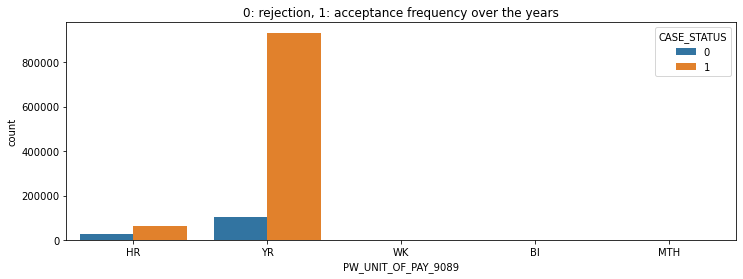

In [192]:
plt.figure(figsize = (12,4))
plt.title("0: rejection, 1: acceptance frequency over the years")
sns.countplot(x = "PW_UNIT_OF_PAY_9089",hue = "CASE_STATUS",data = df)

In [193]:
yrw = len(df[(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")&(df["CASE_STATUS"]==1)])/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR"])
mthw = len(df[(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")&(df["CASE_STATUS"]==1)])/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH"])
biw = len(df[(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")&(df["CASE_STATUS"]==1)])/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI"])
wkw = len(df[(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")&(df["CASE_STATUS"]==1)])/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK"])
hrw = len(df[(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")&(df["CASE_STATUS"]==1)])/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR"])

In [194]:
saw = (yrw+mthw+biw+wkw+hrw)/5

In [195]:
waw = ((len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR"])*yrw)+
(len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH"])*mthw)+
(len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI"])*biw)+
(len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK"])*wkw)+
(len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR"])*hrw))/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"].notna()])

In [196]:
overallw = pd.DataFrame([yrw,mthw,biw,wkw,hrw,saw,waw]).transpose()
overallw.columns = ["YR S%", "MTH S%", "BI S%","WK S%", "HR S%","AVG S%", "WAVG S%"]
overallw

,YR S%,MTH S%,BI S%,WK S%,HR S%,AVG S%,WAVG S%
0,0.908581,0.69516,0.60373,0.532411,0.696136,0.687203,0.891504


<AxesSubplot:xlabel='YEAR', ylabel='count'>

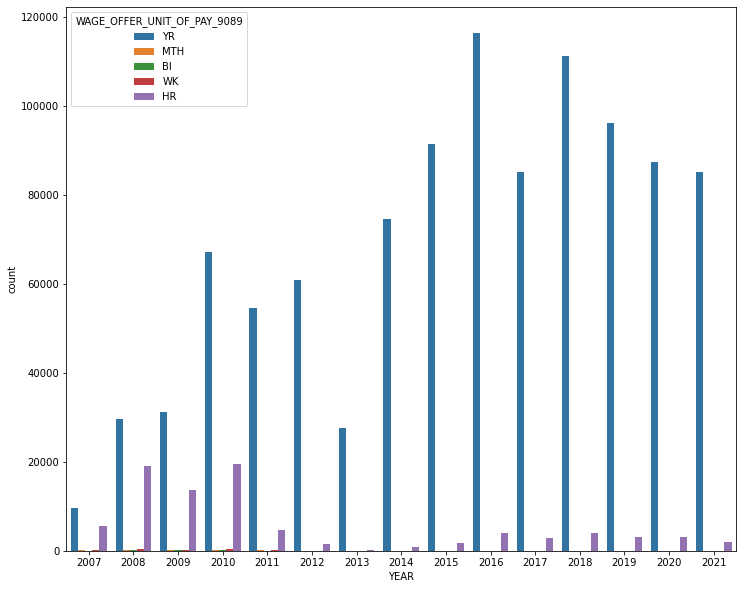

In [197]:
plt.figure(figsize=(12,10))
sns.countplot(x = "YEAR", hue = "WAGE_OFFER_UNIT_OF_PAY_9089",data=df,hue_order=["YR","MTH","BI","WK","HR"])

In [198]:
df.groupby("YEAR")["WAGE_OFFER_UNIT_OF_PAY_9089"].value_counts().groupby(level=0).transform(lambda x: (x / x.sum()).round(2))[:15]

YEAR  WAGE_OFFER_UNIT_OF_PAY_9089
2007  YR                             0.62
      HR                             0.36
      WK                             0.01
      MTH                            0.01
      BI                             0.00
2008  YR                             0.60
      HR                             0.39
      WK                             0.01
      MTH                            0.00
      BI                             0.00
2009  YR                             0.69
      HR                             0.30
      WK                             0.00
      MTH                            0.00
      BI                             0.00
Name: WAGE_OFFER_UNIT_OF_PAY_9089, dtype: float64

In [199]:
df.groupby("YEAR")["WAGE_OFFER_UNIT_OF_PAY_9089"].value_counts().groupby(level=0).transform(lambda x: (x / x.sum()).round(2))[49:]

YEAR  WAGE_OFFER_UNIT_OF_PAY_9089
2017  YR                             0.97
      HR                             0.03
      WK                             0.00
      MTH                            0.00
      BI                             0.00
2018  YR                             0.96
      HR                             0.03
      MTH                            0.00
      WK                             0.00
      BI                             0.00
2019  YR                             0.97
      HR                             0.03
      MTH                            0.00
      WK                             0.00
      BI                             0.00
2020  YR                             0.96
      HR                             0.04
      MTH                            0.00
      WK                             0.00
      BI                             0.00
2021  YR                             0.98
      HR                             0.02
      MTH                            0.00


In [200]:
unitaccept = pd.concat([pd.get_dummies(df.dropna()["WAGE_OFFER_UNIT_OF_PAY_9089"]),df.dropna()["CASE_STATUS"]],axis = 1)

In [201]:
unitaccept.corr()["CASE_STATUS"]

BI            -0.012568
HR            -0.129697
MTH           -0.012988
WK            -0.020451
YR             0.132653
CASE_STATUS    1.000000
Name: CASE_STATUS, dtype: float64

In [202]:
yr07 = df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr08 = df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr09 = df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr10 = df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr11 = df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr12 = df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr13 = df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr14 = df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr15 = df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr16 = df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr17 = df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr18 = df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr19 = df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr20 = df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr21 = df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yrdf = pd.DataFrame([yr07,yr08,yr09,yr10,yr11,yr12,yr13,yr14,yr15,yr16,yr17,yr18,yr19,yr20,yr21])
yrdf.columns = ["YR S%"]

In [203]:
mth07 = df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth08 = df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth09 = df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth10 = df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth11 = df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth12 = df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth13 = df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth14 = df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth15 = df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth16 = df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth17 = df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth18 = df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth19 = df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth20 = df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth21 = df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mthdf = pd.DataFrame([mth07,mth08,mth09,mth10,mth11,mth12,mth13,mth14,mth15,mth16,mth17,mth18,mth19,mth20,mth21])
mthdf.columns = ["MTH S%"]

In [204]:
bi07 = df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi08 = df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi09 = df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi10 = df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi11 = df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi12 = df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi13 = df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi14 = df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi15 = df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi16 = df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi17 = df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi18 = df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi19 = df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi20 = df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi21 = df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bidf = pd.DataFrame([bi07,bi08,bi09,bi10,bi11,bi12,bi13,bi14,bi15,bi16,bi17,bi18,bi19,bi20,bi21])
bidf.columns = ["BI S%"]

C:\Users\Tom Kim\AppData\Local\Temp\ipykernel_8876\546844031.py:8: RuntimeWarning:

invalid value encountered in longlong_scalars



In [205]:
wk07 = df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk08 = df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk09 = df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk10 = df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk11 = df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk12 = df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk13 = df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk14 = df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk15 = df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk16 = df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk17 = df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk18 = df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk19 = df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk20 = df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk21 = df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wkdf = pd.DataFrame([wk07,wk08,wk09,wk10,wk11,wk12,wk13,wk14,wk15,wk16,wk17,wk18,wk19,wk20,wk21])
wkdf.columns = ["WK S%"]

In [206]:
hr07 = df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr08 = df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr09 = df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr10 = df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr11 = df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr12 = df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr13 = df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr14 = df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr15 = df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr16 = df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr17 = df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr18 = df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr19 = df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr20 = df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr21 = df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hrdf = pd.DataFrame([hr07,hr08,hr09,hr10,hr11,hr12,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21])
hrdf.columns = ["HR S%"]

In [207]:
yrunit = pd.concat([yrdf,mthdf,bidf,wkdf,hrdf],axis = 1)
yrunit.index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
yrunit = yrunit.fillna(0)

<AxesSubplot:ylabel='Count'>

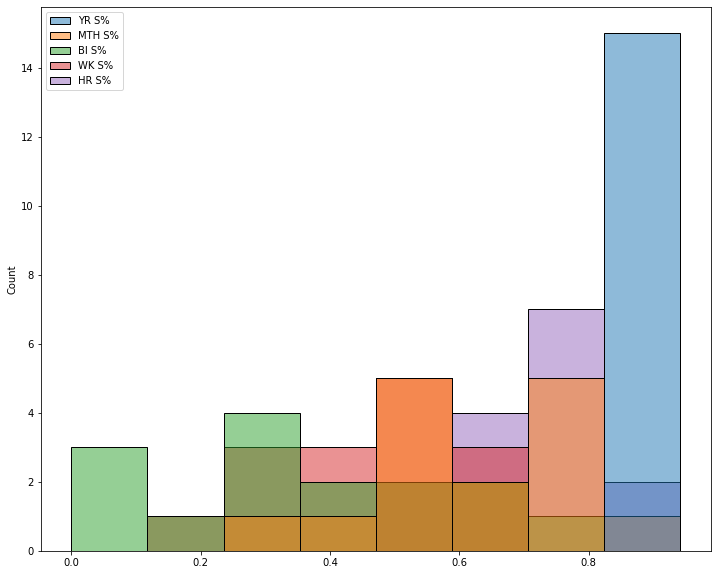

In [208]:
plt.figure(figsize=(12,10))
sns.histplot(data = yrunit)

<AxesSubplot:>

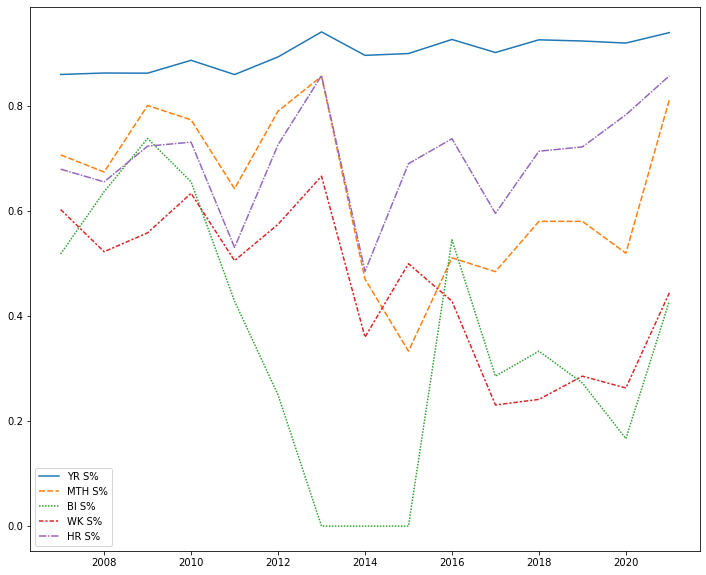

In [209]:
plt.figure(figsize=(12,10))
sns.lineplot(data = yrunit)

In [210]:
print("YR TREND OVER TIME:",st.linregress(yrunit.reset_index()["index"],yrunit.reset_index()["YR S%"]))
print("\nMTH TREND OVER TIME:",st.linregress(yrunit.reset_index()["index"],yrunit.reset_index()["MTH S%"]))
print("\nBI TREND OVER TIME:",st.linregress(yrunit.reset_index()["index"],yrunit.reset_index()["BI S%"]))
print("\nWK TREND OVER TIME:",st.linregress(yrunit.reset_index()["index"],yrunit.reset_index()["WK S%"]))
print("\nHR TREND OVER TIME:",st.linregress(yrunit.reset_index()["index"],yrunit.reset_index()["HR S%"]))

YR TREND OVER TIME: LinregressResult(slope=0.005408008736810405, intercept=-9.99116130352615, rvalue=0.8312567885926347, pvalue=0.00012289377427032933, stderr=0.0010030400685857887, intercept_stderr=2.0201273464418756)

MTH TREND OVER TIME: LinregressResult(slope=-0.012949897436774147, intercept=26.71721131170679, rvalue=-0.3749448967925147, pvalue=0.1685003281597911, stderr=0.008880327960104444, intercept_stderr=17.88502166505929)

BI TREND OVER TIME: LinregressResult(slope=-0.024680403350220037, intercept=50.057089812995606, rvalue=-0.4539713625171599, pvalue=0.08916832646907631, stderr=0.013435002640237854, intercept_stderr=27.058157578220424)

WK TREND OVER TIME: LinregressResult(slope=-0.024604739825939335, intercept=50.00862758625041, rvalue=-0.7462625761485931, pvalue=0.001396728661899928, stderr=0.0060869884049565585, intercept_stderr=12.259222856036539)

HR TREND OVER TIME: LinregressResult(slope=0.0070943226030670695, intercept=-13.58824800744631, rvalue=0.3070789106175573, p

In [211]:
########################################

<AxesSubplot:xlabel='YEAR', ylabel='count'>

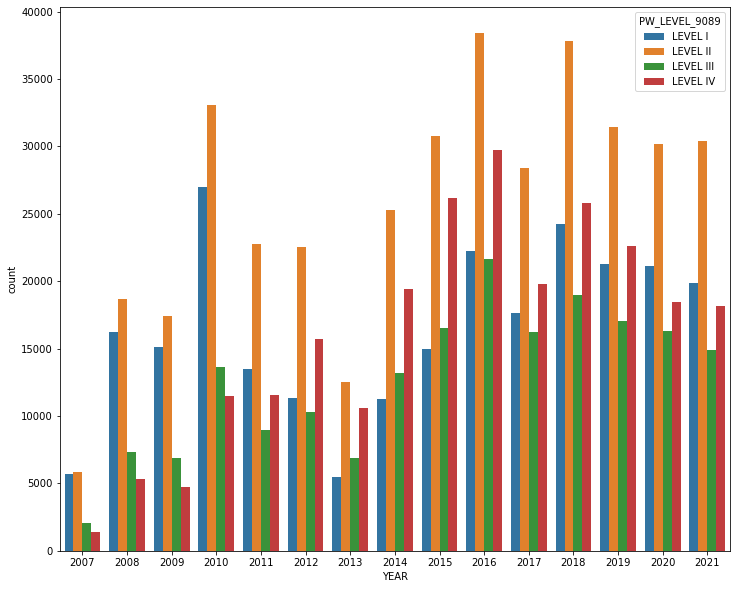

In [212]:
plt.figure(figsize=(12,10))
sns.countplot(x = "YEAR", hue = "PW_LEVEL_9089",data=df,hue_order=["LEVEL I","LEVEL II","LEVEL III","LEVEL IV"])

In [213]:
lo = df[df["PW_LEVEL_9089"] == "LEVEL I"]["CASE_STATUS"].sum()/len(df[df["PW_LEVEL_9089"] == "LEVEL I"])
lt = df[df["PW_LEVEL_9089"] == "LEVEL II"]["CASE_STATUS"].sum()/len(df[df["PW_LEVEL_9089"] == "LEVEL II"])
lth = df[df["PW_LEVEL_9089"] == "LEVEL III"]["CASE_STATUS"].sum()/len(df[df["PW_LEVEL_9089"] == "LEVEL III"])
lf = df[df["PW_LEVEL_9089"] == "LEVEL IV"]["CASE_STATUS"].sum()/len(df[df["PW_LEVEL_9089"] == "LEVEL IV"])

In [214]:
salw =(lo+lt+lth+lf)/4

In [215]:
walw = (len(df[df["PW_LEVEL_9089"] == "LEVEL I"])*lo+
len(df[df["PW_LEVEL_9089"] == "LEVEL II"])*lt+
len(df[df["PW_LEVEL_9089"] == "LEVEL III"])*lth+
len(df[df["PW_LEVEL_9089"] == "LEVEL IV"])*lf)/len(df[df["PW_LEVEL_9089"].notna()])

In [216]:
la = pd.DataFrame([lo,lt,lth,lf,salw,walw]).transpose()
la.columns=["LEVEL I","LEVEL II","LEVEL III","LEVEL IV","AVG","WAVG"]
la

,LEVEL I,LEVEL II,LEVEL III,LEVEL IV,AVG,WAVG
0,0.851781,0.897868,0.891591,0.90157,0.885702,0.886887


In [217]:
lv107 = df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv108 = df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv109 = df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv110 = df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv111 = df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv112 = df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv113 = df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv114 = df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv115 = df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv116 = df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv117 = df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv118 = df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv119 = df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv120 = df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv121 = df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv1df = pd.DataFrame([lv107,lv108,lv109,lv110,lv111,lv112,lv113,lv114,lv115,lv116,lv117,lv118,lv119,lv120,lv121])
lv1df.columns = ["LEVEL I S%"]

In [218]:
lv207 = df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv208 = df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv209 = df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv210 = df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv211 = df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv212 = df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv213 = df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv214 = df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv215 = df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv216 = df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv217 = df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv218 = df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv219 = df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv220 = df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv221 = df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv2df = pd.DataFrame([lv207,lv208,lv209,lv210,lv211,lv212,lv213,lv214,lv215,lv216,lv217,lv218,lv219,lv220,lv221])
lv2df.columns = ["LEVEL II S%"]

In [219]:
lv307 = df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv308 = df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv309 = df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv310 = df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv311 = df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv312 = df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv313 = df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv314 = df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv315 = df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv316 = df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv317 = df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv318 = df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv319 = df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv320 = df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv321 = df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv3df = pd.DataFrame([lv307,lv308,lv309,lv310,lv311,lv312,lv313,lv314,lv315,lv316,lv317,lv318,lv319,lv320,lv321])
lv3df.columns = ["LEVEL III S%"]

In [220]:
lv407 = df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv408 = df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv409 = df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv410 = df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv411 = df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv412 = df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv413 = df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv414 = df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv415 = df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv416 = df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv417 = df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv418 = df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv419 = df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv420 = df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv421 = df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv4df = pd.DataFrame([lv407,lv408,lv409,lv410,lv411,lv412,lv413,lv414,lv415,lv416,lv417,lv418,lv419,lv420,lv421])
lv4df.columns = ["LEVEL IV S%"]

<AxesSubplot:ylabel='Count'>

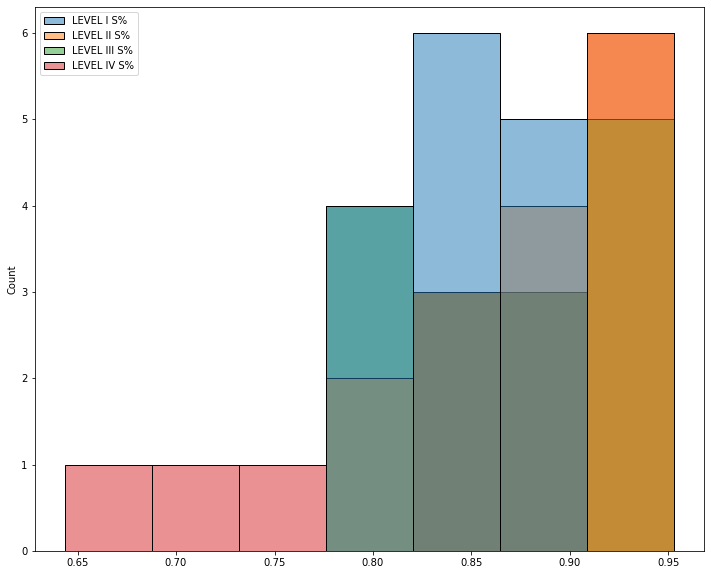

In [221]:
yrlevel = pd.concat([lv1df,lv2df,lv3df,lv4df],axis = 1)
yrlevel.index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
plt.figure(figsize=(12,10))
sns.histplot(data = yrlevel)

<AxesSubplot:>

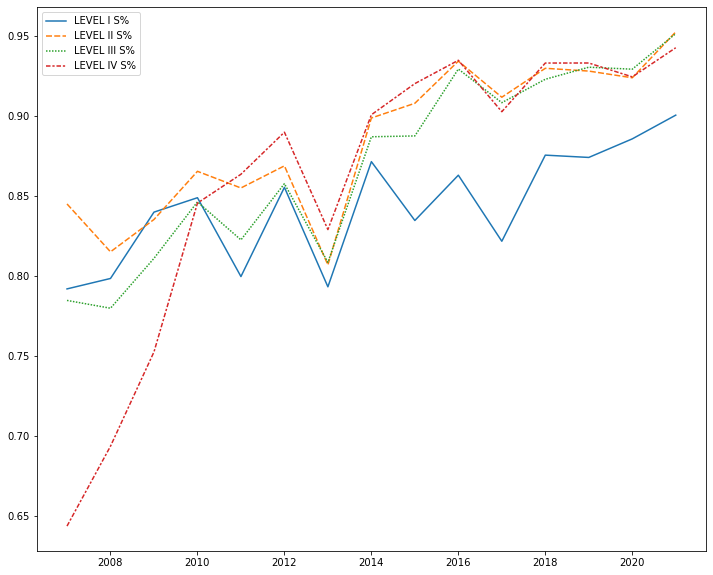

In [222]:
plt.figure(figsize=(12,10))
sns.lineplot(data = yrlevel)

In [223]:
print("LEVEL I TREND OVER TIME:",st.linregress(yrlevel.reset_index()["index"],yrlevel.reset_index()["LEVEL I S%"]))
print("\nLEVEL II TREND OVER TIME:",st.linregress(yrlevel.reset_index()["index"],yrlevel.reset_index()["LEVEL II S%"]))
print("\nLEVEL III TREND OVER TIME:",st.linregress(yrlevel.reset_index()["index"],yrlevel.reset_index()["LEVEL III S%"]))
print("\nLEVEL IV TREND OVER TIME:",st.linregress(yrlevel.reset_index()["index"],yrlevel.reset_index()["LEVEL IV S%"]))

LEVEL I TREND OVER TIME: LinregressResult(slope=0.006018660370735222, intercept=-11.277877565063422, rvalue=0.7493820564606114, pvalue=0.0012994947500441047, stderr=0.0014749363730376238, intercept_stderr=2.9705286904799872)

LEVEL II TREND OVER TIME: LinregressResult(slope=0.009038569533757862, intercept=-17.318310816123166, rvalue=0.8669447846122318, pvalue=2.871076015179721e-05, stderr=0.0014411801673473801, intercept_stderr=2.9025435357860943)

LEVEL III TREND OVER TIME: LinregressResult(slope=0.012321392607399343, intercept=-23.94469953377403, rvalue=0.9420907873382484, pvalue=1.5507414984707764e-07, stderr=0.0012164771544859866, intercept_stderr=2.449990626559659)

LEVEL IV TREND OVER TIME: LinregressResult(slope=0.017976818125738273, intercept=-35.34456244060656, rvalue=0.8588170441396568, pvalue=4.135497166188257e-05, stderr=0.0029740615461053147, intercept_stderr=5.989773736316793)


In [224]:
levelaccept = pd.concat([pd.get_dummies(df.dropna()["PW_LEVEL_9089"]),df.dropna()["CASE_STATUS"]],axis = 1)

In [225]:
levelaccept.corr()["CASE_STATUS"]

LEVEL I       -0.054705
LEVEL II       0.021078
LEVEL III      0.005145
LEVEL IV       0.024808
CASE_STATUS    1.000000
Name: CASE_STATUS, dtype: float64

In [226]:
# PW LEVEL DIST PER STATE
emplevel = pd.DataFrame(df.groupby("EMPLOYER_STATE")["PW_LEVEL_9089"].value_counts())
emplevel.columns = ["Count"]
emplevel = emplevel.reset_index()
joblevel = pd.DataFrame(df.groupby("JOB_INFO_WORK_STATE")["PW_LEVEL_9089"].value_counts())
joblevel.columns = ["Count"]
joblevel = joblevel.reset_index()

In [227]:
# LEVEL 1 Per EMPLOYER STATE
empcho = emplevel[emplevel["PW_LEVEL_9089"]=="LEVEL I"]
empcho.columns = ["State","Level","Count"]
empcho["text"] = empcho["State"].astype(str)+": "+empcho["Count"].astype(str)+" Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = empcho["State"],
           locationmode = "USA-states",
           z = empcho["Count"].astype(float),
           text = empcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Level I Applications by Employer Headquartered States",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [228]:
# LEVEL 1 Per JOB STATE
jobcho = joblevel[joblevel["PW_LEVEL_9089"]=="LEVEL I"]
jobcho.columns = ["State","Level","Count"]
jobcho["text"] = jobcho["State"].astype(str)+": "+jobcho["Count"].astype(str)+" Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = jobcho["State"],
           locationmode = "USA-states",
           z = jobcho["Count"].astype(float),
           text = jobcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Level I Applications in States Worked In",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [229]:
# LEVEL 2 Per EMPLOYER STATE
empcho = emplevel[emplevel["PW_LEVEL_9089"]=="LEVEL II"]
empcho.columns = ["State","Level","Count"]
empcho["text"] = empcho["State"].astype(str)+": "+empcho["Count"].astype(str)+" Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = empcho["State"],
           locationmode = "USA-states",
           z = empcho["Count"].astype(float),
           text = empcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Level II Applications by Employer Headquartered States",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [230]:
# LEVEL 2 Per JOB STATE
jobcho = joblevel[joblevel["PW_LEVEL_9089"]=="LEVEL II"]
jobcho.columns = ["State","Level","Count"]
jobcho["text"] = jobcho["State"].astype(str)+": "+jobcho["Count"].astype(str)+" Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = jobcho["State"],
           locationmode = "USA-states",
           z = jobcho["Count"].astype(float),
           text = jobcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Level II Applications in States Worked In",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [231]:
# LEVEL 3 Per EMPLOYER STATE
empcho = emplevel[emplevel["PW_LEVEL_9089"]=="LEVEL III"]
empcho.columns = ["State","Level","Count"]
empcho["text"] = empcho["State"].astype(str)+": "+empcho["Count"].astype(str)+" Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = empcho["State"],
           locationmode = "USA-states",
           z = empcho["Count"].astype(float),
           text = empcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Level III Applications by Employer Headquartered States",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [232]:
# LEVEL 3 Per JOB STATE
jobcho = joblevel[joblevel["PW_LEVEL_9089"]=="LEVEL III"]
jobcho.columns = ["State","Level","Count"]
jobcho["text"] = jobcho["State"].astype(str)+": "+jobcho["Count"].astype(str)+" Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = jobcho["State"],
           locationmode = "USA-states",
           z = jobcho["Count"].astype(float),
           text = jobcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Level III Applications in States Worked In",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [233]:
# LEVEL 4 Per EMPLOYER STATE
empcho = emplevel[emplevel["PW_LEVEL_9089"]=="LEVEL IV"]
empcho.columns = ["State","Level","Count"]
empcho["text"] = empcho["State"].astype(str)+": "+empcho["Count"].astype(str)+" Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = empcho["State"],
           locationmode = "USA-states",
           z = empcho["Count"].astype(float),
           text = empcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Level IV Applications by Employer Headquartered States",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [234]:
# LEVEL 4 Per JOB STATE
jobcho = joblevel[joblevel["PW_LEVEL_9089"]=="LEVEL IV"]
jobcho.columns = ["State","Level","Count"]
jobcho["text"] = jobcho["State"].astype(str)+": "+jobcho["Count"].astype(str)+" Applications"
# Choropleth Map of EMPLOYER STATE
data = dict(type = "choropleth",
           locations = jobcho["State"],
           locationmode = "USA-states",
           z = jobcho["Count"].astype(float),
           text = jobcho["text"],
           colorbar={"title":"Applications"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(255,255,255)")) )
layout = dict(title = "Level IV Applications in States Worked In",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)"))
choro = go.Figure(data, layout)
iplot(choro)

In [235]:
#####################################

<AxesSubplot:xlabel='DISC_UNIT', ylabel='count'>

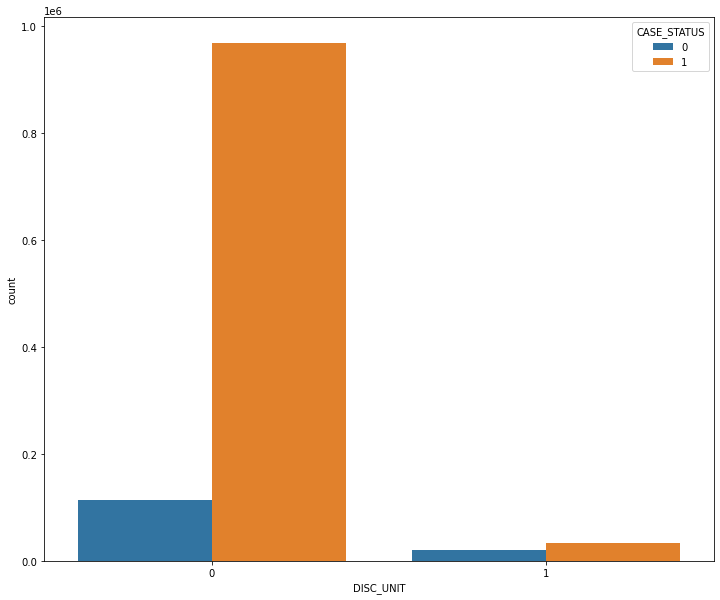

In [236]:
plt.figure(figsize=(12,10))
sns.countplot(x = "DISC_UNIT",data = df, hue = "CASE_STATUS")

In [237]:
st.linregress(x = df["DISC_UNIT"], y = df["CASE_STATUS"])

LinregressResult(slope=-0.266513814519317, intercept=0.8948592556148867, rvalue=-0.1742343947068335, pvalue=0.0, stderr=0.0014144162903232066, intercept_stderr=0.0003049680256417878)

In [238]:
duniy07 = df[(df["YEAR"]==2007)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["DISC_UNIT"]==0)])
duniy08 = df[(df["YEAR"]==2008)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["DISC_UNIT"]==0)])
duniy09 = df[(df["YEAR"]==2009)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["DISC_UNIT"]==0)])
duniy10 = df[(df["YEAR"]==2010)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["DISC_UNIT"]==0)])
duniy11 = df[(df["YEAR"]==2011)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["DISC_UNIT"]==0)])
duniy12 = df[(df["YEAR"]==2012)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["DISC_UNIT"]==0)])
duniy13 = df[(df["YEAR"]==2013)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["DISC_UNIT"]==0)])
duniy14 = df[(df["YEAR"]==2014)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["DISC_UNIT"]==0)])
duniy15 = df[(df["YEAR"]==2015)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["DISC_UNIT"]==0)])
duniy16 = df[(df["YEAR"]==2016)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["DISC_UNIT"]==0)])
duniy17 = df[(df["YEAR"]==2017)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["DISC_UNIT"]==0)])
duniy18 = df[(df["YEAR"]==2018)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["DISC_UNIT"]==0)])
duniy19 = df[(df["YEAR"]==2019)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["DISC_UNIT"]==0)])
duniy20 = df[(df["YEAR"]==2020)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["DISC_UNIT"]==0)])
duniy21 = df[(df["YEAR"]==2021)&(df["DISC_UNIT"]==0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["DISC_UNIT"]==0)])
duniydf = pd.DataFrame([duniy07,duniy08,duniy09,duniy10,duniy11,duniy12,duniy13,duniy14,duniy15,duniy16,duniy17,duniy18,duniy19,duniy20,duniy21])
duniydf.columns = ["No Disc S%"]

In [239]:
dunin07 = df[(df["YEAR"]==2007)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["DISC_UNIT"]==1)])
dunin08 = df[(df["YEAR"]==2008)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["DISC_UNIT"]==1)])
dunin09 = df[(df["YEAR"]==2009)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["DISC_UNIT"]==1)])
dunin10 = df[(df["YEAR"]==2010)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["DISC_UNIT"]==1)])
dunin11 = df[(df["YEAR"]==2011)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["DISC_UNIT"]==1)])
dunin12 = df[(df["YEAR"]==2012)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["DISC_UNIT"]==1)])
dunin13 = df[(df["YEAR"]==2013)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["DISC_UNIT"]==1)])
dunin14 = df[(df["YEAR"]==2014)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["DISC_UNIT"]==1)])
dunin15 = df[(df["YEAR"]==2015)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["DISC_UNIT"]==1)])
dunin16 = df[(df["YEAR"]==2016)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["DISC_UNIT"]==1)])
dunin17 = df[(df["YEAR"]==2017)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["DISC_UNIT"]==1)])
dunin18 = df[(df["YEAR"]==2018)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["DISC_UNIT"]==1)])
dunin19 = df[(df["YEAR"]==2019)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["DISC_UNIT"]==1)])
dunin20 = df[(df["YEAR"]==2020)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["DISC_UNIT"]==1)])
dunin21 = df[(df["YEAR"]==2021)&(df["DISC_UNIT"]==1)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["DISC_UNIT"]==1)])
dunindf = pd.DataFrame([dunin07,dunin08,dunin09,dunin10,dunin11,dunin12,dunin13,dunin14,dunin15,dunin16,dunin17,dunin18,dunin19,dunin20,dunin21])
dunindf.columns = ["Disc S%"]

<AxesSubplot:ylabel='Count'>

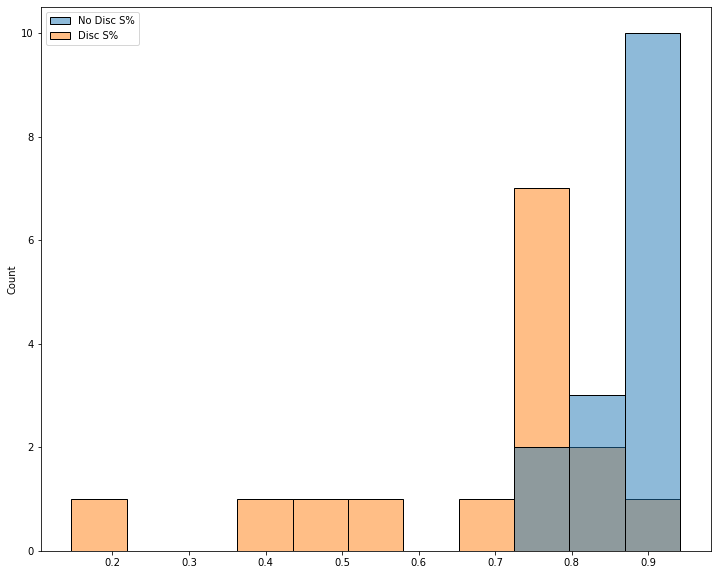

In [240]:
yrdiscunit = pd.concat([duniydf,dunindf],axis = 1)
yrdiscunit.index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
plt.figure(figsize=(12,10))
sns.histplot(data = yrdiscunit)

<AxesSubplot:>

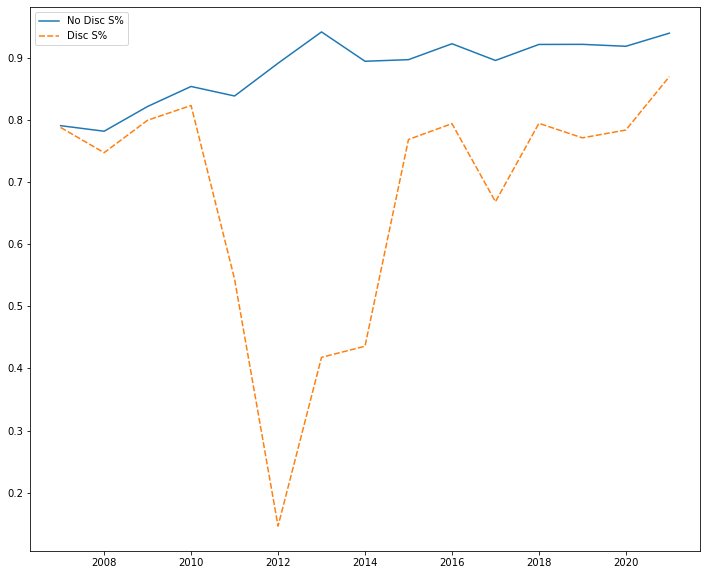

In [241]:
plt.figure(figsize=(12,10))
sns.lineplot(data = yrdiscunit)

In [242]:
print("YES DISC Unit TREND OVER TIME:",st.linregress(yrdiscunit.reset_index()["index"],yrdiscunit.reset_index()["Disc S%"]))
print("\nNO DISC Unit TREND OVER TIME:",st.linregress(yrdiscunit.reset_index()["index"],yrdiscunit.reset_index()["No Disc S%"]))

YES DISC Unit TREND OVER TIME: LinregressResult(slope=0.009120308951390077, intercept=-17.691621980103754, rvalue=0.201932398779099, pvalue=0.47046694070691, stderr=0.012268507450944622, intercept_stderr=24.70883086118648)

NO DISC Unit TREND OVER TIME: LinregressResult(slope=0.010076819462680435, intercept=-19.412886479898344, rvalue=0.8615603984267718, pvalue=3.665562603958043e-05, stderr=0.0016467770628647855, intercept_stderr=3.3166166361397527)


<AxesSubplot:xlabel='YEAR'>

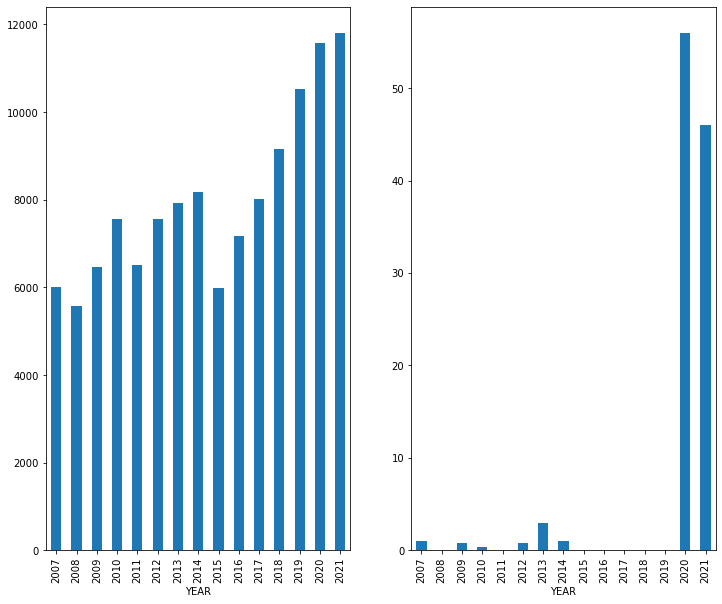

In [243]:
fig,axes = plt.subplots(ncols = 2, figsize = (12,10))
df.groupby("YEAR")["OW-PW"].mean().plot(ax = axes[0],kind = "bar")
df.groupby("YEAR")["OW-PW"].quantile(.5).plot(ax = axes[1],kind = "bar")

In [244]:
st.linregress(x = np.where(df["OW-PW"]> 0, 1, 0),y = df["CASE_STATUS"])

LinregressResult(slope=0.045424520355232555, intercept=0.8605475161011592, rvalue=0.07048089859673656, pvalue=0.0, stderr=0.0006037027583223806, intercept_stderr=0.000419386817115519)

In [245]:
st.linregress(x = df.dropna()["OW-PW"],y = df.dropna()["CASE_STATUS"])

LinregressResult(slope=9.911427439281455e-07, intercept=0.8948784447972404, rvalue=0.06054740233424351, pvalue=0.0, stderr=1.6564020955230506e-08, intercept_stderr=0.0003331545019694207)

In [246]:
wop07 = df[(df["YEAR"]==2007)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["OW-PW"]>0)])
wop08 = df[(df["YEAR"]==2008)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["OW-PW"]>0)])
wop09 = df[(df["YEAR"]==2009)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["OW-PW"]>0)])
wop10 = df[(df["YEAR"]==2010)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["OW-PW"]>0)])
wop11 = df[(df["YEAR"]==2011)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["OW-PW"]>0)])
wop12 = df[(df["YEAR"]==2012)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["OW-PW"]>0)])
wop13 = df[(df["YEAR"]==2013)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["OW-PW"]>0)])
wop14 = df[(df["YEAR"]==2014)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["OW-PW"]>0)])
wop15 = df[(df["YEAR"]==2015)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["OW-PW"]>0)])
wop16 = df[(df["YEAR"]==2016)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["OW-PW"]>0)])
wop17 = df[(df["YEAR"]==2017)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["OW-PW"]>0)])
wop18 = df[(df["YEAR"]==2018)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["OW-PW"]>0)])
wop19 = df[(df["YEAR"]==2019)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["OW-PW"]>0)])
wop20 = df[(df["YEAR"]==2020)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["OW-PW"]>0)])
wop21 = df[(df["YEAR"]==2021)&(df["OW-PW"]>0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["OW-PW"]>0)])
wopdf = pd.DataFrame([wop07,wop08,wop09,wop10,wop11,wop12,wop13,wop14,wop15,wop16,wop17,wop18,wop19,wop20,wop21])
wopdf.columns = ["BigWage S%"]

In [247]:
wup07 = df[(df["YEAR"]==2007)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["OW-PW"]<=0)])
wup08 = df[(df["YEAR"]==2008)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["OW-PW"]<=0)])
wup09 = df[(df["YEAR"]==2009)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["OW-PW"]<=0)])
wup10 = df[(df["YEAR"]==2010)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["OW-PW"]<=0)])
wup11 = df[(df["YEAR"]==2011)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["OW-PW"]<=0)])
wup12 = df[(df["YEAR"]==2012)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["OW-PW"]<=0)])
wup13 = df[(df["YEAR"]==2013)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["OW-PW"]<=0)])
wup14 = df[(df["YEAR"]==2014)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["OW-PW"]<=0)])
wup15 = df[(df["YEAR"]==2015)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["OW-PW"]<=0)])
wup16 = df[(df["YEAR"]==2016)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["OW-PW"]<=0)])
wup17 = df[(df["YEAR"]==2017)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["OW-PW"]<=0)])
wup18 = df[(df["YEAR"]==2018)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["OW-PW"]<=0)])
wup19 = df[(df["YEAR"]==2019)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["OW-PW"]<=0)])
wup20 = df[(df["YEAR"]==2020)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["OW-PW"]<=0)])
wup21 = df[(df["YEAR"]==2021)&(df["OW-PW"]<=0)]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["OW-PW"]<=0)])
wupdf = pd.DataFrame([wup07,wup08,wup09,wup10,wup11,wup12,wup13,wup14,wup15,wup16,wup17,wup18,wup19,wup20,wup21])
wupdf.columns = ["SmallWage S%"]

<AxesSubplot:ylabel='Count'>

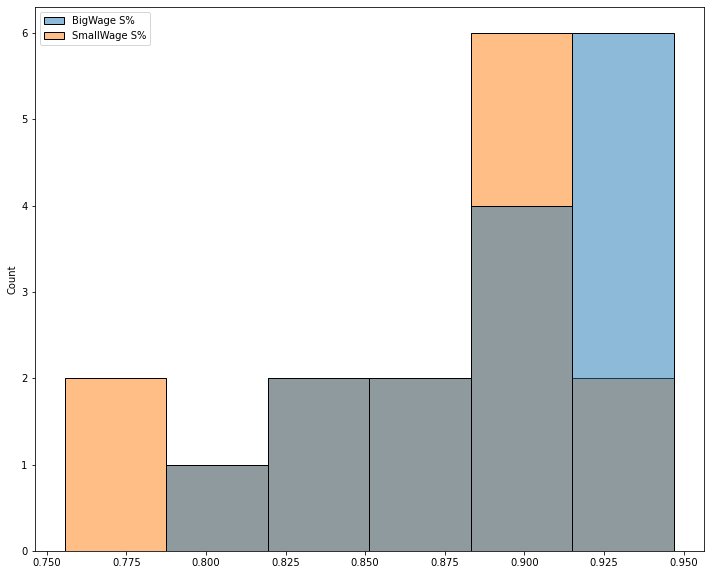

In [248]:
yrwage = pd.concat([wopdf,wupdf],axis = 1)
yrwage.index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
plt.figure(figsize=(12,10))
sns.histplot(data = yrwage)

<AxesSubplot:>

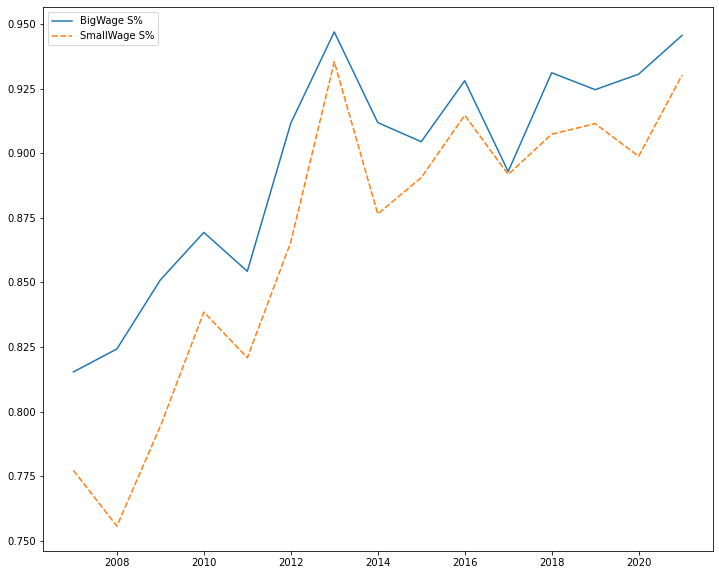

In [249]:
plt.figure(figsize=(12,10))
sns.lineplot(data = yrwage)

In [250]:
print("BIG WAGE:",st.linregress(yrwage.reset_index()["index"],yrwage.reset_index()["BigWage S%"]))
print("\nSMALL WAGE:",st.linregress(yrwage.reset_index()["index"],yrwage.reset_index()["SmallWage S%"]))

BIG WAGE: LinregressResult(slope=0.008110440791059215, intercept=-15.438306798513743, rvalue=0.8412172974658417, pvalue=8.487912467846141e-05, stderr=0.0014458349065037547, intercept_stderr=2.911918202018126)

SMALL WAGE: LinregressResult(slope=0.010915223678809441, intercept=-21.115994498983106, rvalue=0.8565259423839935, pvalue=4.565173981406338e-05, stderr=0.0018241378039830594, intercept_stderr=3.6738219906809593)


<AxesSubplot:>

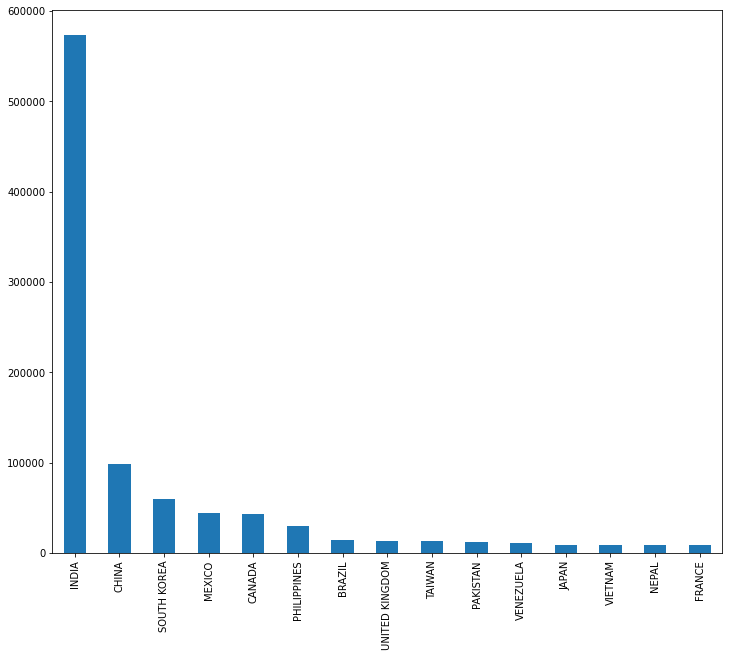

In [251]:
plt.figure(figsize = (12,10))
df["COUNTRY_OF_CITZENSHIP"].value_counts().nlargest(15).plot(kind = "bar")

In [252]:
# TOP 15 Countries per year

In [253]:
def grab (year):
    return df[df["YEAR"]==year]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]
top15c = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [254]:
len(top15c)

24

In [255]:
def grab (year):
    return df[df["YEAR"]==year]["COUNTRY_OF_CITZENSHIP"].value_counts()[:10]
top10c = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [256]:
len(top10c)

15

In [257]:
def grab (year):
    return df[df["YEAR"]==year]["COUNTRY_OF_CITZENSHIP"].value_counts()[:5]
top5c = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [258]:
len(top5c)

6

In [259]:
# Top 15 Application and success countries

In [260]:
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:5]
top5ac = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [261]:
len(top5ac)

6

In [262]:
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:10]
top10ac = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [263]:
len(top10ac)

15

In [264]:
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]
top15ac = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [265]:
len(top15ac)

23

In [266]:
#top apply v top accept
apacc = pd.DataFrame([df["COUNTRY_OF_CITZENSHIP"].value_counts().nlargest(15).index,df[df["CASE_STATUS"]==1]["COUNTRY_OF_CITZENSHIP"].value_counts().nlargest(15).index]).transpose()
apacc.columns = ["APPLY","ACCEPT"]
apacc

,APPLY,ACCEPT
0,INDIA,INDIA
1,CHINA,CHINA
2,SOUTH KOREA,SOUTH KOREA
3,MEXICO,CANADA
4,CANADA,MEXICO
5,PHILIPPINES,PHILIPPINES
6,BRAZIL,TAIWAN
7,UNITED KINGDOM,BRAZIL
8,TAIWAN,UNITED KINGDOM
9,PAKISTAN,PAKISTAN


In [267]:
# Clean Up the top 15 country table for Applications: Only Numbers
def clen (year):
    return pd.DataFrame(top15c[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
top15acountry = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
top15acountry

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4687.0,15573.0,16750.0,37084.0,30461.0,36719.0,23032.0,42093.0,53118.0,66299.0,46434.0,58323.0,51201.0,45370.0,45855.0
1,1316.0,5213.0,3071.0,5372.0,3382.0,3957.0,2315.0,5605.0,7786.0,10451.0,8095.0,12427.0,11306.0,11679.0,10550.0
2,1189.0,2948.0,2871.0,5137.0,3274.0,3449.0,1723.0,3459.0,7176.0,9075.0,5582.0,4945.0,3694.0,3798.0,4162.0
3,1048.0,2869.0,2569.0,4788.0,2892.0,3051.0,1619.0,3417.0,3189.0,3985.0,2966.0,4529.0,3424.0,2870.0,2551.0
4,967.0,2853.0,2250.0,4107.0,2475.0,2005.0,1211.0,1871.0,2052.0,2750.0,2467.0,3963.0,3022.0,2718.0,2464.0
5,715.0,2241.0,2229.0,4038.0,2151.0,1912.0,1029.0,1658.0,2049.0,2123.0,1847.0,1770.0,1753.0,1859.0,1904.0
6,287.0,1315.0,904.0,1453.0,876.0,914.0,530.0,1076.0,1080.0,1418.0,1311.0,1768.0,1750.0,1698.0,1867.0
7,282.0,819.0,826.0,1408.0,845.0,884.0,464.0,989.0,1011.0,1336.0,1118.0,1687.0,1444.0,1096.0,882.0
8,270.0,805.0,696.0,1359.0,803.0,811.0,456.0,823.0,791.0,1210.0,976.0,1303.0,1250.0,1065.0,808.0
9,253.0,801.0,693.0,1309.0,780.0,687.0,331.0,715.0,756.0,1125.0,943.0,1273.0,953.0,933.0,791.0


In [268]:
# Graph of the Freq of top 15 Job Codes over the years: apps
top15acountry.transpose().iplot()

In [269]:
# Clean Up the top 15 country table for Applications: Only Name
def clen (year):
    return pd.DataFrame(pd.DataFrame(top15c[year].sort_values(ascending = False).dropna()).reset_index().drop(year,axis = 1))
top15cname = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
top15cname.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15cname

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA
1,MEXICO,MEXICO,SOUTH KOREA,SOUTH KOREA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA
2,SOUTH KOREA,CHINA,CHINA,MEXICO,SOUTH KOREA,SOUTH KOREA,CANADA,CANADA,SOUTH KOREA,SOUTH KOREA,SOUTH KOREA,SOUTH KOREA,MEXICO,MEXICO,MEXICO
3,CHINA,SOUTH KOREA,PHILIPPINES,CHINA,CANADA,CANADA,SOUTH KOREA,SOUTH KOREA,CANADA,CANADA,CANADA,MEXICO,SOUTH KOREA,SOUTH KOREA,CANADA
4,PHILIPPINES,PHILIPPINES,CANADA,CANADA,MEXICO,PHILIPPINES,MEXICO,PHILIPPINES,MEXICO,MEXICO,MEXICO,CANADA,CANADA,CANADA,SOUTH KOREA
5,CANADA,CANADA,MEXICO,PHILIPPINES,PHILIPPINES,MEXICO,PHILIPPINES,MEXICO,PHILIPPINES,PHILIPPINES,VIETNAM,PHILIPPINES,PHILIPPINES,BRAZIL,PHILIPPINES
6,UNITED KINGDOM,ECUADOR,UNITED KINGDOM,UNITED KINGDOM,TAIWAN,TAIWAN,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,VIETNAM,PHILIPPINES,VIETNAM,BRAZIL,PHILIPPINES,BRAZIL
7,BRAZIL,UNITED KINGDOM,TAIWAN,TAIWAN,JAPAN,UNITED KINGDOM,PAKISTAN,TAIWAN,TAIWAN,UNITED KINGDOM,BRAZIL,BRAZIL,VIETNAM,VENEZUELA,TAIWAN
8,TAIWAN,BRAZIL,ECUADOR,PAKISTAN,PAKISTAN,PAKISTAN,TAIWAN,PAKISTAN,PAKISTAN,TAIWAN,TAIWAN,VENEZUELA,VENEZUELA,VIETNAM,VENEZUELA
9,PAKISTAN,PAKISTAN,BRAZIL,ECUADOR,UNITED KINGDOM,JAPAN,JAPAN,FRANCE,FRANCE,PAKISTAN,PAKISTAN,TAIWAN,TAIWAN,TAIWAN,UNITED KINGDOM


In [270]:
# Clean Up the top 15 country table for Success: Only Numbers
def clen (year):
    return pd.DataFrame(top15ac[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
top15scountry = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)

top15scountry

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4006.0,13545.0,14516.0,33118.0,26838.0,31568.0,18690.0,38392.0,49051.0,63106.0,43134.0,55654.0,49132.0,42974.0,44232.0
1,938.0,2667.0,2514.0,4629.0,2920.0,3541.0,1935.0,5107.0,6927.0,9710.0,7475.0,11777.0,10693.0,11079.0,10053.0
2,861.0,2535.0,2485.0,4235.0,2495.0,2660.0,1412.0,3136.0,5884.0,7445.0,4412.0,4303.0,3102.0,3115.0,3680.0
3,783.0,2337.0,2072.0,3594.0,2437.0,2625.0,1094.0,2826.0,2862.0,3659.0,2681.0,3726.0,2835.0,2529.0,2401.0
4,657.0,2255.0,1924.0,3379.0,1429.0,1505.0,707.0,1471.0,1622.0,2181.0,1877.0,3719.0,2788.0,2516.0,2262.0
5,607.0,1873.0,1183.0,3264.0,1358.0,1175.0,697.0,1254.0,1591.0,1708.0,1043.0,1471.0,1521.0,1550.0,1697.0
6,242.0,712.0,769.0,1271.0,736.0,791.0,408.0,940.0,948.0,1217.0,973.0,1442.0,1501.0,1444.0,1586.0
7,234.0,675.0,742.0,1254.0,688.0,732.0,371.0,886.0,900.0,1176.0,963.0,1186.0,936.0,910.0,854.0
8,229.0,653.0,565.0,1165.0,646.0,639.0,368.0,722.0,694.0,1103.0,888.0,1159.0,890.0,875.0,722.0
9,214.0,619.0,515.0,1006.0,621.0,555.0,260.0,650.0,676.0,993.0,823.0,1137.0,866.0,769.0,697.0


In [271]:
# Graph of the Freq of top 15 Job Codes over the years: success
top15scountry.transpose().iplot()

In [272]:
# Clean Up the top 15 country table for Success: Only Name
def clen (year):
    return pd.DataFrame(pd.DataFrame(top15ac[year].sort_values(ascending = False).dropna()).reset_index().drop(year,axis = 1))
top15acname = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
top15acname.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15acname

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA,INDIA
1,CHINA,MEXICO,SOUTH KOREA,SOUTH KOREA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA,CHINA
2,SOUTH KOREA,CHINA,CHINA,CHINA,SOUTH KOREA,SOUTH KOREA,CANADA,CANADA,SOUTH KOREA,SOUTH KOREA,SOUTH KOREA,SOUTH KOREA,MEXICO,MEXICO,MEXICO
3,PHILIPPINES,SOUTH KOREA,PHILIPPINES,CANADA,CANADA,CANADA,SOUTH KOREA,SOUTH KOREA,CANADA,CANADA,CANADA,MEXICO,CANADA,CANADA,CANADA
4,MEXICO,PHILIPPINES,CANADA,PHILIPPINES,MEXICO,PHILIPPINES,PHILIPPINES,PHILIPPINES,PHILIPPINES,MEXICO,MEXICO,CANADA,SOUTH KOREA,SOUTH KOREA,SOUTH KOREA
5,CANADA,CANADA,MEXICO,MEXICO,PHILIPPINES,MEXICO,MEXICO,MEXICO,MEXICO,PHILIPPINES,PHILIPPINES,BRAZIL,PHILIPPINES,BRAZIL,BRAZIL
6,UNITED KINGDOM,ECUADOR,UNITED KINGDOM,TAIWAN,TAIWAN,TAIWAN,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,BRAZIL,PHILIPPINES,BRAZIL,PHILIPPINES,PHILIPPINES
7,TAIWAN,UNITED KINGDOM,TAIWAN,UNITED KINGDOM,JAPAN,UNITED KINGDOM,PAKISTAN,TAIWAN,TAIWAN,VIETNAM,VIETNAM,TAIWAN,VIETNAM,VIETNAM,TAIWAN
8,BRAZIL,PAKISTAN,PAKISTAN,PAKISTAN,PAKISTAN,PAKISTAN,TAIWAN,PAKISTAN,PAKISTAN,TAIWAN,TAIWAN,VIETNAM,TAIWAN,TAIWAN,UNITED KINGDOM
9,PAKISTAN,TAIWAN,JAPAN,JAPAN,UNITED KINGDOM,JAPAN,NEPAL,FRANCE,FRANCE,PAKISTAN,PAKISTAN,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,PAKISTAN


In [273]:
# Merging the Name with the Count: Success Top 15
def merge(year):
    return top15acname[year].str.cat(top15scountry[year].astype(str), sep = ", ")
top15csmerge = pd.concat([merge(2007),merge(2008),merge(2009),merge(2010),
             merge(2011),merge(2012),merge(2013),merge(2014),merge(2015),
             merge(2016),merge(2017),merge(2018),merge(2019),merge(2020),
             merge(2021)],axis = 1)
top15csmerge.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15csmerge

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"INDIA, 4006.0","INDIA, 13545.0","INDIA, 14516.0","INDIA, 33118.0","INDIA, 26838.0","INDIA, 31568.0","INDIA, 18690.0","INDIA, 38392.0","INDIA, 49051.0","INDIA, 63106.0","INDIA, 43134.0","INDIA, 55654.0","INDIA, 49132.0","INDIA, 42974.0","INDIA, 44232.0"
1,"CHINA, 938.0","MEXICO, 2667.0","SOUTH KOREA, 2514.0","SOUTH KOREA, 4629.0","CHINA, 2920.0","CHINA, 3541.0","CHINA, 1935.0","CHINA, 5107.0","CHINA, 6927.0","CHINA, 9710.0","CHINA, 7475.0","CHINA, 11777.0","CHINA, 10693.0","CHINA, 11079.0","CHINA, 10053.0"
2,"SOUTH KOREA, 861.0","CHINA, 2535.0","CHINA, 2485.0","CHINA, 4235.0","SOUTH KOREA, 2495.0","SOUTH KOREA, 2660.0","CANADA, 1412.0","CANADA, 3136.0","SOUTH KOREA, 5884.0","SOUTH KOREA, 7445.0","SOUTH KOREA, 4412.0","SOUTH KOREA, 4303.0","MEXICO, 3102.0","MEXICO, 3115.0","MEXICO, 3680.0"
3,"PHILIPPINES, 783.0","SOUTH KOREA, 2337.0","PHILIPPINES, 2072.0","CANADA, 3594.0","CANADA, 2437.0","CANADA, 2625.0","SOUTH KOREA, 1094.0","SOUTH KOREA, 2826.0","CANADA, 2862.0","CANADA, 3659.0","CANADA, 2681.0","MEXICO, 3726.0","CANADA, 2835.0","CANADA, 2529.0","CANADA, 2401.0"
4,"MEXICO, 657.0","PHILIPPINES, 2255.0","CANADA, 1924.0","PHILIPPINES, 3379.0","MEXICO, 1429.0","PHILIPPINES, 1505.0","PHILIPPINES, 707.0","PHILIPPINES, 1471.0","PHILIPPINES, 1622.0","MEXICO, 2181.0","MEXICO, 1877.0","CANADA, 3719.0","SOUTH KOREA, 2788.0","SOUTH KOREA, 2516.0","SOUTH KOREA, 2262.0"
5,"CANADA, 607.0","CANADA, 1873.0","MEXICO, 1183.0","MEXICO, 3264.0","PHILIPPINES, 1358.0","MEXICO, 1175.0","MEXICO, 697.0","MEXICO, 1254.0","MEXICO, 1591.0","PHILIPPINES, 1708.0","PHILIPPINES, 1043.0","BRAZIL, 1471.0","PHILIPPINES, 1521.0","BRAZIL, 1550.0","BRAZIL, 1697.0"
6,"UNITED KINGDOM, 242.0","ECUADOR, 712.0","UNITED KINGDOM, 769.0","TAIWAN, 1271.0","TAIWAN, 736.0","TAIWAN, 791.0","UNITED KINGDOM, 408.0","UNITED KINGDOM, 940.0","UNITED KINGDOM, 948.0","UNITED KINGDOM, 1217.0","BRAZIL, 973.0","PHILIPPINES, 1442.0","BRAZIL, 1501.0","PHILIPPINES, 1444.0","PHILIPPINES, 1586.0"
7,"TAIWAN, 234.0","UNITED KINGDOM, 675.0","TAIWAN, 742.0","UNITED KINGDOM, 1254.0","JAPAN, 688.0","UNITED KINGDOM, 732.0","PAKISTAN, 371.0","TAIWAN, 886.0","TAIWAN, 900.0","VIETNAM, 1176.0","VIETNAM, 963.0","TAIWAN, 1186.0","VIETNAM, 936.0","VIETNAM, 910.0","TAIWAN, 854.0"
8,"BRAZIL, 229.0","PAKISTAN, 653.0","PAKISTAN, 565.0","PAKISTAN, 1165.0","PAKISTAN, 646.0","PAKISTAN, 639.0","TAIWAN, 368.0","PAKISTAN, 722.0","PAKISTAN, 694.0","TAIWAN, 1103.0","TAIWAN, 888.0","VIETNAM, 1159.0","TAIWAN, 890.0","TAIWAN, 875.0","UNITED KINGDOM, 722.0"
9,"PAKISTAN, 214.0","TAIWAN, 619.0","JAPAN, 515.0","JAPAN, 1006.0","UNITED KINGDOM, 621.0","JAPAN, 555.0","NEPAL, 260.0","FRANCE, 650.0","FRANCE, 676.0","PAKISTAN, 993.0","PAKISTAN, 823.0","UNITED KINGDOM, 1137.0","UNITED KINGDOM, 866.0","UNITED KINGDOM, 769.0","PAKISTAN, 697.0"


In [274]:
# Merging the Name with the Count: Applications Top 15
def merge(year):
    return top15cname[year].str.cat(top15acountry[year].astype(str), sep = ", ")
top15camerge = pd.concat([merge(2007),merge(2008),merge(2009),merge(2010),
             merge(2011),merge(2012),merge(2013),merge(2014),merge(2015),
             merge(2016),merge(2017),merge(2018),merge(2019),merge(2020),
             merge(2021)],axis = 1)
top15camerge.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
top15camerge

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"INDIA, 4687.0","INDIA, 15573.0","INDIA, 16750.0","INDIA, 37084.0","INDIA, 30461.0","INDIA, 36719.0","INDIA, 23032.0","INDIA, 42093.0","INDIA, 53118.0","INDIA, 66299.0","INDIA, 46434.0","INDIA, 58323.0","INDIA, 51201.0","INDIA, 45370.0","INDIA, 45855.0"
1,"MEXICO, 1316.0","MEXICO, 5213.0","SOUTH KOREA, 3071.0","SOUTH KOREA, 5372.0","CHINA, 3382.0","CHINA, 3957.0","CHINA, 2315.0","CHINA, 5605.0","CHINA, 7786.0","CHINA, 10451.0","CHINA, 8095.0","CHINA, 12427.0","CHINA, 11306.0","CHINA, 11679.0","CHINA, 10550.0"
2,"SOUTH KOREA, 1189.0","CHINA, 2948.0","CHINA, 2871.0","MEXICO, 5137.0","SOUTH KOREA, 3274.0","SOUTH KOREA, 3449.0","CANADA, 1723.0","CANADA, 3459.0","SOUTH KOREA, 7176.0","SOUTH KOREA, 9075.0","SOUTH KOREA, 5582.0","SOUTH KOREA, 4945.0","MEXICO, 3694.0","MEXICO, 3798.0","MEXICO, 4162.0"
3,"CHINA, 1048.0","SOUTH KOREA, 2869.0","PHILIPPINES, 2569.0","CHINA, 4788.0","CANADA, 2892.0","CANADA, 3051.0","SOUTH KOREA, 1619.0","SOUTH KOREA, 3417.0","CANADA, 3189.0","CANADA, 3985.0","CANADA, 2966.0","MEXICO, 4529.0","SOUTH KOREA, 3424.0","SOUTH KOREA, 2870.0","CANADA, 2551.0"
4,"PHILIPPINES, 967.0","PHILIPPINES, 2853.0","CANADA, 2250.0","CANADA, 4107.0","MEXICO, 2475.0","PHILIPPINES, 2005.0","MEXICO, 1211.0","PHILIPPINES, 1871.0","MEXICO, 2052.0","MEXICO, 2750.0","MEXICO, 2467.0","CANADA, 3963.0","CANADA, 3022.0","CANADA, 2718.0","SOUTH KOREA, 2464.0"
5,"CANADA, 715.0","CANADA, 2241.0","MEXICO, 2229.0","PHILIPPINES, 4038.0","PHILIPPINES, 2151.0","MEXICO, 1912.0","PHILIPPINES, 1029.0","MEXICO, 1658.0","PHILIPPINES, 2049.0","PHILIPPINES, 2123.0","VIETNAM, 1847.0","PHILIPPINES, 1770.0","PHILIPPINES, 1753.0","BRAZIL, 1859.0","PHILIPPINES, 1904.0"
6,"UNITED KINGDOM, 287.0","ECUADOR, 1315.0","UNITED KINGDOM, 904.0","UNITED KINGDOM, 1453.0","TAIWAN, 876.0","TAIWAN, 914.0","UNITED KINGDOM, 530.0","UNITED KINGDOM, 1076.0","UNITED KINGDOM, 1080.0","VIETNAM, 1418.0","PHILIPPINES, 1311.0","VIETNAM, 1768.0","BRAZIL, 1750.0","PHILIPPINES, 1698.0","BRAZIL, 1867.0"
7,"BRAZIL, 282.0","UNITED KINGDOM, 819.0","TAIWAN, 826.0","TAIWAN, 1408.0","JAPAN, 845.0","UNITED KINGDOM, 884.0","PAKISTAN, 464.0","TAIWAN, 989.0","TAIWAN, 1011.0","UNITED KINGDOM, 1336.0","BRAZIL, 1118.0","BRAZIL, 1687.0","VIETNAM, 1444.0","VENEZUELA, 1096.0","TAIWAN, 882.0"
8,"TAIWAN, 270.0","BRAZIL, 805.0","ECUADOR, 696.0","PAKISTAN, 1359.0","PAKISTAN, 803.0","PAKISTAN, 811.0","TAIWAN, 456.0","PAKISTAN, 823.0","PAKISTAN, 791.0","TAIWAN, 1210.0","TAIWAN, 976.0","VENEZUELA, 1303.0","VENEZUELA, 1250.0","VIETNAM, 1065.0","VENEZUELA, 808.0"
9,"PAKISTAN, 253.0","PAKISTAN, 801.0","BRAZIL, 693.0","ECUADOR, 1309.0","UNITED KINGDOM, 780.0","JAPAN, 687.0","JAPAN, 331.0","FRANCE, 715.0","FRANCE, 756.0","PAKISTAN, 1125.0","PAKISTAN, 943.0","TAIWAN, 1273.0","TAIWAN, 953.0","TAIWAN, 933.0","UNITED KINGDOM, 791.0"


In [275]:
# Merging the Success v Application
def mergy (year):
    return pd.concat([top15camerge[year],top15csmerge[year]],axis = 1)
mergec = pd.concat([mergy(2007),mergy(2008),mergy(2009),mergy(2010),mergy(2011),mergy(2012),
           mergy(2013),mergy(2014),mergy(2015),mergy(2016),mergy(2017),mergy(2018),
           mergy(2019),mergy(2020),mergy(2021)],axis = 1)
mergec.columns = ["2007A","2007S","2008A","2008S","2009A","2009S","2010A","2010S",
                  "2011A","2011S","2012A","2012S","2013A","2013S","2014A","2014S",
                  "2015A","2015S","2016A","2016S","2017A","2017S","2018A","2018S",
                  "2019A","2019S","2020A","2020S","2021A","2021S"]
mergec

,2007A,2007S,2008A,2008S,2009A,2009S,2010A,2010S,2011A,2011S,...,2017A,2017S,2018A,2018S,2019A,2019S,2020A,2020S,2021A,2021S
0,"INDIA, 4687.0","INDIA, 4006.0","INDIA, 15573.0","INDIA, 13545.0","INDIA, 16750.0","INDIA, 14516.0","INDIA, 37084.0","INDIA, 33118.0","INDIA, 30461.0","INDIA, 26838.0",...,"INDIA, 46434.0","INDIA, 43134.0","INDIA, 58323.0","INDIA, 55654.0","INDIA, 51201.0","INDIA, 49132.0","INDIA, 45370.0","INDIA, 42974.0","INDIA, 45855.0","INDIA, 44232.0"
1,"MEXICO, 1316.0","CHINA, 938.0","MEXICO, 5213.0","MEXICO, 2667.0","SOUTH KOREA, 3071.0","SOUTH KOREA, 2514.0","SOUTH KOREA, 5372.0","SOUTH KOREA, 4629.0","CHINA, 3382.0","CHINA, 2920.0",...,"CHINA, 8095.0","CHINA, 7475.0","CHINA, 12427.0","CHINA, 11777.0","CHINA, 11306.0","CHINA, 10693.0","CHINA, 11679.0","CHINA, 11079.0","CHINA, 10550.0","CHINA, 10053.0"
2,"SOUTH KOREA, 1189.0","SOUTH KOREA, 861.0","CHINA, 2948.0","CHINA, 2535.0","CHINA, 2871.0","CHINA, 2485.0","MEXICO, 5137.0","CHINA, 4235.0","SOUTH KOREA, 3274.0","SOUTH KOREA, 2495.0",...,"SOUTH KOREA, 5582.0","SOUTH KOREA, 4412.0","SOUTH KOREA, 4945.0","SOUTH KOREA, 4303.0","MEXICO, 3694.0","MEXICO, 3102.0","MEXICO, 3798.0","MEXICO, 3115.0","MEXICO, 4162.0","MEXICO, 3680.0"
3,"CHINA, 1048.0","PHILIPPINES, 783.0","SOUTH KOREA, 2869.0","SOUTH KOREA, 2337.0","PHILIPPINES, 2569.0","PHILIPPINES, 2072.0","CHINA, 4788.0","CANADA, 3594.0","CANADA, 2892.0","CANADA, 2437.0",...,"CANADA, 2966.0","CANADA, 2681.0","MEXICO, 4529.0","MEXICO, 3726.0","SOUTH KOREA, 3424.0","CANADA, 2835.0","SOUTH KOREA, 2870.0","CANADA, 2529.0","CANADA, 2551.0","CANADA, 2401.0"
4,"PHILIPPINES, 967.0","MEXICO, 657.0","PHILIPPINES, 2853.0","PHILIPPINES, 2255.0","CANADA, 2250.0","CANADA, 1924.0","CANADA, 4107.0","PHILIPPINES, 3379.0","MEXICO, 2475.0","MEXICO, 1429.0",...,"MEXICO, 2467.0","MEXICO, 1877.0","CANADA, 3963.0","CANADA, 3719.0","CANADA, 3022.0","SOUTH KOREA, 2788.0","CANADA, 2718.0","SOUTH KOREA, 2516.0","SOUTH KOREA, 2464.0","SOUTH KOREA, 2262.0"
5,"CANADA, 715.0","CANADA, 607.0","CANADA, 2241.0","CANADA, 1873.0","MEXICO, 2229.0","MEXICO, 1183.0","PHILIPPINES, 4038.0","MEXICO, 3264.0","PHILIPPINES, 2151.0","PHILIPPINES, 1358.0",...,"VIETNAM, 1847.0","PHILIPPINES, 1043.0","PHILIPPINES, 1770.0","BRAZIL, 1471.0","PHILIPPINES, 1753.0","PHILIPPINES, 1521.0","BRAZIL, 1859.0","BRAZIL, 1550.0","PHILIPPINES, 1904.0","BRAZIL, 1697.0"
6,"UNITED KINGDOM, 287.0","UNITED KINGDOM, 242.0","ECUADOR, 1315.0","ECUADOR, 712.0","UNITED KINGDOM, 904.0","UNITED KINGDOM, 769.0","UNITED KINGDOM, 1453.0","TAIWAN, 1271.0","TAIWAN, 876.0","TAIWAN, 736.0",...,"PHILIPPINES, 1311.0","BRAZIL, 973.0","VIETNAM, 1768.0","PHILIPPINES, 1442.0","BRAZIL, 1750.0","BRAZIL, 1501.0","PHILIPPINES, 1698.0","PHILIPPINES, 1444.0","BRAZIL, 1867.0","PHILIPPINES, 1586.0"
7,"BRAZIL, 282.0","TAIWAN, 234.0","UNITED KINGDOM, 819.0","UNITED KINGDOM, 675.0","TAIWAN, 826.0","TAIWAN, 742.0","TAIWAN, 1408.0","UNITED KINGDOM, 1254.0","JAPAN, 845.0","JAPAN, 688.0",...,"BRAZIL, 1118.0","VIETNAM, 963.0","BRAZIL, 1687.0","TAIWAN, 1186.0","VIETNAM, 1444.0","VIETNAM, 936.0","VENEZUELA, 1096.0","VIETNAM, 910.0","TAIWAN, 882.0","TAIWAN, 854.0"
8,"TAIWAN, 270.0","BRAZIL, 229.0","BRAZIL, 805.0","PAKISTAN, 653.0","ECUADOR, 696.0","PAKISTAN, 565.0","PAKISTAN, 1359.0","PAKISTAN, 1165.0","PAKISTAN, 803.0","PAKISTAN, 646.0",...,"TAIWAN, 976.0","TAIWAN, 888.0","VENEZUELA, 1303.0","VIETNAM, 1159.0","VENEZUELA, 1250.0","TAIWAN, 890.0","VIETNAM, 1065.0","TAIWAN, 875.0","VENEZUELA, 808.0","UNITED KINGDOM, 722.0"
9,"PAKISTAN, 253.0","PAKISTAN, 214.0","PAKISTAN, 801.0","TAIWAN, 619.0","BRAZIL, 693.0","JAPAN, 515.0","ECUADOR, 1309.0","JAPAN, 1006.0","UNITED KINGDOM, 780.0","UNITED KINGDOM, 621.0",...,"PAKISTAN, 943.0","PAKISTAN, 823.0","TAIWAN, 1273.0","UNITED KINGDOM, 1137.0","TAIWAN, 953.0","UNITED KINGDOM, 866.0","TAIWAN, 933.0","UNITED KINGDOM, 769.0","UNITED KINGDOM, 791.0","PAKISTAN, 697.0"


In [276]:
# King of Consistency: Count the N in top 15 (application)
kingconjc = top15c.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top15"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top15"].sort_values()

INDIA              0
MEXICO             0
SOUTH KOREA        0
CHINA              0
PHILIPPINES        0
CANADA             0
UNITED KINGDOM     0
BRAZIL             0
TAIWAN             0
PAKISTAN           0
VENEZUELA          1
NEPAL              5
FRANCE             5
JAPAN              6
VIETNAM            9
TURKEY            10
ECUADOR           10
COLOMBIA          11
POLAND            12
RUSSIA            12
IRAN              13
BANGLADESH        13
EL SALVADOR       14
GERMANY           14
Name: Yrs not in top15, dtype: int64

In [277]:
# King of Consistency: Count the N in top 15 (success)
kingconsjc = top15ac.isnull().replace(False,0).replace(True,1)
kingconsjc["Yrs not in top15"] = kingconsjc[2007]+kingconsjc[2008]+kingconsjc[2009]+kingconsjc[2010]+kingconsjc[2011]+kingconsjc[2012]+kingconsjc[2013]+kingconsjc[2014]+kingconsjc[2015]+kingconsjc[2016]+kingconsjc[2017]+kingconsjc[2018]+kingconsjc[2019]+kingconsjc[2020]+kingconsjc[2021]
kingconsjc["Yrs not in top15"].sort_values()

INDIA              0
CHINA              0
SOUTH KOREA        0
PHILIPPINES        0
MEXICO             0
CANADA             0
UNITED KINGDOM     0
TAIWAN             0
PAKISTAN           0
VENEZUELA          3
BRAZIL             3
FRANCE             4
NEPAL              5
JAPAN              6
TURKEY             8
VIETNAM            9
RUSSIA             9
COLOMBIA          11
GERMANY           11
ECUADOR           12
POLAND            12
IRAN              13
EL SALVADOR       14
Name: Yrs not in top15, dtype: int64

In [278]:
# King of Consistency: Count the N in top 10 (application)
kingconjc = top10c.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top10"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top10"].sort_values()

INDIA              0
MEXICO             0
SOUTH KOREA        0
CHINA              0
PHILIPPINES        0
CANADA             0
TAIWAN             1
UNITED KINGDOM     4
PAKISTAN           5
BRAZIL             7
VIETNAM           10
VENEZUELA         11
ECUADOR           12
JAPAN             12
FRANCE            13
Name: Yrs not in top10, dtype: int64

In [279]:
# King of Consistency: Count the N in top 10 (success)
kingconsjc = top10ac.isnull().replace(False,0).replace(True,1)
kingconsjc["Yrs not in top10"] = kingconsjc[2007]+kingconsjc[2008]+kingconsjc[2009]+kingconsjc[2010]+kingconsjc[2011]+kingconsjc[2012]+kingconsjc[2013]+kingconsjc[2014]+kingconsjc[2015]+kingconsjc[2016]+kingconsjc[2017]+kingconsjc[2018]+kingconsjc[2019]+kingconsjc[2020]+kingconsjc[2021]
kingconsjc["Yrs not in top10"].sort_values()

INDIA              0
CHINA              0
SOUTH KOREA        0
PHILIPPINES        0
MEXICO             0
CANADA             0
TAIWAN             0
UNITED KINGDOM     1
PAKISTAN           3
BRAZIL             9
VIETNAM           10
JAPAN             11
FRANCE            13
ECUADOR           14
NEPAL             14
Name: Yrs not in top10, dtype: int64

In [280]:
# King of Consistency: Count the N in top 5 (application)
kingconjc = top5c.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top5"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top5"].sort_values()

INDIA           0
SOUTH KOREA     0
CHINA           0
CANADA          2
MEXICO          3
PHILIPPINES    10
Name: Yrs not in top5, dtype: int64

In [281]:
# King of Consistency: Count the N in top 5 (success)
kingconsjc = top5ac.isnull().replace(False,0).replace(True,1)
kingconsjc["Yrs not in top5"] = kingconsjc[2007]+kingconsjc[2008]+kingconsjc[2009]+kingconsjc[2010]+kingconsjc[2011]+kingconsjc[2012]+kingconsjc[2013]+kingconsjc[2014]+kingconsjc[2015]+kingconsjc[2016]+kingconsjc[2017]+kingconsjc[2018]+kingconsjc[2019]+kingconsjc[2020]+kingconsjc[2021]
kingconsjc["Yrs not in top5"].sort_values()

INDIA          0
CHINA          0
SOUTH KOREA    0
CANADA         2
MEXICO         6
PHILIPPINES    7
Name: Yrs not in top5, dtype: int64

In [282]:
# Is there a cluster of States per country Origin?
# Top 1 employer State for each country... frequency of each STate being the number 1 state of company HQ per country origin
countryemp = pd.DataFrame(df.groupby("COUNTRY_OF_CITZENSHIP")["EMPLOYER_STATE"].value_counts())
countryemp.columns = ["Count"]
countryemp = pd.DataFrame(countryemp.groupby(level=0)["Count"].nlargest(1).reset_index(level = 0, drop = True))
countryemp = countryemp.reset_index()
countryemp.groupby("EMPLOYER_STATE")["EMPLOYER_STATE"].count()

EMPLOYER_STATE
AL      1
AR      1
AZ      1
CA    101
CO      1
CT      2
DC      2
FL     19
GA      3
GU      1
LA      3
MA      4
MD      2
MI      2
MO      1
NC      1
NJ      2
NM      4
NY     37
OH      1
OR      1
PA      3
SC      1
TN      1
TX     10
UT      1
VA      6
WA      1
Name: EMPLOYER_STATE, dtype: int64

In [283]:
# Top 1 JOB State for each country... frequency of each STate being the number 1 state to work in for Each country
countryjob = pd.DataFrame(df.groupby("COUNTRY_OF_CITZENSHIP")["JOB_INFO_WORK_STATE"].value_counts())
countryjob.columns = ["Count"]
countryjob = pd.DataFrame(countryjob.groupby(level=0)["Count"].nlargest(1).reset_index(level = 0, drop = True))
countryjob = countryjob.reset_index()
countryjob.groupby("JOB_INFO_WORK_STATE")["JOB_INFO_WORK_STATE"].count()

JOB_INFO_WORK_STATE
AR     2
AZ     2
CA    84
CO     1
CT     2
DC     2
DE     1
FL    24
GA     4
GU     1
IL     1
LA     3
MA     3
MD     3
MI     2
NC     1
NJ     1
NM     1
NY    37
OR     1
PA     1
SC     1
TN     1
TX    25
UT     1
VA     6
WA     2
Name: JOB_INFO_WORK_STATE, dtype: int64

In [284]:
# TOP 1 Of States Per Country... Employer HQ
countryemp.reset_index()

,index,COUNTRY_OF_CITZENSHIP,EMPLOYER_STATE,Count
0,0,AFGHANISTAN,VA,28
1,1,ALBANIA,NY,113
2,2,ALGERIA,VA,20
3,3,ANDORRA,CA,1
4,4,ANGOLA,TX,25
...,...,...,...,...
208,208,VIETNAM,GA,2111
209,209,YEMEN,NY,22
210,210,YUGOSLAVIA,NY,25
211,211,ZAMBIA,NY,14


In [285]:
# Country of Citizenship: India
# TOP CITY Worked
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="INDIA"]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="INDIA")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,NEW YORK,25581,NEW YORK,24275
1,COLLEGE STATION,18347,COLLEGE STATION,18249
2,SAN JOSE,16114,SAN JOSE,15241
3,REDMOND,13621,SEATTLE,12574
4,SEATTLE,12870,REDMOND,12302
5,EDISON,11203,SANTA CLARA,10305
6,SANTA CLARA,11096,SAN FRANCISCO,10114
7,SAN FRANCISCO,10603,EDISON,9931
8,SUNNYVALE,10576,SUNNYVALE,9907
9,PLANO,10333,PLANO,9548


In [286]:
# Country of Citizenship: India
# TOP STATE Worked
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="INDIA"]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
appcol.columns = ["AState","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="INDIA")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
succol.columns = ["SState","SCount"]
pd.concat([appcol,succol], axis = 1)

,AState,ACount,SState,SCount
0,CA,119520,CA,111100
1,TX,74422,TX,70202
2,NJ,70082,NJ,62202
3,NY,35643,NY,33315
4,WA,31617,WA,29604
5,IL,27703,IL,25027
6,MI,23010,MI,20939
7,MA,21805,MA,20435
8,VA,21329,VA,19477
9,GA,17933,GA,16503


In [287]:
# Country of Citizenship: India
# TOP STATE Worked
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="INDIA"]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="INDIA")&(df["CASE_STATUS"]==1)]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)


,ACode,ACount,SCode,SCount
0,15-1132,200861,15-1132,188637
1,15-1121,60844,15-1121,57533
2,15-1133,43549,15-1133,41639
3,15-1031,42405,15-1031,36808
4,15-1051,22513,15-1199,20624
5,15-1199,21465,15-1051,18823
6,17-2072,19185,17-2072,17750
7,11-3021,16923,11-3021,15300
8,15-1032,13611,15-1032,11473
9,15-1142,9527,15-1142,8859


In [288]:
# Country of Citizenship: India
# TOP EMPLOYER NAMES
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="INDIA"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="INDIA")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACode,ACount,SCode,SCount
0,COGNIZANT,25195,COGNIZANT,23980
1,AMAZON,13785,AMAZON,13458
2,MICROSOFT,13381,MICROSOFT,12333
3,INTEL,11720,INTEL,10546
4,INFOSYS,8603,INFOSYS,7421
5,TATA,6572,TATA,6455
6,FACEBOOK,6066,FACEBOOK,5714
7,CISCO,5496,CISCO,5196
8,DELOITTE,4924,DELOITTE,4865
9,QUALCOMM,4789,QUALCOMM,4601


In [289]:
# Country of Citizenship: India
# Wage Offered
print("25th Percentile Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="INDIA"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="INDIA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="INDIA"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="INDIA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="INDIA"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="INDIA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="INDIA"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="INDIA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 80033.0
25th Percentile Success: 81266.0
Mean Application: 98472.87
Mean Success: 99355.94
Median Application: 97000.0
Median Sucess: 97968.0
75th Percentile Application: 116501.0
75th Percentile Success: 117200.0


In [290]:
# Country of Citizenship: India
# TOP YEARS
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="INDIA"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="INDIA")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2016,66299,2016,63106
1,2018,58323,2018,55654
2,2015,53118,2019,49132
3,2019,51201,2015,49051
4,2017,46434,2021,44232
5,2021,45855,2017,43134
6,2020,45370,2020,42974
7,2014,42093,2014,38392
8,2010,37084,2010,33118
9,2012,36719,2012,31568


In [291]:
# Country of Citizenship: India
# TOP CLASS ADMISSION
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="INDIA"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="INDIA")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,510071,H-1B,471223
1,L-1,23387,L-1,21870
2,F-1,12640,F-1,11397
3,PAROLEE,4056,PAROLEE,3574
4,NOT IN USA,3190,NOT IN USA,2987
5,H-4,2384,H-4,2203
6,H-1B1,1349,H-1B1,1102
7,L-2,732,L-2,671
8,B-2,608,B-2,445
9,EWI,323,EWI,189


In [292]:
# Country of Citizenship: CHINA
# TOP CITY Worked
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="CHINA"]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="CHINA")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,NEW YORK,7784,NEW YORK,7220
1,MOUNTAIN VIEW,6743,MOUNTAIN VIEW,6571
2,SEATTLE,5943,SEATTLE,5826
3,REDMOND,4931,REDMOND,4601
4,SAN FRANCISCO,4171,SAN FRANCISCO,3964
5,SAN JOSE,3019,SAN JOSE,2840
6,SANTA CLARA,2528,SANTA CLARA,2355
7,SUNNYVALE,2444,MENLO PARK,2336
8,MENLO PARK,2424,SUNNYVALE,2317
9,CHICAGO,1843,CHICAGO,1694


In [293]:
# Country of Citizenship: CHINA
# TOP STATE Worked
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="CHINA"]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
appcol.columns = ["AState","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="CHINA")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
succol.columns = ["SState","SCount"]
pd.concat([appcol,succol], axis = 1)

,AState,ACount,SState,SCount
0,CA,36101,CA,33975
1,WA,12099,WA,11595
2,NY,10124,NY,9253
3,TX,4953,TX,4547
4,MA,3897,MA,3615
5,IL,3441,IL,3165
6,NJ,2936,NJ,2653
7,VA,2089,VA,1858
8,PA,1877,PA,1695
9,NC,1793,MI,1671


In [294]:
# Country of Citizenship: CHINA
# TOP JOB CODE
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="CHINA"]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="CHINA")&(df["CASE_STATUS"]==1)]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACode,ACount,SCode,SCount
0,15-1132,21163,15-1132,20411
1,15-1133,12621,15-1133,12148
2,15-2041,6742,15-2041,6382
3,17-2072,4859,17-2072,4555
4,13-2011,4448,13-2011,4050
5,13-2051,3296,13-2051,3012
6,35-2014,2050,15-1031,1770
7,15-1031,1936,15-1121,1668
8,15-1121,1760,35-2014,1607
9,15-1032,1722,17-2141,1522


In [295]:
# Country of Citizenship: CHINA
# TOP EMPLOYER NAMES
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="CHINA"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="CHINA")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACode,ACount,SCode,SCount
0,GOOGLE,7119,GOOGLE,7016
1,AMAZON,5252,AMAZON,5169
2,MICROSOFT,5079,MICROSOFT,4749
3,FACEBOOK,3842,FACEBOOK,3685
4,APPLE,1141,APPLE,1127
5,QUALCOMM,883,QUALCOMM,869
6,INTEL,870,INTEL,799
7,LINKEDIN CORPORATION,772,LINKEDIN CORPORATION,737
8,BLOOMBERG L.P.,749,BLOOMBERG L.P.,724
9,ERNST YOUNG,722,ERNST YOUNG,694


In [296]:
# Country of Citizenship: CHINA
# Wage Offered
print("25th Percentile Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="CHINA"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="CHINA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="CHINA"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="CHINA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="CHINA"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="CHINA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="CHINA"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="CHINA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 72000.0
25th Percentile Success: 74173.25
Mean Application: 94749.82
Mean Success: 96625.6
Median Application: 96540.0
Median Sucess: 98700.0
75th Percentile Application: 120000.0
75th Percentile Success: 120000.0


In [297]:
# Country of Citizenship: CHINA
# TOP YEARS
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="CHINA"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="CHINA")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2018,12427,2018,11777
1,2020,11679,2020,11079
2,2019,11306,2019,10693
3,2021,10550,2021,10053
4,2016,10451,2016,9710
5,2017,8095,2017,7475
6,2015,7786,2015,6927
7,2014,5605,2014,5107
8,2010,4788,2010,4235
9,2012,3957,2012,3541


In [298]:
# Country of Citizenship: CHINA
# TOP CLASS ADMISSION
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="CHINA"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="CHINA")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,77727,H-1B,72592
1,F-1,7273,F-1,6717
2,L-1,4925,L-1,4711
3,NOT IN USA,2530,NOT IN USA,2047
4,H-1B1,232,H-1B1,196
5,B-2,180,O-1,148
6,O-1,158,B-2,122
7,F-2,141,H-4,118
8,H-4,131,L-2,115
9,L-2,124,F-2,111


In [299]:
# Country of Citizenship: SOUTH KOREA
# TOP CITY Worked
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA"]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,LOS ANGELES,5786,LOS ANGELES,4758
1,NEW YORK,2903,NEW YORK,2512
2,MONTGOMERY,844,MONTGOMERY,723
3,FLUSHING,786,IRVINE,666
4,IRVINE,782,SAN DIEGO,656
5,SAN DIEGO,754,FLUSHING,652
6,CHICAGO,609,CHICAGO,536
7,DALLAS,598,DALLAS,513
8,SAN JOSE,582,SAN JOSE,499
9,FAIRFIELD,576,SAN FRANCISCO,461


In [300]:
# Country of Citizenship: SOUTH KOREA
# TOP STATE Worked
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA"]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
appcol.columns = ["AState","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()[:15]).reset_index()
succol.columns = ["SState","SCount"]
pd.concat([appcol,succol], axis = 1)


,AState,ACount,SState,SCount
0,CA,19934,CA,16801
1,NY,6102,NY,5197
2,GA,3819,GA,3027
3,NJ,3706,NJ,2996
4,TX,3138,TX,2622
5,VA,2651,VA,1961
6,AL,2119,AL,1839
7,IL,1917,IL,1657
8,NC,1825,NC,1361
9,WA,1328,WA,1156


In [301]:
# Country of Citizenship: SOUTH KOREA
# TOP JOB CODE
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA"]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA")&(df["CASE_STATUS"]==1)]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACode,ACount,SCode,SCount
0,51-3022,3609,51-3022,2076
1,13-2011,1849,13-2011,1630
2,35-1011,1561,35-1011,1261
3,13-1161,1479,13-1161,1239
4,35-2014,1376,35-2014,1123
5,21-2011,1336,21-2011,1113
6,15-1132,1198,15-1132,1109
7,27-1024,1172,17-2072,1074
8,17-2072,1167,27-1024,992
9,43-3031,1152,43-3031,936


In [302]:
# Country of Citizenship: SOUTH KOREA
# TOP EMPLOYER NAMES
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACode,ACount,SCode,SCount
0,GEORGE'S PROCESSING,811,HOUSE OF RAEFORD FARMS,489
1,HOUSE OF RAEFORD FARMS,739,KOCH FOODS OF CINCINNATI,406
2,ABBYLAND FOODS,575,CASE FARMS,361
3,KOCH FOODS OF CINCINNATI,538,ABBYLAND FOODS,325
4,CASE FARMS,449,KOCH FOODS OF ALABAMA,323
5,"GEORGE'S CHICKEN, LLC.",402,GOOGLE,303
6,KOCH FOODS OF ALABAMA,374,INTEL,282
7,INTEL,324,MICROSOFT,254
8,GOOGLE,310,AMAZON,233
9,MICROSOFT,276,"GEORGE'S CHICKEN, LLC.",203


In [303]:
# Country of Citizenship: SOUTH KOREA
# Wage Offered
print("25th Percentile Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 21840.0
25th Percentile Success: 22949.33
Mean Application: 49790.46
Mean Success: 52050.26
Median Application: 43472.0
Median Sucess: 45906.0
75th Percentile Application: 71906.0
75th Percentile Success: 75000.0


In [304]:
# Country of Citizenship: SOUTH KOREA
# TOP YEARS
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2016,9075,2016,7445
1,2015,7176,2015,5884
2,2017,5582,2010,4629
3,2010,5372,2017,4412
4,2018,4945,2018,4303
5,2012,3449,2014,2826
6,2019,3424,2019,2788
7,2014,3417,2012,2660
8,2011,3274,2020,2516
9,2009,3071,2009,2514


In [305]:
# Country of Citizenship: SOUTH KOREA
# TOP CLASS ADMISSION
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="SOUTH KOREA")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,17080,H-1B,15069
1,F-1,13003,F-1,10762
2,E-2,5366,E-2,4338
3,NOT IN USA,3735,NOT IN USA,2876
4,B-2,3083,B-2,2442
5,L-1,1556,L-1,1422
6,F-2,1556,F-2,1258
7,J-1,626,J-1,540
8,R-1,387,O-1,324
9,O-1,363,R-1,316


In [306]:
########################

In [307]:
# Country of Citizenship: POLAND
# TOP EMPLOYER NAMES
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="POLAND"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="POLAND")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACode,ACount,SCode,SCount
0,MICROSOFT,151,MICROSOFT,140
1,GOOGLE,142,"POLMAX TRUCK AND TRAILER REPAIR CENTER, LLC",139
2,"POLMAX TRUCK AND TRAILER REPAIR CENTER, LLC",140,GOOGLE,135
3,"MVT SERVICES, LLC",91,GO TO LOGISTICS INC,79
4,GO TO LOGISTICS INC,82,FACEBOOK,64
5,FACEBOOK,67,INTEL,52
6,INTEL,57,WEST WIND EXPRESS INC.,40
7,MAY TRUCKING COMPANY,43,AMAZON,39
8,WEST WIND EXPRESS INC.,42,"MVT SERVICES, LLC",33
9,AMAZON,41,MAY TRUCKING COMPANY,33


In [308]:
# Country of Citizenship: POLAND
# TOP CLASS ADMISSION
appcol = pd.DataFrame(df[df["COUNTRY_OF_CITZENSHIP"]=="POLAND"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["COUNTRY_OF_CITZENSHIP"]=="POLAND")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,B-2,1625,B-2,1258
1,H-1B,1407,H-1B,1252
2,L-1,571,L-1,540
3,F-1,530,F-1,448
4,NOT IN USA,261,NOT IN USA,161
5,J-1,175,J-1,147
6,EWI,90,EWI,58
7,B-1,87,F-2,53
8,F-2,60,B-1,50
9,E-2,22,E-2,19


In [309]:
########################

<AxesSubplot:>

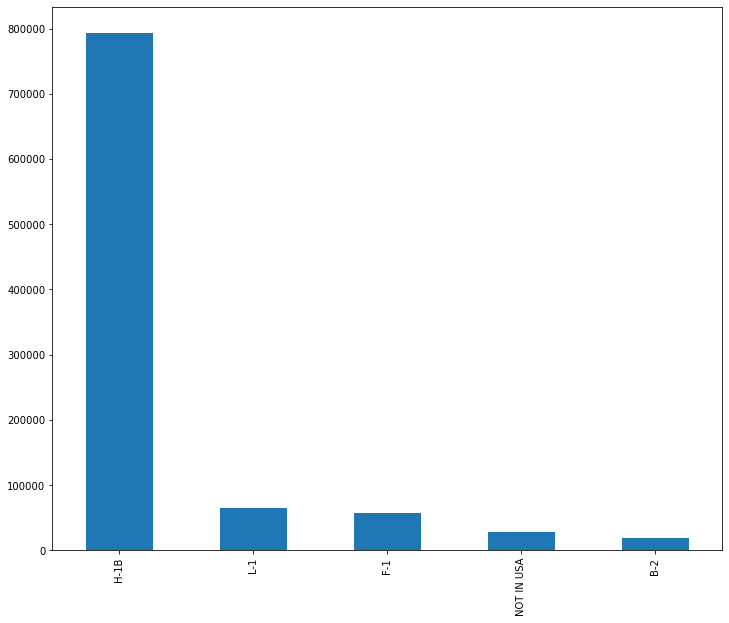

In [310]:
## Class of admission##
# Heavy skew to H1B, not much worth diving into trends or anything like that, 
# instead look into the rare events could be cool!
plt.figure(figsize = (12,10))
df["CLASS_OF_ADMISSION"].value_counts().nlargest(5).plot(kind = "bar")

<AxesSubplot:>

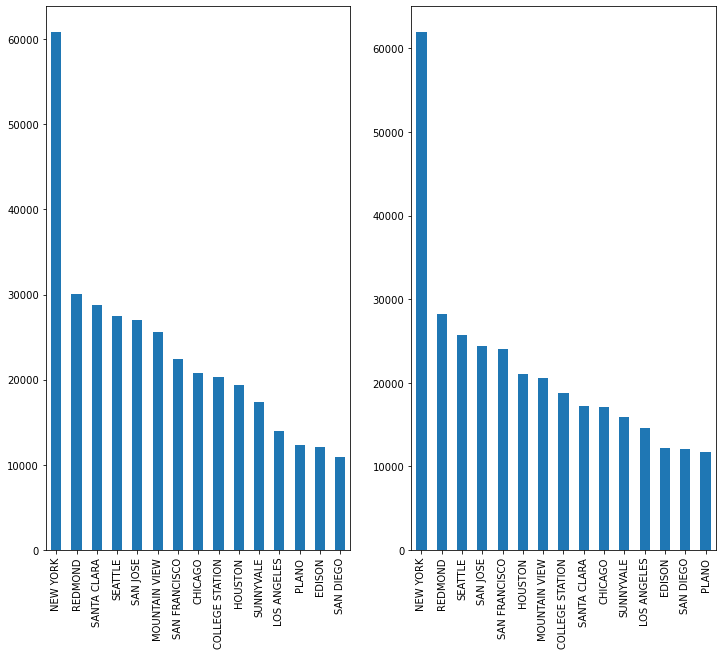

In [311]:
## EMPLOYER VS WORKSITE CITY ##
fig,axes = plt.subplots(ncols = 2, figsize = (12,10))
df["EMPLOYER_CITY"].value_counts().nlargest(15).plot(ax = axes[0],kind = "bar")
df["JOB_INFO_WORK_CITY"].value_counts().nlargest(15).plot(ax = axes[1],kind = "bar")

In [312]:
# top 15 city apps
def grab (year):
    return df[df["YEAR"]==year]["EMPLOYER_CITY"].value_counts()[:15]
top15ecityapp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
def grab (year):
    return df[df["YEAR"]==year]["JOB_INFO_WORK_CITY"].value_counts()[:15]
top15jcityapp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
# top 15 application: Employer city and Worksite city: Numbers, cleaned
def clen (year):
    return pd.DataFrame(top15ecityapp[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
def jclen (year):
    return pd.DataFrame(top15jcityapp[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
tope15cityapp = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
topj15cityapp = pd.concat([jclen(2007),jclen(2008),jclen(2009),jclen(2010),
             jclen(2011),jclen(2012),jclen(2013),jclen(2014),jclen(2015),
             jclen(2016),jclen(2017),jclen(2018),jclen(2019),jclen(2020),
             jclen(2021)], axis = 1)
# Clean Up the top 15 employer table for app: Only Name, cleaned
def clen (year):
    return pd.DataFrame(pd.DataFrame(top15ecityapp[year].sort_values(ascending = False).dropna()).reset_index().drop(year,axis = 1))
tope15citynameapp = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
tope15citynameapp.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
def jclen (year):
    return pd.DataFrame(pd.DataFrame(top15jcityapp[year].sort_values(ascending = False).dropna()).reset_index().drop(year,axis = 1))
topj15citynameapp = pd.concat([jclen(2007),jclen(2008),jclen(2009),jclen(2010),
             jclen(2011),jclen(2012),jclen(2013),jclen(2014),jclen(2015),
             jclen(2016),jclen(2017),jclen(2018),jclen(2019),jclen(2020),
             jclen(2021)], axis = 1)
topj15citynameapp.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]

In [313]:
tope15cityapp.transpose().iplot(title = "Growth of the top 15 employer city application")

In [314]:
topj15cityapp.transpose().iplot(title = "Growth of the top 15 job site city application")

In [315]:
# top 15 city success
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["EMPLOYER_CITY"].value_counts()[:15]
top15ecitysuc = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]
top15jcitysuc = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
# top 15 success: Employer city and Worksite city: Numbers, cleaned
def clen (year):
    return pd.DataFrame(top15ecitysuc[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
def jclen (year):
    return pd.DataFrame(top15jcitysuc[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
tope15citysuc = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
topj15citysuc = pd.concat([jclen(2007),jclen(2008),jclen(2009),jclen(2010),
             jclen(2011),jclen(2012),jclen(2013),jclen(2014),jclen(2015),
             jclen(2016),jclen(2017),jclen(2018),jclen(2019),jclen(2020),
             jclen(2021)], axis = 1)
# Clean Up the top 15 employer table for Success: Only Name, cleaned
def clen (year):
    return pd.DataFrame(pd.DataFrame(top15ecitysuc[year].sort_values(ascending = False).dropna()).reset_index().drop(year,axis = 1))
tope15citynamesuc = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
tope15citynamesuc.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
def jclen (year):
    return pd.DataFrame(pd.DataFrame(top15jcitysuc[year].sort_values(ascending = False).dropna()).reset_index().drop(year,axis = 1))
topj15citynamesuc = pd.concat([jclen(2007),jclen(2008),jclen(2009),jclen(2010),
             jclen(2011),jclen(2012),jclen(2013),jclen(2014),jclen(2015),
             jclen(2016),jclen(2017),jclen(2018),jclen(2019),jclen(2020),
             jclen(2021)], axis = 1)
topj15citynamesuc.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]

In [316]:
tope15citysuc.transpose().iplot(title = "Growth of the top 15 employer city success")

In [317]:
topj15citysuc.transpose().iplot(title = "Growth of the top 15 job site city success")

In [318]:
# Merging the Name with the Count: Applications Top 15 Employer
def merge(year):
    return tope15citynameapp[year].str.cat(tope15cityapp[year].astype(str), sep = ", ")
top15empcityapp = pd.concat([merge(2007),merge(2008),merge(2009),merge(2010),
             merge(2011),merge(2012),merge(2013),merge(2014),merge(2015),
             merge(2016),merge(2017),merge(2018),merge(2019),merge(2020),
             merge(2021)],axis = 1)
top15empcityapp.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
# Merging the Name with the Count: Applications Top 15 Job
def merge(year):
    return topj15citynameapp[year].str.cat(topj15citynameapp[year].astype(str), sep = ", ")
top15jobcityapp = pd.concat([merge(2007),merge(2008),merge(2009),merge(2010),
             merge(2011),merge(2012),merge(2013),merge(2014),merge(2015),
             merge(2016),merge(2017),merge(2018),merge(2019),merge(2020),
             merge(2021)],axis = 1)
top15jobcityapp.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]

In [319]:
# Merging the Name with the Count: success Top 15 Employer
def merge(year):
    return tope15citynamesuc[year].str.cat(tope15citysuc[year].astype(str), sep = ", ")
top15empcitysuc = pd.concat([merge(2007),merge(2008),merge(2009),merge(2010),
             merge(2011),merge(2012),merge(2013),merge(2014),merge(2015),
             merge(2016),merge(2017),merge(2018),merge(2019),merge(2020),
             merge(2021)],axis = 1)
top15empcitysuc.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]
# Merging the Name with the Count: sucess Top 15 Job
def merge(year):
    return topj15citynamesuc[year].str.cat(topj15citysuc[year].astype(str), sep = ", ")
top15jobcitysuc = pd.concat([merge(2007),merge(2008),merge(2009),merge(2010),
             merge(2011),merge(2012),merge(2013),merge(2014),merge(2015),
             merge(2016),merge(2017),merge(2018),merge(2019),merge(2020),
             merge(2021)],axis = 1)
top15jobcitysuc.columns = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]

In [320]:
# King of Consistency: Count the N in top 15 (application) Job city
kingconjc = top15jcityapp.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top15"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top15"].sort_values()

NEW YORK            0
HOUSTON             0
SAN JOSE            0
CHICAGO             0
SUNNYVALE           0
SANTA CLARA         1
SAN FRANCISCO       1
LOS ANGELES         2
EDISON              2
REDMOND             3
MOUNTAIN VIEW       4
SAN DIEGO           4
SEATTLE             6
AUSTIN             10
FREMONT            10
COLLEGE STATION    11
PLANO              11
TEANECK            11
BROOKLYN           11
MIAMI              11
ATLANTA            12
DALLAS             12
IRVING             12
MENLO PARK         12
PHILADELPHIA       13
WASHINGTON         13
RICHARDSON         13
ENGLEWOOD          14
CHERRY HILL        14
HILLSBORO          14
CUPERTINO          14
BOSTON             14
Name: Yrs not in top15, dtype: int64

In [321]:
# King of Consistency: Count the N in top 15 (success) Job city
kingconjc = top15jcitysuc.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top15"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top15"].sort_values()

NEW YORK            0
HOUSTON             0
SAN JOSE            0
CHICAGO             0
SUNNYVALE           0
SAN FRANCISCO       0
SANTA CLARA         1
REDMOND             3
LOS ANGELES         4
SAN DIEGO           4
EDISON              4
MOUNTAIN VIEW       4
SEATTLE             6
ATLANTA             8
AUSTIN             10
COLLEGE STATION    11
PLANO              11
IRVING             11
DALLAS             11
TEANECK            11
BROOKLYN           11
MIAMI              11
CUPERTINO          12
MENLO PARK         12
FREMONT            13
RICHARDSON         13
WASHINGTON         13
PHILADELPHIA       14
PALO ALTO          14
HILLSBORO          14
BOSTON             14
Name: Yrs not in top15, dtype: int64

In [322]:
# King of Consistency: Count the N in top 15 (aplication) employer city
kingconjc = top15ecityapp.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top15"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top15"].sort_values()

NEW YORK            0
HOUSTON             0
SAN JOSE            0
CHICAGO             0
SUNNYVALE           0
SAN FRANCISCO       1
SANTA CLARA         1
REDMOND             3
LOS ANGELES         4
EDISON              4
MOUNTAIN VIEW       5
SAN DIEGO           6
SEATTLE             6
DALLAS              7
PLANO               8
CUPERTINO           9
PHILADELPHIA        9
COLLEGE STATION    11
TEANECK            11
BROOKLYN           11
BOSTON             12
MIAMI              12
MENLO PARK         12
ATLANTA            13
PALO ALTO          13
IRVING             13
RICHARDSON         13
ENGLEWOOD          14
CHERRY HILL        14
REDWOOD SHORES     14
AUSTIN             14
Name: Yrs not in top15, dtype: int64

In [323]:
# King of Consistency: Count the N in top 15 (success) employer city
kingconjc = top15ecitysuc.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top15"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top15"].sort_values()

NEW YORK            0
HOUSTON             0
SAN JOSE            0
CHICAGO             0
SUNNYVALE           0
SAN FRANCISCO       0
SANTA CLARA         1
REDMOND             3
MOUNTAIN VIEW       3
EDISON              5
SAN DIEGO           5
SEATTLE             6
CUPERTINO           6
LOS ANGELES         7
PHILADELPHIA        8
DALLAS              9
TEANECK            10
PLANO              10
BOSTON             11
COLLEGE STATION    11
PALO ALTO          12
MIAMI              12
MENLO PARK         12
RICHARDSON         13
ATLANTA            13
BROOKLYN           13
IRVING             13
IRVINE             14
REDWOOD SHORES     14
AUSTIN             14
Name: Yrs not in top15, dtype: int64

In [324]:
# top 5 city apps
def grab (year):
    return df[df["YEAR"]==year]["EMPLOYER_CITY"].value_counts()[:5]
top5ecityapp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
def grab (year):
    return df[df["YEAR"]==year]["JOB_INFO_WORK_CITY"].value_counts()[:5]
top5jcityapp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
# top 5 city success
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["EMPLOYER_CITY"].value_counts()[:5]
top5ecitysuc = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:5]
top5jcitysuc = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [325]:
# King of Consistency: Count the N in top 5 (application) Job city
kingconjc = top5jcityapp.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top5"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top5"].sort_values()

NEW YORK            0
SAN JOSE            4
REDMOND             5
HOUSTON             6
SAN FRANCISCO       9
MOUNTAIN VIEW      10
SEATTLE            10
LOS ANGELES        11
COLLEGE STATION    11
TEANECK            12
MIAMI              13
SANTA CLARA        14
Name: Yrs not in top5, dtype: int64

In [326]:
# King of Consistency: Count the N in top 5 (success) Job city
kingconjc = top5jcitysuc.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top5"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top5"].sort_values()

NEW YORK            0
SAN JOSE            4
REDMOND             5
HOUSTON             6
SAN FRANCISCO       9
MOUNTAIN VIEW      10
SEATTLE            10
LOS ANGELES        11
COLLEGE STATION    11
TEANECK            12
CHICAGO            14
EDISON             14
SANTA CLARA        14
Name: Yrs not in top5, dtype: int64

In [327]:
# King of Consistency: Count the N in top 5 (aplication) employer city
kingconjc = top5ecityapp.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top5"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top5"].sort_values()

NEW YORK            0
SAN JOSE            5
REDMOND             7
HOUSTON             8
SANTA CLARA         8
MOUNTAIN VIEW       8
SEATTLE            10
LOS ANGELES        11
COLLEGE STATION    11
SAN FRANCISCO      12
CHICAGO            13
TEANECK            13
SAN DIEGO          14
Name: Yrs not in top5, dtype: int64

In [328]:
# King of Consistency: Count the N in top 5 (success) employer city
kingconjc = top5ecitysuc.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top5"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top5"].sort_values()

NEW YORK            0
SAN JOSE            5
REDMOND             7
SANTA CLARA         7
HOUSTON             8
MOUNTAIN VIEW       8
SEATTLE            10
LOS ANGELES        11
COLLEGE STATION    11
SAN FRANCISCO      12
CHICAGO            13
SAN DIEGO          14
TEANECK            14
Name: Yrs not in top5, dtype: int64

In [329]:
# NY, Houston, San Jose, Chicago, Sunnyvale are the goats in consistency: City Worked

In [330]:
# Working in New York City
# EMPLOYER NAMES
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="NEW YORK"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="NEW YORK")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,TATA,6461,TATA,6351
1,BLOOMBERG L.P.,2291,BLOOMBERG L.P.,2206
2,GOOGLE,1723,GOOGLE,1691
3,MPHASIS CORPORATION,1691,MPHASIS CORPORATION,1626
4,ERNST YOUNG,1374,ERNST YOUNG,1310
5,MORGAN STANLEY,1192,MORGAN STANLEY,1163
6,GOLDMAN SACHS,1156,GOLDMAN SACHS,985
7,PRICEWATERHOUSECOOPERS,938,PRICEWATERHOUSECOOPERS,905
8,JP MORGAN,916,JP MORGAN,844
9,DELOITTE,740,DELOITTE,721


In [331]:
# Working in New York City
# Wage Offered
print("25th Percentile Application:",round(df[df["JOB_INFO_WORK_CITY"]=="NEW YORK"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="NEW YORK")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["JOB_INFO_WORK_CITY"]=="NEW YORK"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="NEW YORK")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["JOB_INFO_WORK_CITY"]=="NEW YORK"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["JOB_INFO_WORK_CITY"]=="NEW YORK")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["JOB_INFO_WORK_CITY"]=="NEW YORK"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="NEW YORK")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 80621.0
25th Percentile Success: 85000.0
Mean Application: 104562.76
Mean Success: 106987.19
Median Application: 110000.0
Median Sucess: 111410.0
75th Percentile Application: 135000.0
75th Percentile Success: 135283.0


In [332]:
# Working in New York City
# Country of Citizenship
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="NEW YORK"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="NEW YORK")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,25581,INDIA,24275
1,CHINA,7784,CHINA,7220
2,SOUTH KOREA,2903,CANADA,2580
3,CANADA,2826,SOUTH KOREA,2512
4,UNITED KINGDOM,1877,UNITED KINGDOM,1722
5,FRANCE,1553,FRANCE,1403
6,JAPAN,1309,JAPAN,1135
7,PHILIPPINES,1180,PHILIPPINES,972
8,MEXICO,1070,MEXICO,825
9,ISRAEL,836,ISRAEL,719


In [333]:
# Working in New York City
# Class of Admission
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="NEW YORK"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="NEW YORK")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,47036,H-1B,43693
1,L-1,3967,L-1,3779
2,F-1,1922,F-1,1665
3,NOT IN USA,1090,NOT IN USA,1055
4,B-2,815,B-2,630
5,EWI,740,TN,609
6,E-2,682,E-2,587
7,TN,661,EWI,451
8,O-1,490,O-1,435
9,J-1,290,E-3,257


In [334]:
# Working in New York City
# Top Years
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="NEW YORK"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="NEW YORK")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2018,7214,2018,6880
1,2019,6456,2019,6155
2,2020,6315,2020,6065
3,2021,5747,2021,5559
4,2016,5605,2016,5275
5,2010,4844,2010,4222
6,2015,4363,2015,3987
7,2017,4084,2017,3731
8,2014,3872,2014,3518
9,2011,3152,2011,2696


In [335]:
# Working in HOUSTON City
# EMPLOYER NAMES
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="HOUSTON"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="HOUSTON")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,DELOITTE,295,DELOITTE,288
1,TECHNIP USA,274,TECHNIP USA,262
2,AMAZON,256,AMAZON,238
3,"KBR TECHNICAL SERVICES, INC.",256,"KBR TECHNICAL SERVICES, INC.",233
4,BECHTEL,243,BECHTEL,225
5,"ADVENT GLOBAL SOLUTIONS,INC.",213,CGGVERITAS,191
6,CAMELOT INTEGRATED SOLUTIONS INC,201,CAMELOT INTEGRATED SOLUTIONS INC,187
7,CGGVERITAS,198,"ADVENT GLOBAL SOLUTIONS,INC.",180
8,"HALLIBURTON ENERGY SERVICES, INC.",186,ERNST YOUNG,171
9,ERNST YOUNG,176,"HALLIBURTON ENERGY SERVICES, INC.",169


In [336]:
# Working in HOUSTON City
# Wage Offered
print("25th Percentile Application:",round(df[df["JOB_INFO_WORK_CITY"]=="HOUSTON"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="HOUSTON")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["JOB_INFO_WORK_CITY"]=="HOUSTON"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="HOUSTON")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["JOB_INFO_WORK_CITY"]=="HOUSTON"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["JOB_INFO_WORK_CITY"]=="HOUSTON")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["JOB_INFO_WORK_CITY"]=="HOUSTON"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="HOUSTON")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 64090.25
25th Percentile Success: 66498.0
Mean Application: 87573.3
Mean Success: 89026.11
Median Application: 87349.5
Median Sucess: 88670.0
75th Percentile Application: 110000.0
75th Percentile Success: 110677.0


In [337]:
# Working in HOUSTON City
# Country of Citizenship
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="HOUSTON"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="HOUSTON")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,8444,INDIA,7719
1,CHINA,1701,CHINA,1548
2,MEXICO,1626,MEXICO,1322
3,CANADA,1024,CANADA,901
4,PAKISTAN,982,PAKISTAN,871
5,VENEZUELA,830,VENEZUELA,759
6,UNITED KINGDOM,495,UNITED KINGDOM,446
7,SOUTH KOREA,475,SOUTH KOREA,378
8,COLOMBIA,404,COLOMBIA,332
9,PHILIPPINES,373,PHILIPPINES,313


In [338]:
# Working in HOUSTON City
# Class of Admission
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="HOUSTON"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="HOUSTON")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,13744,H-1B,12410
1,L-1,1693,L-1,1574
2,F-1,625,F-1,530
3,E-2,440,E-2,360
4,TN,391,TN,350
5,B-2,293,B-2,234
6,NOT IN USA,215,NOT IN USA,189
7,EWI,119,EWI,77
8,PAROLEE,78,PAROLEE,70
9,H-4,66,H-4,58


In [339]:
# Working in HOUSTON City
# Top Years
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="HOUSTON"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="HOUSTON")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2016,2130,2016,1947
1,2015,2001,2015,1811
2,2010,1934,2010,1724
3,2014,1752,2018,1622
4,2018,1752,2014,1578
5,2012,1686,2012,1423
6,2011,1406,2019,1263
7,2019,1384,2017,1216
8,2017,1360,2011,1181
9,2020,1166,2020,1060


In [340]:
# Working in SAN JOSE City
# EMPLOYER NAMES
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="SAN JOSE"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="SAN JOSE")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,CISCO,4829,CISCO,4519
1,PAYPAL,1844,PAYPAL,1798
2,EBAY,1817,EBAY,1769
3,ADOBE,832,ADOBE,804
4,BROCADE,607,BROCADE,513
5,"CADENCE DESIGN SYSTEMS, INC.",476,"CADENCE DESIGN SYSTEMS, INC.",463
6,QUALCOMM,467,QUALCOMM,453
7,INTEL,457,INTEL,420
8,GLOBALLOGIC INC.,427,GLOBALLOGIC INC.,414
9,"XILINX, INC.",372,"XILINX, INC.",354


In [341]:
# Working in SAN JOSE City
# Wage Offered
print("25th Percentile Application:",round(df[df["JOB_INFO_WORK_CITY"]=="SAN JOSE"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="SAN JOSE")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["JOB_INFO_WORK_CITY"]=="SAN JOSE"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="SAN JOSE")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["JOB_INFO_WORK_CITY"]=="SAN JOSE"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["JOB_INFO_WORK_CITY"]=="SAN JOSE")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["JOB_INFO_WORK_CITY"]=="SAN JOSE"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="SAN JOSE")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 100000.0
25th Percentile Success: 100984.0
Mean Application: 117320.28
Mean Success: 118440.79
Median Application: 118019.0
Median Sucess: 119101.0
75th Percentile Application: 135553.28
75th Percentile Success: 136755.5


In [342]:
# Working in SAN JOSE City
# Country of Citizenship
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="SAN JOSE"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="SAN JOSE")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,16114,INDIA,15241
1,CHINA,3019,CHINA,2840
2,TAIWAN,727,TAIWAN,673
3,CANADA,706,CANADA,633
4,SOUTH KOREA,582,SOUTH KOREA,499
5,PHILIPPINES,456,PHILIPPINES,367
6,UKRAINE,220,UKRAINE,213
7,RUSSIA,167,RUSSIA,158
8,UNITED KINGDOM,157,UNITED KINGDOM,141
9,JAPAN,151,JAPAN,138


In [343]:
# Working in SAN JOSE City
# Class of Admission
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="SAN JOSE"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="SAN JOSE")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,19843,H-1B,18628
1,L-1,2547,L-1,2447
2,F-1,717,F-1,663
3,B-2,121,E-2,108
4,E-2,119,TN,103
5,TN,115,PAROLEE,89
6,PAROLEE,96,B-2,84
7,NOT IN USA,80,H-4,75
8,H-4,78,NOT IN USA,72
9,O-1,54,O-1,47


In [344]:
# Working in SAN JOSE City
# Top Years
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="SAN JOSE"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="SAN JOSE")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2016,2856,2016,2744
1,2019,2790,2019,2709
2,2018,2353,2018,2242
3,2015,2170,2015,2044
4,2014,2105,2014,1987
5,2020,2006,2020,1916
6,2017,1772,2017,1682
7,2010,1555,2021,1469
8,2021,1535,2010,1455
9,2012,1343,2012,1140


In [345]:
# Working in CHICAGO City
# EMPLOYER NAMES
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="CHICAGO"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="CHICAGO")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,CAPGEMINI,3107,CAPGEMINI,2901
1,DELOITTE,621,DELOITTE,616
2,ERNST YOUNG,329,ERNST YOUNG,320
3,PRICEWATERHOUSECOOPERS,314,PRICEWATERHOUSECOOPERS,304
4,CITADEL LLC,311,CITADEL LLC,304
5,"A.T. KEARNEY, INC.",220,MOTOROLA,197
6,MOTOROLA,210,THE UNIVERSITY OF CHICAGO,194
7,THE UNIVERSITY OF CHICAGO,202,"A.T. KEARNEY, INC.",179
8,UNIVERSITY OF ILLINOIS AT CHICAGO,191,MCKINSEY COMPANY,178
9,MCKINSEY COMPANY,190,UNIVERSITY OF ILLINOIS AT CHICAGO,173


In [346]:
# Working in CHICAGO City
# Wage Offered
print("25th Percentile Application:",round(df[df["JOB_INFO_WORK_CITY"]=="CHICAGO"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="CHICAGO")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["JOB_INFO_WORK_CITY"]=="CHICAGO"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="CHICAGO")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["JOB_INFO_WORK_CITY"]=="CHICAGO"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["JOB_INFO_WORK_CITY"]=="CHICAGO")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["JOB_INFO_WORK_CITY"]=="CHICAGO"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="CHICAGO")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 73237.0
25th Percentile Success: 74693.0
Mean Application: 93963.74
Mean Success: 95006.42
Median Application: 96000.0
Median Sucess: 96658.0
75th Percentile Application: 115000.0
75th Percentile Success: 115000.0


In [347]:
# Working in CHICAGO City
# Country of Citizenship
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="CHICAGO"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="CHICAGO")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,9185,INDIA,8621
1,CHINA,1843,CHINA,1694
2,SOUTH KOREA,609,SOUTH KOREA,536
3,CANADA,561,CANADA,516
4,POLAND,438,POLAND,358
5,PHILIPPINES,326,PHILIPPINES,280
6,MEXICO,254,UNITED KINGDOM,217
7,UNITED KINGDOM,241,MEXICO,207
8,PAKISTAN,204,PAKISTAN,175
9,FRANCE,157,FRANCE,144


In [348]:
# Working in CHICAGO City
# Class of Admission
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="CHICAGO"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="CHICAGO")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,13554,H-1B,12634
1,L-1,867,L-1,815
2,F-1,731,F-1,617
3,NOT IN USA,309,NOT IN USA,288
4,B-2,303,B-2,250
5,TN,158,TN,144
6,EWI,89,E-2,76
7,E-2,86,PAROLEE,59
8,J-1,64,J-1,55
9,PAROLEE,63,EWI,53


In [349]:
# Working in CHICAGO City
# Top Years
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="CHICAGO"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="CHICAGO")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2020,2033,2020,1901
1,2019,1947,2019,1878
2,2018,1904,2018,1816
3,2021,1602,2021,1525
4,2016,1467,2016,1383
5,2017,1245,2017,1164
6,2015,1244,2015,1125
7,2010,1148,2010,1016
8,2014,963,2014,857
9,2012,851,2012,751


In [350]:
# Working in SUNNYVALE City
# EMPLOYER NAMES
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="SUNNYVALE"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="SUNNYVALE")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,YAHOO,1950,YAHOO,1698
1,JUNIPER NETWORKS,1290,JUNIPER NETWORKS,1223
2,LINKEDIN CORPORATION,868,AMAZON,848
3,AMAZON,862,LINKEDIN CORPORATION,826
4,HCL AMERICA,825,HCL AMERICA,784
5,A2Z DEVELOPMENT,666,A2Z DEVELOPMENT,654
6,WALMART,643,WALMART,636
7,MICROSOFT,570,MICROSOFT,553
8,"NETAPP, INC.",567,"NETAPP, INC.",534
9,OATH HOLDINGS INC.,367,GOOGLE,349


In [351]:
# Working in SUNNYVALE City
# Wage Offered
print("25th Percentile Application:",round(df[df["JOB_INFO_WORK_CITY"]=="SUNNYVALE"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="SUNNYVALE")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["JOB_INFO_WORK_CITY"]=="SUNNYVALE"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="SUNNYVALE")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["JOB_INFO_WORK_CITY"]=="SUNNYVALE"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["JOB_INFO_WORK_CITY"]=="SUNNYVALE")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["JOB_INFO_WORK_CITY"]=="SUNNYVALE"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["JOB_INFO_WORK_CITY"]=="SUNNYVALE")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 103691.0
25th Percentile Success: 104042.0
Mean Application: 119810.66
Mean Success: 120541.86
Median Application: 120349.0
Median Sucess: 120578.0
75th Percentile Application: 138403.0
75th Percentile Success: 139934.0


In [352]:
# Working in SUNNYVALE City
# Country of Citizenship
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="SUNNYVALE"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="SUNNYVALE")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,10576,INDIA,9907
1,CHINA,2444,CHINA,2317
2,CANADA,524,CANADA,473
3,TAIWAN,368,TAIWAN,345
4,SOUTH KOREA,314,SOUTH KOREA,278
5,RUSSIA,93,RUSSIA,89
6,FRANCE,93,FRANCE,82
7,JAPAN,92,JAPAN,78
8,UNITED KINGDOM,88,UNITED KINGDOM,77
9,PHILIPPINES,79,ISRAEL,73


In [353]:
# Working in SUNNYVALE City
# Class of Admission
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="SUNNYVALE"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="SUNNYVALE")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,12935,H-1B,12087
1,L-1,1925,L-1,1828
2,F-1,427,F-1,388
3,TN,178,TN,164
4,PAROLEE,70,PAROLEE,65
5,NOT IN USA,49,NOT IN USA,42
6,E-2,47,E-2,42
7,H-4,43,H-4,41
8,L-2,34,O-1,31
9,O-1,34,L-2,31


In [354]:
# Working in SUNNYVALE City
# Top Years
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_CITY"]=="SUNNYVALE"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_CITY"]=="SUNNYVALE")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2016,2011,2016,1921
1,2018,1743,2018,1669
2,2021,1487,2021,1437
3,2015,1336,2017,1278
4,2017,1328,2020,1271
5,2020,1318,2015,1228
6,2019,1260,2019,1215
7,2014,1162,2014,1103
8,2012,1108,2012,946
9,2010,845,2010,726


<AxesSubplot:>

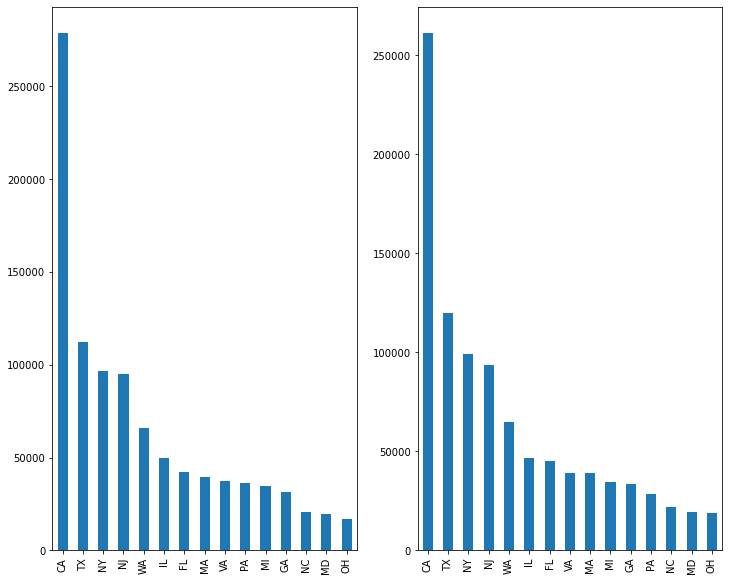

In [355]:
fig,axes = plt.subplots(ncols = 2, figsize = (12,10))
df["EMPLOYER_STATE"].value_counts().nlargest(15).plot(ax = axes[0], kind = "bar")
df["JOB_INFO_WORK_STATE"].value_counts().nlargest(15).plot(ax = axes[1], kind = "bar")

In [356]:
# top 15 state apps
def grab (year):
    return df[df["YEAR"]==year]["EMPLOYER_STATE"].value_counts()[:15]
top15estateapp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
def grab (year):
    return df[df["YEAR"]==year]["JOB_INFO_WORK_STATE"].value_counts()[:15]
top15jstateapp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
# top 15 state success
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["EMPLOYER_STATE"].value_counts()[:15]
top15estatesuc = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()[:15]
top15jstatesuc = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
# top 5 state apps
def grab (year):
    return df[df["YEAR"]==year]["EMPLOYER_STATE"].value_counts()[:5]
top5estateapp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
def grab (year):
    return df[df["YEAR"]==year]["JOB_INFO_WORK_STATE"].value_counts()[:5]
top5jstateapp = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
# top 5 state success
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["EMPLOYER_STATE"].value_counts()[:5]
top5estatesuc = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()
def grab (year):
    return df[(df["YEAR"]==year)&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_STATE"].value_counts()[:5]
top5jstatesuc = pd.DataFrame([grab(2007),grab(2008),grab(2009),grab(2010),
             grab(2011),grab(2012),grab(2013),grab(2014),grab(2015),
             grab(2016),grab(2017),grab(2018),grab(2019),grab(2020),
             grab(2021)], index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                  2018,2019,2020,2021]).transpose()

In [357]:
# top 15 success: Employer state and Worksite state: Numbers, cleaned
def clen (year):
    return pd.DataFrame(top15estatesuc[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
def jclen (year):
    return pd.DataFrame(top15jstatesuc[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
tope15statesuc = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
topj15statesuc = pd.concat([jclen(2007),jclen(2008),jclen(2009),jclen(2010),
             jclen(2011),jclen(2012),jclen(2013),jclen(2014),jclen(2015),
             jclen(2016),jclen(2017),jclen(2018),jclen(2019),jclen(2020),
             jclen(2021)], axis = 1)
# top 15 application: Employer city and Worksite city: Numbers, cleaned
def clen (year):
    return pd.DataFrame(top15estateapp[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
def jclen (year):
    return pd.DataFrame(top15jstateapp[year].sort_values(ascending = False).dropna()).reset_index().drop("index",axis = 1)
tope15stateapp = pd.concat([clen(2007),clen(2008),clen(2009),clen(2010),
             clen(2011),clen(2012),clen(2013),clen(2014),clen(2015),
             clen(2016),clen(2017),clen(2018),clen(2019),clen(2020),
             clen(2021)],axis = 1)
topj15stateapp = pd.concat([jclen(2007),jclen(2008),jclen(2009),jclen(2010),
             jclen(2011),jclen(2012),jclen(2013),jclen(2014),jclen(2015),
             jclen(2016),jclen(2017),jclen(2018),jclen(2019),jclen(2020),
             jclen(2021)], axis = 1)

In [358]:
tope15stateapp.transpose().iplot(title = "Growth of the top 15 employer state application")

In [359]:
tope15statesuc.transpose().iplot(title = "Growth of the top 15 employer state success")

In [360]:
topj15stateapp.transpose().iplot(title = "Growth of the top 15 job site state application")

In [361]:
topj15statesuc.transpose().iplot(title = "Growth of the top 15 job site state success")

In [362]:
# King of Consistency: Count the N in top 15 (application) Job state
kingconjc = top15jstateapp.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top15"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top15"].sort_values()

CA     0
WA     0
MI     0
PA     0
MA     0
VA     0
GA     0
FL     0
TX     0
NJ     0
NY     0
IL     0
MD     1
OH     2
NC     2
CO    13
AZ    13
OR    14
Name: Yrs not in top15, dtype: int64

In [363]:
# King of Consistency: Count the N in top 15 (success) Job state
kingconjc = top15jstatesuc.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top15"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top15"].sort_values()

CA     0
PA     0
MI     0
GA     0
MA     0
VA     0
WA     0
FL     0
TX     0
NJ     0
NY     0
IL     0
OH     1
MD     2
NC     3
AZ    12
CT    13
OR    14
Name: Yrs not in top15, dtype: int64

In [364]:
# King of Consistency: Count the N in top 15 (aplication) employer state
kingconjc = top15estateapp.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top15"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top15"].sort_values()

CA     0
WA     0
MD     0
GA     0
MI     0
MA     0
PA     0
IL     0
FL     0
TX     0
NY     0
NJ     0
VA     0
NC     1
OH     3
CO    13
CT    14
AZ    14
Name: Yrs not in top15, dtype: int64

In [365]:
# King of Consistency: Count the N in top 15 (success) employer state
kingconjc = top15estatesuc.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top15"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top15"].sort_values()

CA     0
NY     0
NJ     0
TX     0
FL     0
IL     0
VA     0
MA     0
PA     0
MI     0
WA     0
GA     0
MD     0
NC     0
OH     1
AZ    14
Name: Yrs not in top15, dtype: int64

In [366]:
# King of Consistency: Count the N in top 5 (application) Job state
kingconjc = top5jstateapp.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top5"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top5"].sort_values()

CA     0
NY     0
NJ     0
TX     0
WA     5
FL    11
IL    14
Name: Yrs not in top5, dtype: int64

In [367]:
# King of Consistency: Count the N in top 5 (success) Job state
kingconjc = top5jstatesuc.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top5"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top5"].sort_values()

CA     0
NY     0
NJ     0
TX     0
WA     5
FL    12
VA    14
IL    14
Name: Yrs not in top5, dtype: int64

In [368]:
# King of Consistency: Count the N in top 5 (aplication) employer state
kingconjc = top5estateapp.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top5"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top5"].sort_values()

CA     0
NJ     0
NY     0
TX     0
WA     5
FL    12
IL    13
Name: Yrs not in top5, dtype: int64

In [369]:
# King of Consistency: Count the N in top 5 (success) employer state
kingconjc = top5estatesuc.isnull().replace(False,0).replace(True,1)
kingconjc["Yrs not in top5"] = kingconjc[2007]+kingconjc[2008]+kingconjc[2009]+kingconjc[2010]+kingconjc[2011]+kingconjc[2012]+kingconjc[2013]+kingconjc[2014]+kingconjc[2015]+kingconjc[2016]+kingconjc[2017]+kingconjc[2018]+kingconjc[2019]+kingconjc[2020]+kingconjc[2021]
kingconjc["Yrs not in top5"].sort_values()

CA     0
NY     0
NJ     0
TX     0
WA     5
IL    12
FL    13
Name: Yrs not in top5, dtype: int64

In [370]:
# Working in CA State
# TOP CITY in CA 
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="CA"]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="CA")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,SAN JOSE,24360,SAN JOSE,22804
1,SAN FRANCISCO,23998,SAN FRANCISCO,22638
2,MOUNTAIN VIEW,20614,MOUNTAIN VIEW,19931
3,SANTA CLARA,17182,SANTA CLARA,15924
4,SUNNYVALE,15927,SUNNYVALE,14871
5,LOS ANGELES,14548,LOS ANGELES,12389
6,SAN DIEGO,12120,SAN DIEGO,11317
7,CUPERTINO,8513,CUPERTINO,8256
8,FREMONT,8013,PALO ALTO,7330
9,PALO ALTO,7727,FREMONT,6368


In [371]:
# Working in CA State
# TOP JOB CODES in CA 
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="CA"]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="CA")&(df["CASE_STATUS"]==1)]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACode,ACount,SCode,SCount
0,15-1132,55171,15-1132,52287
1,15-1133,34701,15-1133,33113
2,17-2072,19042,17-2072,17900
3,15-1121,13520,15-1121,12812
4,15-1031,10030,15-1031,8971
5,15-1032,6771,15-1032,5919
6,15-1051,4867,15-1199,4572
7,11-3021,4801,11-3021,4337
8,15-1199,4776,13-2011,4198
9,13-2011,4698,15-2041,3864


In [372]:
# Working in CA State
# EMPLOYER NAMES
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="CA"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="CA")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,GOOGLE,14579,GOOGLE,14300
1,FACEBOOK,9303,FACEBOOK,8803
2,APPLE,7497,APPLE,7345
3,INTEL,6458,QUALCOMM,6138
4,QUALCOMM,6343,INTEL,5891
5,CISCO,5507,CISCO,5144
6,AMAZON,3203,AMAZON,3079
7,NVIDIA CORPORATION,2332,NVIDIA CORPORATION,2238
8,YAHOO,2120,SALESFORCE,1979
9,SALESFORCE,2060,"VMWARE, INC.",1962


In [373]:
# Working in CA State
# Wage Offered
print("25th Percentile Application:",round(df[df["JOB_INFO_WORK_STATE"]=="CA"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="CA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["JOB_INFO_WORK_STATE"]=="CA"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="CA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["JOB_INFO_WORK_STATE"]=="CA"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["JOB_INFO_WORK_STATE"]=="CA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["JOB_INFO_WORK_STATE"]=="CA"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="CA")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 78936.0
25th Percentile Success: 82409.0
Mean Application: 101211.51
Mean Success: 103881.34
Median Application: 107900.0
Median Sucess: 109797.0
75th Percentile Application: 131123.0
75th Percentile Success: 132184.0


In [374]:
# Working in CA State
# Country of Citizenship
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="CA"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="CA")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,119520,INDIA,111100
1,CHINA,36101,CHINA,33975
2,SOUTH KOREA,19934,SOUTH KOREA,16801
3,CANADA,11954,CANADA,10962
4,PHILIPPINES,9804,PHILIPPINES,7921
5,MEXICO,6939,TAIWAN,6061
6,TAIWAN,6664,MEXICO,4933
7,JAPAN,4156,JAPAN,3500
8,UNITED KINGDOM,3260,UNITED KINGDOM,2934
9,FRANCE,2993,FRANCE,2725


In [375]:
# Working in CA State
# Class of Admission
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="CA"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="CA")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,185584,H-1B,171917
1,F-1,17488,L-1,16321
2,L-1,17155,F-1,15431
3,B-2,4631,B-2,3585
4,E-2,3786,TN,3285
5,TN,3582,E-2,3119
6,NOT IN USA,3469,NOT IN USA,2927
7,EWI,1584,J-1,1072
8,J-1,1242,O-1,991
9,O-1,1078,EWI,894


In [376]:
# Working in CA State
# Top Years
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="CA"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="CA")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2016,28597,2016,26675
1,2018,27924,2018,26264
2,2019,23875,2019,22557
3,2015,22090,2020,20704
4,2020,22005,2015,19790
5,2017,20980,2017,19276
6,2021,19913,2021,18857
7,2014,18851,2014,17014
8,2010,17615,2010,15409
9,2012,15131,2012,12782


In [377]:
# Working in NY State
# TOP CITY in NY 
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NY"]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NY")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,NEW YORK,61894,NEW YORK,56515
1,BROOKLYN,4934,BROOKLYN,3451
2,FLUSHING,1675,FLUSHING,1331
3,SOMERS,1328,SOMERS,1117
4,BRONX,1299,LONG ISLAND CITY,1023
5,LONG ISLAND CITY,1246,BRONX,1006
6,ROCHESTER,1019,ROCHESTER,932
7,ALBANY,831,ALBANY,754
8,WHITE PLAINS,657,ARMONK,596
9,BUFFALO,625,BUFFALO,584


In [378]:
# Working in NY State
# TOP JOB CODES in NY 
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NY"]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NY")&(df["CASE_STATUS"]==1)]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACode,ACount,SCode,SCount
0,15-1132,14433,15-1132,13795
1,15-1121,6630,15-1121,6346
2,13-2051,5538,13-2051,4934
3,15-1199,4151,15-1199,4047
4,13-2011,2919,13-2011,2651
5,15-1031,2912,15-1031,2552
6,15-1133,2512,15-1133,2399
7,13-1111,2249,13-1111,2071
8,35-2014,1853,11-3021,1505
9,11-3021,1624,15-2041,1315


In [379]:
# Working in NY State
# EMPLOYER NAMES
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NY"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NY")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,TATA,6461,TATA,6351
1,BLOOMBERG L.P.,2295,BLOOMBERG L.P.,2210
2,IBM,1977,IBM,1738
3,GOOGLE,1728,GOOGLE,1696
4,MPHASIS CORPORATION,1690,MPHASIS CORPORATION,1626
5,ERNST YOUNG,1383,ERNST YOUNG,1319
6,MORGAN STANLEY,1259,MORGAN STANLEY,1229
7,GOLDMAN SACHS,1162,GOLDMAN SACHS,990
8,JP MORGAN,1003,JP MORGAN,929
9,PRICEWATERHOUSECOOPERS,943,PRICEWATERHOUSECOOPERS,911


In [380]:
# Working in NY State
# Wage Offered
print("25th Percentile Application:",round(df[df["JOB_INFO_WORK_STATE"]=="NY"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="NY")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["JOB_INFO_WORK_STATE"]=="NY"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="NY")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["JOB_INFO_WORK_STATE"]=="NY"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["JOB_INFO_WORK_STATE"]=="NY")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["JOB_INFO_WORK_STATE"]=="NY"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="NY")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 55000.0
25th Percentile Success: 63648.5
Mean Application: 87566.66
Mean Success: 92864.36
Median Application: 92206.0
Median Sucess: 96750.0
75th Percentile Application: 123552.0
75th Percentile Success: 125882.0


In [381]:
# Working in NY State
# Country of Citizenship
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NY"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NY")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,35643,INDIA,33315
1,CHINA,10124,CHINA,9253
2,SOUTH KOREA,6102,SOUTH KOREA,5197
3,CANADA,4160,CANADA,3735
4,MEXICO,3492,MEXICO,2335
5,ECUADOR,3096,PHILIPPINES,2144
6,PHILIPPINES,2729,UNITED KINGDOM,2069
7,UNITED KINGDOM,2308,FRANCE,1634
8,FRANCE,1825,ECUADOR,1584
9,JAPAN,1654,JAPAN,1424


In [382]:
# Working in NY State
# Class of Admission
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NY"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NY")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,65638,H-1B,60282
1,L-1,4975,L-1,4700
2,F-1,3860,F-1,3256
3,EWI,3742,B-2,2321
4,B-2,3187,EWI,2061
5,NOT IN USA,1662,NOT IN USA,1550
6,E-2,1006,TN,911
7,TN,1002,E-2,845
8,O-1,655,O-1,574
9,B-1,544,J-1,430


In [383]:
# Working in NY State
# Top Years
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NY"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NY")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2018,9965,2018,9275
1,2010,9877,2010,7980
2,2016,8649,2016,7944
3,2019,8501,2019,7937
4,2020,8193,2020,7707
5,2021,7544,2021,7198
6,2015,7068,2015,6256
7,2017,6412,2017,5645
8,2014,6163,2014,5518
9,2008,5824,2012,4446


In [384]:
# Working in NJ State
# TOP CITY in NJ 
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NJ"]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NJ")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACity,ACount,SCity,SCount
0,EDISON,12143,EDISON,10725
1,JERSEY CITY,7272,JERSEY CITY,6546
2,TEANECK,7129,TEANECK,5987
3,PISCATAWAY,4774,PISCATAWAY,4238
4,PRINCETON,4733,PRINCETON,4222
5,ISELIN,4428,ISELIN,3987
6,EAST BRUNSWICK,3250,PLAINSBORO,2619
7,SOUTH PLAINFIELD,2992,SOUTH PLAINFIELD,2567
8,PLAINSBORO,2883,EAST BRUNSWICK,2429
9,SOMERSET,2652,SOMERSET,2406


In [385]:
# Working in NJ State
# TOP JOB CODES in NJ 
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NJ"]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NJ")&(df["CASE_STATUS"]==1)]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACode,ACount,SCode,SCount
0,15-1132,28124,15-1132,25673
1,15-1121,8998,15-1121,8349
2,15-1051,8112,15-1051,6779
3,15-1031,7856,15-1031,6380
4,11-3021,2371,15-1199,2175
5,15-1199,2324,11-3021,2001
6,15-1142,1587,15-1133,1422
7,15-1133,1498,15-1142,1413
8,15-1131,1450,15-1131,1319
9,15-1021,1382,15-1021,1118


In [386]:
# Working in NJ State
# EMPLOYER NAMES
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NJ"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NJ")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)

,AName,ACount,SName,SCount
0,COGNIZANT,6986,COGNIZANT,5865
1,WIPRO LIMITED,2631,WIPRO LIMITED,1872
2,"COMPUNNEL SOFTWARE GROUP, INC.",2012,"COMPUNNEL SOFTWARE GROUP, INC.",1818
3,LARSEN TOUBRO,1674,LARSEN TOUBRO,1596
4,HCL AMERICA,1449,HCL AMERICA,1388
5,"HEXAWARE TECHNOLOGIES, INC.",1042,"HEXAWARE TECHNOLOGIES, INC.",982
6,MINDTREE LIMITED,909,MINDTREE LIMITED,883
7,IGATE TECHNOLOGIES,847,IGATE TECHNOLOGIES,823
8,"MARLABS, INC",753,"MARLABS, INC",615
9,3I INFOTECH,699,NATSOFT CORPORATION,588


In [387]:
# Working in NJ State
# Wage Offered
print("25th Percentile Application:",round(df[df["JOB_INFO_WORK_STATE"]=="NJ"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="NJ")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["JOB_INFO_WORK_STATE"]=="NJ"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="NJ")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["JOB_INFO_WORK_STATE"]=="NJ"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["JOB_INFO_WORK_STATE"]=="NJ")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["JOB_INFO_WORK_STATE"]=="NJ"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="NJ")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))

25th Percentile Application: 66135.0
25th Percentile Success: 71684.5
Mean Application: 80542.4
Mean Success: 83751.16
Median Application: 89024.0
Median Sucess: 90459.0
75th Percentile Application: 106080.0
75th Percentile Success: 108368.0


In [388]:
# Working in NJ State
# Country of Citizenship
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NJ"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NJ")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)

,ACountry,ACount,SCountry,SCount
0,INDIA,70082,INDIA,62202
1,SOUTH KOREA,3706,SOUTH KOREA,2996
2,CHINA,2936,CHINA,2653
3,MEXICO,1876,PHILIPPINES,1247
4,PHILIPPINES,1495,MEXICO,1181
5,CANADA,1064,CANADA,935
6,ECUADOR,1059,PAKISTAN,671
7,PAKISTAN,803,ECUADOR,603
8,POLAND,753,TURKEY,566
9,TURKEY,673,POLAND,562


In [389]:
# Working in NJ State
# Class of Admission
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NJ"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NJ")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)

,AClass,ACount,SClass,SCount
0,H-1B,72114,H-1B,64130
1,L-1,5169,L-1,4523
2,F-1,2942,F-1,2463
3,B-2,1664,B-2,1168
4,EWI,1443,EWI,801
5,NOT IN USA,800,NOT IN USA,653
6,PAROLEE,527,PAROLEE,448
7,E-2,428,E-2,364
8,H-4,399,H-4,345
9,B-1,336,TN,286


In [390]:
# Working in NJ State
# Top Years
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="NJ"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="NJ")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)

,AYear,ACount,SYear,SCount
0,2010,9798,2016,8724
1,2016,9388,2010,8113
2,2015,7996,2015,7113
3,2018,7060,2018,6573
4,2011,7020,2019,6018
5,2012,6992,2011,5935
6,2019,6539,2017,5779
7,2017,6453,2012,5562
8,2020,6008,2021,5408
9,2014,5966,2020,5231


In [391]:
# Working in TX State
# TOP CITY in TX 
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="TX"]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
appcol.columns = ["ACity","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="TX")&(df["CASE_STATUS"]==1)]["JOB_INFO_WORK_CITY"].value_counts()[:15]).reset_index()
succol.columns = ["SCity","SCount"]
pd.concat([appcol,succol], axis = 1)


,ACity,ACount,SCity,SCount
0,HOUSTON,21069,HOUSTON,18733
1,COLLEGE STATION,18792,COLLEGE STATION,18671
2,PLANO,11756,PLANO,10812
3,AUSTIN,10923,AUSTIN,10060
4,IRVING,9601,IRVING,8815
5,DALLAS,9476,DALLAS,8330
6,RICHARDSON,6391,RICHARDSON,6030
7,FRISCO,2569,FRISCO,2352
8,SAN ANTONIO,2381,SAN ANTONIO,2097
9,EL PASO,1934,ROUND ROCK,1401


In [392]:
# Working in TX State
# TOP JOB CODES in TX 
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="TX"]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
appcol.columns = ["ACode","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="TX")&(df["CASE_STATUS"]==1)]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
succol.columns = ["SCode","SCount"]
pd.concat([appcol,succol], axis = 1)


,ACode,ACount,SCode,SCount
0,15-1132,35089,15-1132,33639
1,15-1121,14658,15-1121,14054
2,17-2072,3441,15-1133,3209
3,15-1133,3381,17-2072,3175
4,15-1031,3235,15-1199,2893
5,15-1199,2997,15-1031,2833
6,53-3032,2271,15-1142,1991
7,17-2141,2181,17-2141,1987
8,11-3021,2141,11-3021,1922
9,15-1142,2138,17-2071,1736


In [393]:
# Working in TX State
# EMPLOYER NAMES
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="TX"]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
appcol.columns = ["AName","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="TX")&(df["CASE_STATUS"]==1)]["EMPLOYER_NAME"].value_counts()[:15]).reset_index()
succol.columns = ["SName","SCount"]
pd.concat([appcol,succol], axis = 1)


,AName,ACount,SName,SCount
0,COGNIZANT,18456,COGNIZANT,18355
1,INFOSYS,7317,INFOSYS,6855
2,DELL,1547,DELL,1507
3,"MVT SERVICES, LLC",1190,NTT DATA,1023
4,NTT DATA,1069,AMAZON,901
5,AMAZON,956,TECH MAHINDRA,885
6,TECH MAHINDRA,947,DELOITTE,799
7,INTEL,869,HCL AMERICA,767
8,TEXAS INSTRUMENTS,820,TEXAS INSTRUMENTS,760
9,DELOITTE,812,INTEL,757


In [394]:
# Working in TX State
# Wage Offered
print("25th Percentile Application:",round(df[df["JOB_INFO_WORK_STATE"]=="TX"]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("25th Percentile Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="TX")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.25),2))
print("Mean Application:",round(df[df["JOB_INFO_WORK_STATE"]=="TX"]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Mean Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="TX")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].mean(),2))
print("Median Application:",round(df[df["JOB_INFO_WORK_STATE"]=="TX"]["WAGE_OFFER_FROM_9089"].median(),2))
print("Median Sucess:",round(df[(df["JOB_INFO_WORK_STATE"]=="TX")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].median(),2))
print("75th Percentile Application:",round(df[df["JOB_INFO_WORK_STATE"]=="TX"]["WAGE_OFFER_FROM_9089"].quantile(.75),2))
print("75th Percentile Success:",round(df[(df["JOB_INFO_WORK_STATE"]=="TX")&(df["CASE_STATUS"]==1)]["WAGE_OFFER_FROM_9089"].quantile(.75),2))


25th Percentile Application: 67080.0
25th Percentile Success: 71240.0
Mean Application: 83338.99
Mean Success: 85156.01
Median Application: 82868.0
Median Sucess: 85000.0
75th Percentile Application: 100422.0
75th Percentile Success: 101566.0


In [395]:
# Working in TX State
# Country of Citizenship
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="TX"]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
appcol.columns = ["ACountry","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="TX")&(df["CASE_STATUS"]==1)]["COUNTRY_OF_CITZENSHIP"].value_counts()[:15]).reset_index()
succol.columns = ["SCountry","SCount"]
pd.concat([appcol,succol], axis = 1)


,ACountry,ACount,SCountry,SCount
0,INDIA,74422,INDIA,70202
1,MEXICO,8757,MEXICO,6543
2,CHINA,4953,CHINA,4547
3,CANADA,3179,CANADA,2678
4,SOUTH KOREA,3138,SOUTH KOREA,2622
5,PAKISTAN,2806,PAKISTAN,2445
6,PHILIPPINES,1918,PHILIPPINES,1555
7,VENEZUELA,1477,VENEZUELA,1305
8,NEPAL,1404,NEPAL,1274
9,UNITED KINGDOM,1165,UNITED KINGDOM,1028


In [396]:
# Working in TX State
# Class of Admission
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="TX"]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
appcol.columns = ["AClass","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="TX")&(df["CASE_STATUS"]==1)]["CLASS_OF_ADMISSION"].value_counts()[:15]).reset_index()
succol.columns = ["SClass","SCount"]
pd.concat([appcol,succol], axis = 1)


,AClass,ACount,SClass,SCount
0,H-1B,86696,H-1B,80330
1,L-1,7875,L-1,7468
2,NOT IN USA,4405,NOT IN USA,3158
3,F-1,3571,F-1,3071
4,TN,1583,TN,1408
5,E-2,1186,E-2,975
6,B-2,1043,B-2,747
7,B-1,562,PAROLEE,406
8,PAROLEE,454,B-1,332
9,EWI,340,H-4,259


In [397]:
# Working in TX State
# Top Years
appcol = pd.DataFrame(df[df["JOB_INFO_WORK_STATE"]=="TX"]["YEAR"].value_counts()[:15]).reset_index()
appcol.columns = ["AYear","ACount"]
succol = pd.DataFrame(df[(df["JOB_INFO_WORK_STATE"]=="TX")&(df["CASE_STATUS"]==1)]["YEAR"].value_counts()[:15]).reset_index()
succol.columns = ["SYear","SCount"]
pd.concat([appcol,succol], axis = 1)


,AYear,ACount,SYear,SCount
0,2016,15713,2016,14714
1,2015,15156,2015,14211
2,2019,12612,2019,11729
3,2018,11769,2018,10701
4,2017,11520,2017,10618
5,2020,9714,2020,8615
6,2021,7931,2021,7326
7,2014,7663,2014,6742
8,2010,6358,2010,5639
9,2012,5708,2012,4707


<AxesSubplot:xlabel='DISC_ST', ylabel='count'>

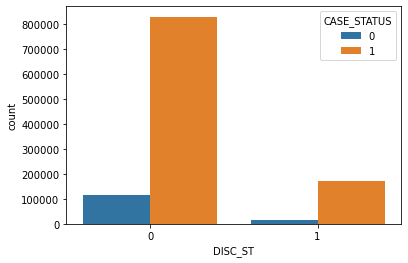

In [398]:
sns.countplot( x = "DISC_ST", hue = "CASE_STATUS", data = df)

<AxesSubplot:xlabel='DISC_CTY', ylabel='count'>

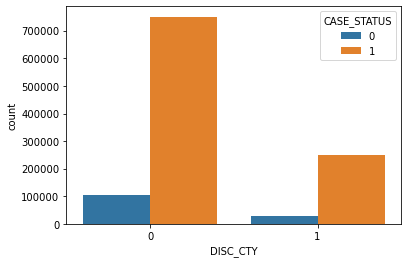

In [399]:
sns.countplot( x = "DISC_CTY", hue = "CASE_STATUS", data = df)

In [400]:
##################################################################

In [401]:
################# MACHINE LEARNING / DEEP LEARNING ##########################

In [402]:
# PREDICTING SUCCESS OR NOT

In [403]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'EMPLOYER_CITY', 'EMPLOYER_STATE',
       'PW_LEVEL_9089', 'PW_AMOUNT_9089', 'PW_UNIT_OF_PAY_9089',
       'WAGE_OFFER_FROM_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089',
       'JOB_INFO_WORK_CITY', 'JOB_INFO_WORK_STATE', 'COUNTRY_OF_CITZENSHIP',
       'CLASS_OF_ADMISSION', 'PW_SOC_CODE', 'MONTH', 'YEAR', 'WO_A', 'PW_A',
       'OW-PW', 'DISC_ST', 'DISC_CTY', 'DISC_UNIT'],
      dtype='object')

In [404]:
# model DF
model = df[["YEAR","MONTH","CASE_STATUS","EMPLOYER_STATE","PW_LEVEL_9089","WO_A","WAGE_OFFER_UNIT_OF_PAY_9089","JOB_INFO_WORK_STATE","PW_SOC_CODE",'OW-PW', 'DISC_ST', 'DISC_CTY', 'DISC_UNIT']]
model.columns = ["YEAR","MONTH","OUTCOME","EMPLOYER STATE", "PW LEVEL","WAGE OFFER","UNIT OF PAY","JOB STATE","PW CODE","OFFER-PW","DISC_ST","DISC_CTY","DISC_UNIT"]

In [405]:
# Turning PW SOC CODE INTO JUST FIRST TWO DIGITS
model["PW CODE"] = model["PW CODE"].str[:2]

In [406]:
# TURNING MONTH INTO COS 
model["cosM"] = np.cos(model["MONTH"]*2*np.pi/30)
model["sinM"] = np.sin(model["MONTH"]*2*np.pi/30)
model = model.drop("MONTH",axis = 1)

In [407]:
# NULL CHECK
model.isnull().sum()

YEAR                  0
OUTCOME               0
EMPLOYER STATE       79
PW LEVEL          69700
WAGE OFFER        18139
UNIT OF PAY       18058
JOB STATE           301
PW CODE            1674
OFFER-PW          21341
DISC_ST               0
DISC_CTY              0
DISC_UNIT             0
cosM                  0
sinM                  0
dtype: int64

In [408]:
# DROPPING ALL NULLS
model = model.dropna()

In [409]:
# DUMMY VARIABLES
model = pd.concat([model,pd.get_dummies(model["EMPLOYER STATE"], drop_first = True)],axis = 1).drop("EMPLOYER STATE",axis = 1)
model = pd.concat([model,pd.get_dummies(model["PW LEVEL"], drop_first = True)],axis = 1).drop("PW LEVEL",axis = 1)
model = pd.concat([model,pd.get_dummies(model["UNIT OF PAY"], drop_first = True)],axis = 1).drop("UNIT OF PAY",axis = 1)
model = pd.concat([model,pd.get_dummies(model["JOB STATE"], drop_first = True)],axis = 1).drop("JOB STATE",axis = 1)
model = pd.concat([model,pd.get_dummies(model["PW CODE"], drop_first = True)],axis = 1).drop("PW CODE",axis = 1)

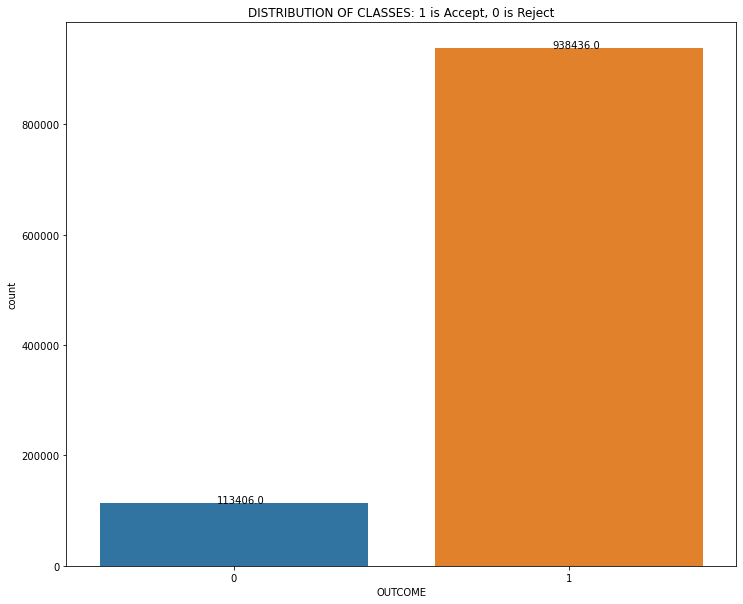

In [410]:
# DISTRIBUTION OF CLASSES
plt.figure(figsize=(12,10))
plt.title("DISTRIBUTION OF CLASSES: 1 is Accept, 0 is Reject")
ax = sns.countplot(x = model["OUTCOME"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.01))

In [411]:
#### EXPORTING MODEL TO CSV AND MOVING OVER TO ML AND DL NOTEBOOK ####
model.to_csv("MODEL.csv")